# MIS 492 - Data Analysis and Visualization
## Week 6

## Visualization With Seaborn

### Dr. Mohammad AlMarzouq

# Skills Learned So Far
- Loading data
- Univariate exploration of data to find problems
    - Using simple matplotlibs
- Filteration
- Data manipulation

### You can prepare the dataframe that you will perfor EDA on

# What Is Seaborn?
- Plotting library built on top of matplotlib
- Adds more plotting options
- Simplifies plotting for some complex plots
- Improves the look of matplotlib plots
- Works almost exactly like matplot lib

# First Install Seaborn
Open Terminal or CMD and type the following command:
```bash
pip install seaborn

pip install statsmodels
```

# Using Seaborn

Just like pandas you have to import it:

In [2]:
# don't forget this
%matplotlib inline 
import seaborn as sns

# Now tell jupyter to use seaborn colors
sns.set(color_codes=True)

# Load Data Using URL
- The url is: https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv
- Load into weather_df variable
- You can pass the url as a string into pd.read_csv and pandas will download the data:

In [3]:
import pandas as pd
weather_df = pd.read_csv("https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/weather.csv")

In [4]:
# Your turn
# load https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json
# into cars_df


In [5]:
cars_df =  pd.read_json("https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json")

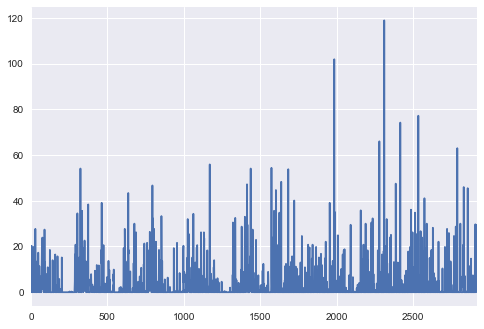

In [6]:
# Try to plot the distribution of the precipitation column
weather_df.precipitation.plot()

In [7]:
# What was new about the previous plot?
# Can you do a histogram of precipitation


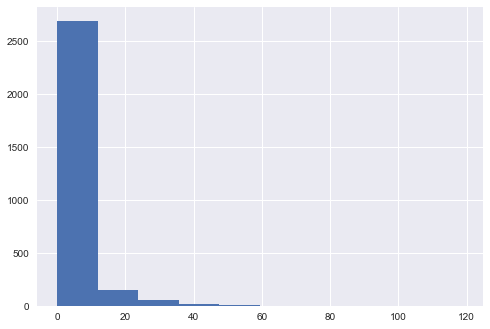

In [8]:
weather_df.precipitation.hist()

# Plots So Far
- Look better with seaborn
- Still univariate only
- Not much control

So let's try to improve

# General Seaborn/Matplot Workflow
1. Create an empty figure
2. Add single or multiple plots
    - Set the plot type and assign data to axis
3. Modify the aesthetics of the plot (e.g. axis, text, labels, ..etc.)
4. Show/Save the plot

Great for overlaying plots, making customization, and creating trellis/grid plots

# Simple Seaborn Workflow
- Just set the data to create a single plot

Excellent for quick EDA and allows for some customization

# CheatSheets
Use these to remind you about the basic workflow
- [Matplotlib](Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](seaborn_cheat_sheet.pdf)

**Source:** Datacamp.com

# Resources
- [How matplot lib works](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Matplot tutorials](https://matplotlib.org/tutorials/index.html) **Excellent resource on how to perform tasks**
- [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)

# Univariate Plots (Distributional)
- BarPlot/CountPlot
- Histogram/Distribution plot
- PieChart
- Boxplot
- Violinplot
- Swarmplot
- Stripplot

# Univariate Plots (Distributional)
- Use these plots to examine the distribution of a single variable
- You can use them also later to compare distributions of two variable or two groups
- To determine which to use, refer again to this [cheatsheet as a starting point](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)

Let's examine how the weather_df and cars_df look like:

In [9]:
# How do we examine weather_df to know what columns exist?

In [10]:
weather_df.head()

,location,date,precipitation,temp_max,temp_min,wind,weather
0,Seattle,2012-01-01 00:00,0.0,12.8,5.0,4.7,drizzle
1,Seattle,2012-01-02 00:00,10.9,10.6,2.8,4.5,rain
2,Seattle,2012-01-03 00:00,0.8,11.7,7.2,2.3,rain
3,Seattle,2012-01-04 00:00,20.3,12.2,5.6,4.7,rain
4,Seattle,2012-01-05 00:00,1.3,8.9,2.8,6.1,rain


In [11]:
# How do we examine cars_df to know what columns exist?


In [12]:
cars_df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


# Bar Plot/Count Plot
- Best for counting occorances and distribution of categorical data
- Count Plot is the name used in seaborn to distinguish it from the matplot bar plot, but they are the same
- Which columns are best examined using it?

- **weather_df**: Location, Weather
- **cars_df**: Cylinders, Origin, Year.
    - What about Name?

# How To Use Count Plot
- Check the reference for [Count Plot in Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- sns.countplot is the function
- Requires data argument, and name of variable to plot
    - Alternatively, you can just pass the variable
- Useful to get count of each category

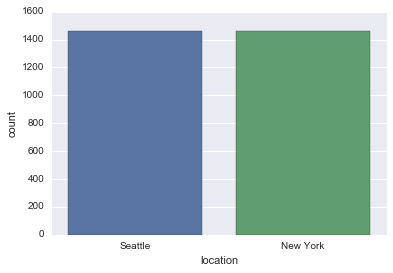

In [10]:
# BEWARE of case sensitivity, "Location" will not work!
sns.countplot("location", data=weather_df)

# Saving The Image Is Simple

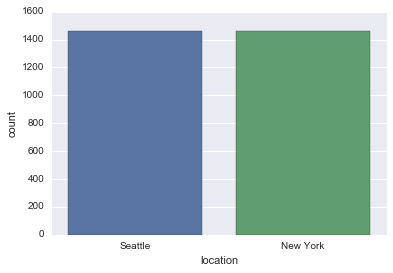

In [11]:
# Store the image in a variable:
cnt_plt = sns.countplot("location", data=weather_df)
# use saveFig and give the file a name
cnt_plt.figure.savefig("location_count1")
# For transparent background use
cnt_plt.figure.savefig("location_count2", transparent=True)

In [ ]:
# Your turn to examine the distribution of other categorical variables we identified
# from both weather_df and cars_df


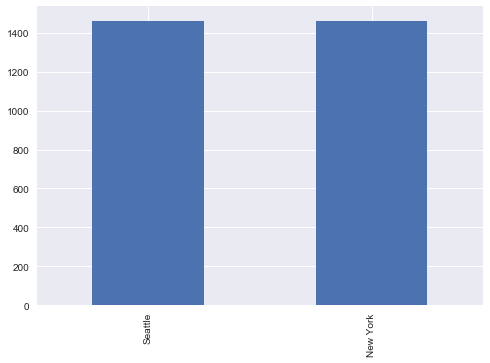

In [13]:
weather_df.location.value_counts().plot(kind="bar")

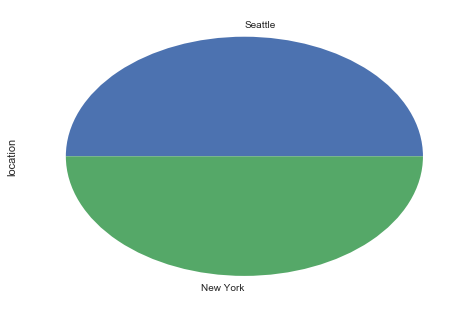

In [16]:
weather_df.location.value_counts().plot(kind="pie")

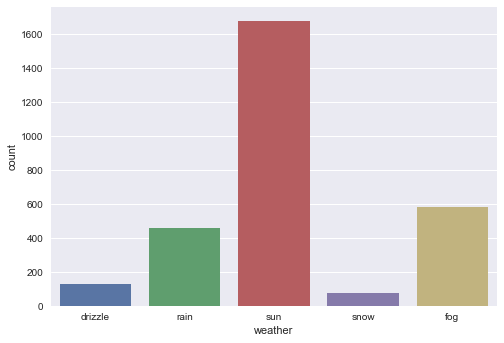

In [18]:
sns.countplot(weather_df.weather)

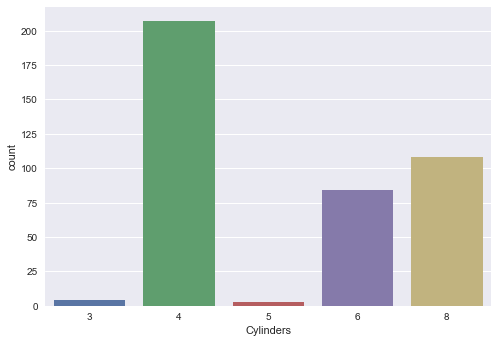

In [19]:
sns.countplot(cars_df.Cylinders)

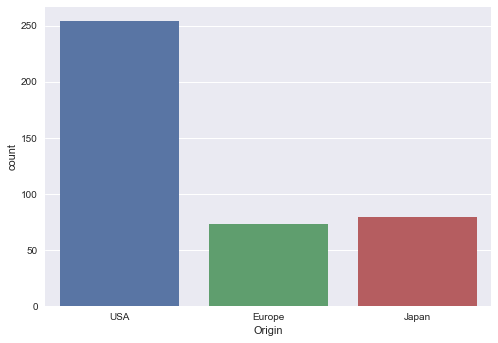

In [23]:
sns.countplot(cars_df.Origin)

# What About Cars_df.Name?
- Let's try to plot it using countplot and see what the problem is:

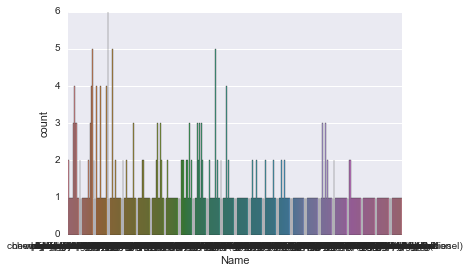

In [12]:
name_plt = sns.countplot('Name', data=cars_df)

# What Can We Do?
- Problem: Overwhelming plot which we cannot make sense of



- Cause: Many categories

- Solution: Reduce the categories, but how?
    - By getting a subset, we cannot work with all the data in this case
    - Must use meaningful criteria, for example:
        - Sort the data based on count, then filter by eamining the top/bottom 5 or 10

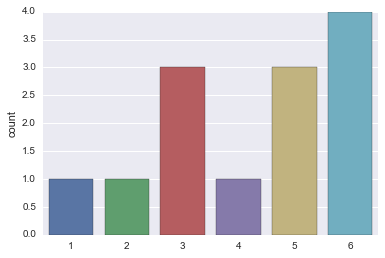

In [13]:
# But first, notice how countplot works
data = [1,2,3,3,3,4,5,5,5,6,6,6,6]
names_plt = sns.countplot(data)

# CountPlot will do the counting of the categories for you

In [14]:
# Look at cars_df.Name
cars_df.Name

# It is just a list of names (Pandas calls it series)
# CountPlot is able to count them but the image is not readable

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                  citroen ds-21 pallas
11      chevrolet chevelle concours (sw)
12                      ford torino (sw)
13               plymouth satellite (sw)
14                    amc rebel sst (sw)
15                   dodge challenger se
16                    plymouth 'cuda 340
17                 ford mustang boss 302
18                 chevrolet monte carlo
19               buick estate wagon (sw)
20                 toyota corona mark ii
21                       plymouth duster
22                            amc hornet
23                         ford maverick
24              

In [15]:
# Let's get the name count and filter the top ten
# Let's see how the data looks like
cars_df.Name.value_counts()[:10]

ford pinto            6
amc matador           5
ford maverick         5
toyota corolla        5
toyota corona         4
chevrolet chevette    4
peugeot 504           4
chevrolet impala      4
amc hornet            4
amc gremlin           4
Name: Name, dtype: int64

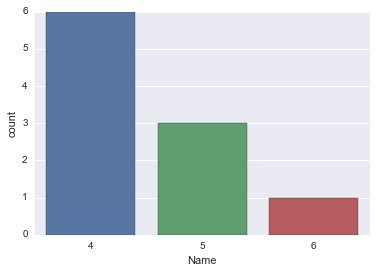

In [16]:
# CountPlot doesnt work well with value-count data
# If we use it, it will count the numbers for us
# and find the times 6s, 5s, and 4s occured
data = cars_df.Name.value_counts()[:10]
sns.countplot(data)

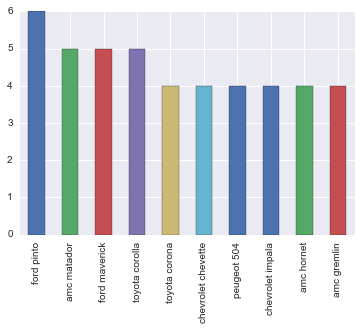

In [17]:
# Instead use simply bar plot from matplot lib
# after filtering topten from value_counts

cars_df.Name.value_counts()[:10].plot(kind="bar")

# What can you tell from this plot?

# Distribution Plot
- Useful to look at the distribution of values for a continuous or numeric variable
- Named a distribution plot to distinguish it from the matplot lib histogram, but they are the same
- Which variables can we plot using it?

In [18]:
weather_df.head()

,location,date,precipitation,temp_max,temp_min,wind,weather
0,Seattle,2012-01-01 00:00,0.0,12.8,5.0,4.7,drizzle
1,Seattle,2012-01-02 00:00,10.9,10.6,2.8,4.5,rain
2,Seattle,2012-01-03 00:00,0.8,11.7,7.2,2.3,rain
3,Seattle,2012-01-04 00:00,20.3,12.2,5.6,4.7,rain
4,Seattle,2012-01-05 00:00,1.3,8.9,2.8,6.1,rain


In [19]:
cars_df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


# Distribution Plot
- weather_df: precipitation, temp_max, temp_min, wind
- cars_df: Acceleration, Displacement, Horsepower, Miles_per_Gallon, Weight_in_lbs
    - Why isn't Cylinders included here?

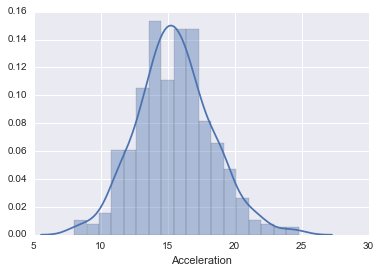

In [20]:
sns.distplot(cars_df.Acceleration)

# Add the argument kde=False to remove the distribution line
# you can set the range of values in each bar
# using bins argument

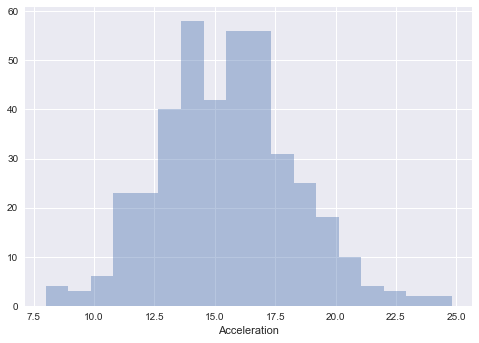

In [18]:
sns.distplot(cars_df.Acceleration, kde=False, bins=18)

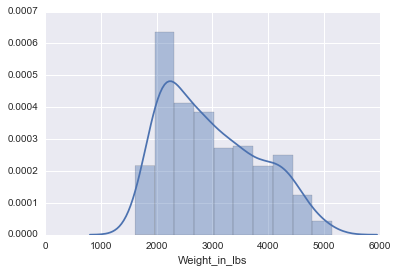

In [22]:
# Here is the distribution of another variable
sns.distplot(cars_df.Weight_in_lbs)

In [47]:
# try to plot cars_df.Horsepower
# What is the problem?
# how can we fix it? (2 solutions available)

In [23]:
cars_df[cars_df.Horsepower.isnull()]  # there are null values in horsepower column

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
38,19.0,4,98.0,NaN,25.0,ford pinto,USA,2046,1971-01-01
133,17.0,6,200.0,NaN,21.0,ford maverick,USA,2875,1974-01-01
337,17.3,4,85.0,NaN,40.9,renault lecar deluxe,Europe,1835,1980-01-01
343,14.3,4,140.0,NaN,23.6,ford mustang cobra,USA,2905,1980-01-01
361,15.8,4,100.0,NaN,34.5,renault 18i,Europe,2320,1982-01-01
382,20.5,4,151.0,NaN,23.0,amc concord dl,USA,3035,1982-01-01


In [125]:
clean_cars_df = cars_df[~(cars_df.Horsepower.isnull())]

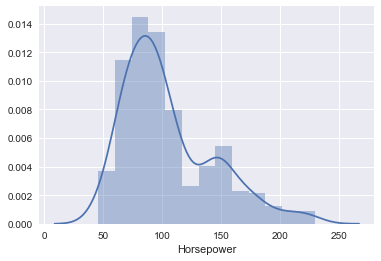

In [126]:
sns.distplot(clean_cars_df.Horsepower)

# Pie Chart
- Used to represent proportinos of **categorical** variables
- Available in Matplotlin

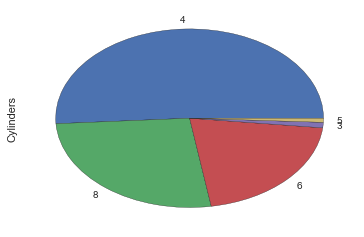

In [51]:
cars_df.Cylinders.value_counts().plot(kind="pie")

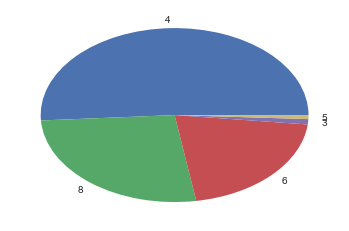

In [17]:
# another way of doing it with matplot lib
import matplotlib.pyplot as plt
p = plt.pie(cars_df.Cylinders.value_counts(), labels=cars_df.Cylinders.value_counts().index)

# BoxPlot
- One of the original plots for EDA
- Used with continuous variables
- Gives an idea about distribution/skewness of data
- Inter-Quartile Range (IQR in the both (1st to 3rd quartiles)
- Shows possible outliers (above/below 1.5*IQR)
- Shows outliers (above/below 3*IQR)
- Used best to compare distributions of variables or subgroups

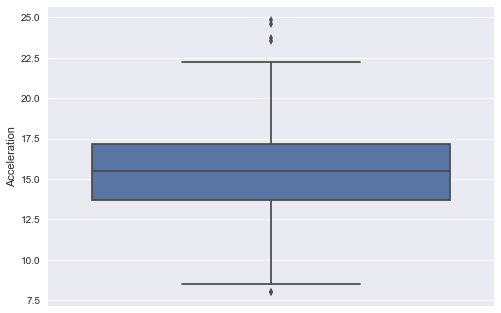

In [6]:
# orient can be 'v' or 'h
sns.boxplot(cars_df.Acceleration, orient="v")

# Your Turn
Explore the [seaborn documentation](https://seaborn.pydata.org/api.html) and try to plot the categorical variables using:
- Violin Plot
- Swarm Plot
- Strip Plot

In [78]:
# Your work here
# You can add cells as needed

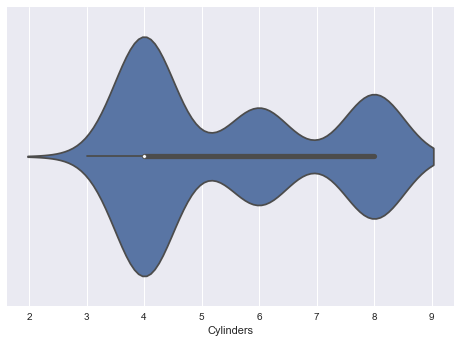

In [9]:
sns.violinplot(cars_df.Cylinders)

# Time Series
- Time series is data that changes over time
- When plotting such data, the value is placed in the Y axis with the time value on the X axis
- Time can be period, day, date, week, month, year ..etc
- Time values will be ordered

# Plotting Time Series
- Typically, line plots or scatter plots can be used
- Possible to use other plots if they make sense and can show the message you are trying to convey
    - Experiment to see what you can do
- You can use seaborn tsplot, but it will be removed in the future
- Use matplotlib plot_date


In [239]:
# But first, remember to convert the date field to datetime object
weather_df.date = pd.to_datetime(weather_df.date)

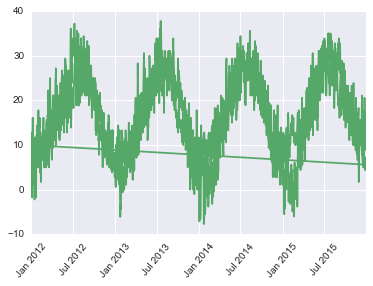

In [130]:
# to rotate the date by 50 degrees
plt.xticks(rotation=50)

plt.plot_date(x=weather_df.date, y=weather_df.temp_max, fmt='g-')

# What is the fmt part?
- Allows you to control how the values are drawn on the plot
- You can set shapes, lines, and colors
- `fmt='g-'` means green solid line
- Remove it and run the plot again, see what happens

# Example of fmt Strings 
| Character | Description |
| --- | ---|
|'-'|	solid line style|
|'--'|	dashed line style|
|'-.'|	dash-dot line style|
|':'|	dotted line style|
|'.'|	point marker|
|','|	pixel marker|
|'o'|circle marker|

- Complete list can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)
- You can even set the color

# Your Turn
Examin the documentation for [seaborn on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) and [matplotlib tutorials](https://matplotlib.org/tutorials/index.html) to modify the plots that we have made so far. Specifically, you need to select 4 different plot from above and perform the following:
- Change the labels
- Change the ticks
- Change the title of the plot
- Change the date format of a time series plot to be Day-Month
    - Hint: see [this discussion](https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels-in-matplotlib) on how to do it
- Change the ticks
- Change the color pallet and style
- **Bonus:** Try to add arrows and text to point at data points in the graph

In [1]:
# Your work here
# don't forget to move the plots you will work on here



![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAEFCAYAAAAYKqc0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl03Gd97/H3bzaNlpE0kkarZcmW7ceW991JHMeExAkp%0AhrSlQDkQQk9u4Pae24X2trQXaO8pPac9hdLethQIBEpvyxIgZI9TICbESxbHdmzLemzZ1mJZu0bS%0AjJaRZrl/zCiZGNmS7JF+M7/5vs7xsTWPftL3saWPHj+/5/c8RiwWQwghhLXYzC5ACCFE6km4CyGE%0ABUm4CyGEBUm4CyGEBUm4CyGEBTnMLmBaX19gxmU7Xm8efv/YYpez6KSf1iL9tJZ07qfP5zFmej3t%0AR+4Oh93sEhaF9NNapJ/Wkon9TPtwF0IIMX8S7kIIYUES7kIIYUES7kIIYUES7kIIYUES7kIIYUES%0A7kIIYUES7kIIYUES7kIIYUFps/2AMM/BE50p+Th7N9Wk5OMIIW6ehLuYt/FQmKFgCLfLQX6uA1cG%0APpothNVJuIs5mZyKcOriIG3dAYLjU+9o83pyWFPn5bZ1lTgl6IVICxLu4rpisRgtncMcP9fPxGQE%0Al9NGjS+fEk8OoakogbFJugfHOHy6mzOtg/zOfWtYv7zU7LKFyHoS7uKaYrEYrzf3cbbNj8NusHll%0AGY31Xuz2d96HD45P0dzm51zHEF/+wUnu2VHLb97RgMMu9+uFMIt894kZxWIxXmnq4Wybn6J8F+/b%0AvYz1DaW/EuwABblOtq0u539/bBsVJXkceLWDf3zsJKGpiAmVCyFAwl1cwzHdx7mOYbyeHO7ZWUtB%0ArnPWa+oqPfzFg9vYtKKMM63+eMBPSsALYQaZlslgqVrCeLXLvUGaWv0U5rvYt6OWHOfcb5K6XQ5+%0A99fX8bUnznDsXB//8NhJPv2hjXKjVYhFJiN38Q6jE1McOtWNzWawZ2PVvIJ9msNu45PvX8tW5UN3%0ADPGtZ5uJxWY8RVEIsUAk3MVbYrEYh97sJjQVYdtqHyWF7hv+WA67jYf3N9JQU8jRph6eOtSaukKF%0AELOSaRnxlraeIN2DYyzx5aNqi+d9/UzTRFtW+egZHOcnL1/CHwyxboWPQHDiuh9HnnQV4ubJyF0A%0AEIlGeUP3YTNg+5pyDGPGA9XnLTfHwZ1banDYDQ6f7mY4GErJxxVCXJ+EuwCguW2I4PgUaqkXT54r%0ApR+72JPDzsYKpsJRXniljUg0mtKPL4T4VRLugonJCG9eGMDltLGhYWGeLm2oKaKhupBe/zhv6P4F%0A+RxCiLdJuAua2/xMhaNsaCglx7VwSxZ3NFbg9eRwts1Pe09gwT6PEELCPeuFI1F0+xAup42VS+Z/%0AE3U+nA4b9+yqw24zOHyq+1c2IBNCpI6Ee5a7eGWE0FQEVVuM07HwXw6lRbnsaCxnMhzlpRNXiERl%0A/bsQC0HCPYvFYjHOtvqxGaCWehft866oKWJZlYf+4QmOn+tbtM8rRDaRcM9iV/pHGR6dpL6qkDz3%0A4j3yYBgGu9ZWUpjvoqlV5t+FWAgS7lnsbJsfgDX1izdqn+Z02LhjUzV2m8GhU90ExiYXvQYhrEzC%0APUuNTUzR1T9GWZGb0pvYZuBmeJPWv790okvWvwuRQhLuWepiV4AY0FBTaGodK5YU0VBTyMDIBMea%0AZf5diFSRvWWyUCwW42LnMDYD6ivNDXeAnY0VDAxP0Nw+RHlJntnlCGEJMnLPQv5AiKHgJEvKCxb0%0AoaW5ctht7NlUHd9/5lSX3GAVIgUk3LPQhc4RAJZXmz9qn1ZckMNt66sIR2L8w2MnGRy5/s6RQojr%0Ak3DPMtFojEtdI7icNmp8BWaX8w51lR62Kh9DwUn+4bGTjE3IE6xC3CgJ9yzT4x9jYjJCfWUhdltq%0AtvVNpcZ6L3duqeFy3yhf/N4J2aJAiBsk4Z5lOnqCACytSK9R+zTDMPjIXavYvb6K1u4AX/zucVkD%0AL8QNkHDPIrFYjI7eIE6Hjco0XpVisxk8eN9q7thUTXtvkL/+92Nc7guaXZYQGWXWpZBKKRvwFWAj%0AEAIe0lq3JLXvBz4PhIFHtdaPJLWVA8eAu7XWzSmuXcyTPxBidCLMsioPtjSckklmMwweuEeR73by%0A7NE2vvCd13nwPavZ1VhpdmlCZIS5jNzvB9xa61uAzwBfmm5QSjmBLwP7gDuAh5VSFUltXwPGU120%0AuDHtiSmZ2vL0nJK5mmEYfGBvA797/zpshsHXn2ziHx87Sa9/zOzShEh7c3mIaTfwPIDW+qhSaltS%0A2xqgRWvtB1BKvQzsAR4Dvgh8FfizuRTi9ebhcMy85trn88zlQ2S8+fbTUzC/bQOuDIxisxmo+lJc%0ATvPWt89W99V/D+/xediwuoJ/eewkJy/009TmZ9/OOvbfvjztVvwkk69ba8m0fs4l3AuB4aS3I0op%0Ah9Y6PENbAChSSj0I9GmtDyil5hTu/muMxnw+D3191n+o5Ub6GQjOfS14cHyK/qEJqsvyCYWmCIXM%0AWYXiKXDPWvdMfw8u4A8+sJ7Xmnt57MUWnjl0iWcOXaKx3stWVc6WlWUUFeS845qDJzpTUvPeTTXz%0Avka+bq0lnft5rR86cwn3ESD5alsi2Gdq8wBDwO8BMaXUXcAm4DtKqfdprbvnW7hIjY7exCqZDJmS%0AmYlhGOxYU8FW5eONc/381+sdNLX6aWr18+8HNLXlBayp87Kmzsuq2oU9VUqIdDeXcD8E7Ad+oJTa%0ABZxKajsLrFRKlQBB4lMyX9Ra/3D6HZRSB4FPSbCb60r/KAA15fkmV3Lz7DYb21eXs311Of3D4xw/%0A18+Jln7OXx6mozfIC691YDMMyordLC0vYGmlh4Jcp9llC7Go5hLujwN3K6UOAwbwCaXUR4ACrfXX%0AlVKfBg4Qvzn7qNY6Nf8XFikTicboGRyjKN9FvttaIVdWlMvd22u5e3stk1MRWjqHOdvm52ybn0tX%0ARuj1j/O67qOqNI81dV5qfPkYRnqvFBIiFWYNd611FPjUVS83J7U/BTx1nev33mhxIjX6hsYJR2JU%0AlaXv2vZUcDntNNaX0FhfAsBzr7TR0RvkUtcIXQNjdA2MUVzgYseaCipLrf13IYRs+ZsFuhJTMtWl%0AmT8lMx+5OQ5W1RazqraYwZEJmlr9XLwywguvdVBX6WFnYzlul3wLCGuSJ1SzQNfAGIYBFWn8VOpC%0AKyl0s3tDFffdUkdZkZu27gBPH2qj1y+PYQhrknC3uNBUhIHhCXzFuTgd8s9dVuTmPbuWsnllGeOh%0AMAdebUe3D5ldlhApJ9/tFtc9MEYMqJI55rcYhsH6hlLu3l5LjtPOK009nLowYHZZQqSUhLvFdQ1k%0A53z7XFSW5nHvzqXkux0cP9/PMd1HLBYzuywhUkLC3eK6BsZwOmyUFs1vq4JsUZjv4t6dSynMc3Lm%0A0iCnLg6aXZIQKSHhbmFjE1MExqao8Oam/S6QZsrPdbJvR3wEf+J8P+c7ZA5eZD4JdwvrSawEKc/i%0AVTJzled2cNe2+Bz80TM9sn+8yHgS7hY2vcyvwptrciWZoajAxZ1ba7DZDH55sovhoJwAJTKXhLuF%0A9QyOYbcZlBTKfPtc+YpzuWVdJVPhKAePdzIZjphdkhA3RMLdokKTEYaCk/iKc9PyIOx0try6kMZ6%0AL8Ojkxx6s1tW0IiMJOFuUb1Difl2mZK5IVtW+agsyaOjN8jP35C98ETmkXC3qOmj6CpKJNxvhM1m%0AsHtDFTlOO9//eYvcYBUZR3ZNsqiewXEMI74lbqZJ1QlKNyvP7eDW9ZW8+EYnX3viDJ/7+DZTjycU%0AYj5k5G5BU+EoAyMTlBa6ZT+Zm1RbXsCdW2ro7B/lBy+2mF2OEHMm3/kW1D88Tiwm8+2p8sF3raDG%0Al8/P3+jk+Pk+s8sRYk4k3C2obyh+ALWEe2q4nHY++b61OOw2vvVsM/5AyOyShJiVhLsF9SdWymTi%0AfHu6WuIr4EN3riA4PsU3n2mS5ZEi7Um4W0wsFqNvaIJ8t4M8t9wvT6U7t9SwoaGUplY/B4+nx01f%0AIa5Fwt1iguNThKYilBXLqD3VDMPg4/euJt/t4PsvttCTWG4qRDqScLeY6fl2X7FsObAQvJ4cPrpP%0AMTkV5ZvPnCUalekZkZ4k3C1mer7dJ/PtC2bHmnK2rS6n5fIwB15rN7scIWYk4W4xfcMT2AwoKcwx%0AuxTLMgyDj+1bRWG+i8dfukinPL0q0pCEu4VEIlH8IxN4C93Y7fJPu5A8eS4evHc14UiMbzx9lnAk%0AanZJQryDJICFDI6EiMbAJ0fqLYpNK8vYvb6Ktp4ATx9uNbscId5Bwt1C+oYT69tlpcyi+fC7V1Ja%0AmMPTh9to7R4xuxwh3iLhbiGyUmbx5bkdfOK+NURj8emZKTncQ6QJCXcLGRieIMdppyDXaXYpWaWx%0AvoR3b1nClf5RHn/pktnlCAFIuFvGxGSE4PgUpUU5GIacvLTYPrC3gXJvLgdebedcx5DZ5Qgh4W4V%0AgyPxKZlSOS/VFDkuOw/9WiMY8M1nmhgPhc0uSWQ5CXeLGBhOhLuslDHNiiVF3LtzKX1DE3zr6TNm%0AlyOynIS7RQyMSLing/t3L6fGl89zh1s5fWnA7HJEFpNwt4j+4QncLjt5ObITpJmcDhsP/VojdpvB%0At55tZmxiyuySRJaScLeA8VCYsYkwpUVuuZmaBuoqPfz2PoU/EOI/f3re7HJElpJhngUMyM3UBXUj%0AB3Z78nIoLXJz+HQ3LqeNpRUe9m6qWYDqhJiZjNwtYPpmapnMt6cNm81g9/pK7DaDo2d6mJiU1TNi%0Acc06cldK2YCvABuBEPCQ1rolqX0/8HkgDDyqtX5EKWUHHgEUEAM+pbU+vQD1C94O9xIZuaeVooIc%0ANq8q4/XmPo6e6eGe7Utl2kwsmrmM3O8H3FrrW4DPAF+ablBKOYEvA/uAO4CHlVIVwH4ArfVtwGeB%0Av05x3SLJwMgEeTlyrF46WlPnpcKbS3tPkKNNPWaXI7LIXNJgN/A8gNb6qFJqW1LbGqBFa+0HUEq9%0ADOzRWj+mlHo68T51wKyP7Hm9eTgc9hnbfD7PHMrMfPPtp6fAzej4FOOhCPVVhXgKMmPknil13qzp%0Afu7bVcd3XzjHd57XTEUh/ya3h7j3lvoUVJc68v2ZnuYS7oXAcNLbEaWUQ2sdnqEtABQBaK3DSql/%0AA34d+MBsn8R/jfMofT4PfX2BOZSZ2W6kn4HgBJd74wdFFOU7CQQnFqK0lPIUuDOizpuV3E8D2KZ8%0AHG3q4WevtbN3c/VNTc+k0/eDfH+a71o/dOYyLTMCJF9tSwT7TG0ekkbpWuuPA6uAR5RS+fMpWMzN%0A9LYDMt+e3lbWFlFRkktHb5DW7vQMCWEtcwn3Q8B9AEqpXcCppLazwEqlVIlSygXsAY4opT6mlPqz%0AxPuMAdHEL5Fig4EQAKVyrF5aMwyDW9fFV8+82tQrq2fEgptLuD8OTCilDhO/efqHSqmPKKUe1lpP%0AAZ8GDgBHiK+W6QR+DGxWSr2UaPsDrfX4wnQhuw2OhHC77OTKk6lpz5PnYvPKMkJTEV4922t2OcLi%0AZk0ErXUU+NRVLzcntT8FPHXVNaPAB1NRoLi20FR8m9+q0jxZYpchVtd7ae0O0NoVYFlVkNryArNL%0AEhYlDzFlMJlvzzy2xPSMzTA4eqabySk5uUksDAn3DDY4Ep9vL5H59oxS7Mlhw4pSxkMRXtd9Zpcj%0ALErCPYPJAR2Za92yEryeHFouD9N7jWXAQtwMCfcMNhgI4bAbePLkzNRMY7MZ7GysAOCVpl6i0ZjJ%0AFQmrkXDPUKGpCCPBSUoKZZvfTFXuzWVFTRH+QIjmdr/Z5QiLkXDPUJf7gsSAEo/Mt2eyLaoMl9PG%0AyfMDjE3I2neROhLuGaq9J77tgKyUyWxul4MtK31MRaK83ixr30XqSLhnqLbEI+yyUibzragtorTI%0ATWt3gK6BUbPLERYh4Z6h2nsC2Iz4nuEis9kMg11JN1cjcnNVpICEewYKR6Jc7hul2JOD3SY3U62g%0AtMiNWlrMyOgkTa2DZpcjLEDCPQN1D4wRjkRlvt1iNq0sI8dp59SFAcZDcnNV3BwJ9wzU1pOYb5eV%0AMpaS47SzcUUp4UiMky39ZpcjMpyEewaSlTLWtaq2mMJ8F+c7hhlKbOcsxI2QcM9AbT0BDMArI3fL%0AsdkMtikfMeCY7DsjboKEe4aJxmJ09AaoLM3D6ZB/Piuq8eVTWZJHZ/8oV/plaaS4MZIOGaZ/aJzx%0AUISlFZl1WK+YO8Mw2LbaB8Drzb1EY7I0UsyfhHuGmZ5vX1ohhzxYWUmhm4aaQoaCk1zoHJ79AiGu%0AIuGeYaZXysjI3fo2ryzDYTc4cb6fqbAcQSzmR8I9w0yP3Osk3C0vz+2ksb6E8VBEHmwS8ybhnmHa%0AegKUFOZQkCt7uGeDtctKcLvsNF3yMzEpR/KJuZNwzyBDwRAjo5Myas8iToeNdctLmIpEOXNpwOxy%0ARAaRcM8g7TLfnpVUbTF5bgfNbUOy57uYMwn3DDK9za+M3LOL3W5jY0MpkWiMNy/I6F3MjYR7BpFl%0AkNmroaYIT56T85eH6B0aN7sckQEk3DNIW0+AglynbDuQhWw2g00ry4jF4MmXL5ldjsgAEu4ZYnRi%0Aiv7hCeoqPXIgdpaqr/Tg9eRw5HQ3nX1Bs8sRaU7CPUPIlIwwjMToHfjJL2X0Lq5Pwj1DyM1UAbDE%0Al09DdSHHzvVxqWvE7HJEGpNwzxDtvRLuIj56//U9ywF46lCrucWItCbhniHae4K4XXZ83lyzSxEm%0AW1PnZeWSIk609NPaLaN3MTMJ9wwQmorQNTDK0vICbHIzNesZhsH7dy8D4MmXW80tRqQtCfcMcLk3%0ASCwmT6aKt8noXcxGwj0DyLYD4moyehezkXDPANN7uNdVSriLtyWP3qdXUwkxTcI9A7T1BHHYbVSV%0A5pldikgjhmHwvsTo/Ql5alVcxTHbOyilbMBXgI1ACHhIa92S1L4f+DwQBh7VWj+ilHICjwL1QA7w%0ABa31k6kv3/rCkSidfUFqfAU47PKzWLxTY52XFUmjd/nfnZg2l7S4H3BrrW8BPgN8abohEeJfBvYB%0AdwAPK6UqgI8CA1rr24F7gX9OdeHZ4kr/KOFITNa3ixklz73L6F0km0u47waeB9BaHwW2JbWtAVq0%0A1n6t9STwMrAHeAz4XOJ9DOKjenED3j5WT7YdEDNLHr1P33wXYtZpGaAQSD5+PaKUcmitwzO0BYAi%0ArXUQQCnlAX4IfHa2T+L15uFw2Gds8/myY9Q6Uz97R+KjsQ2rK36l3VPgXpS6Ui1T656vhernTF8n%0AH33PGv7ykaP81xudfOaB7QvyeedTjxVlWj/nEu4jQHKvbIlgn6nNAwwBKKVqgceBr2it/3O2T+L3%0Aj834us/noa/P+qORa/VTtw5iGFDgtP1KeyA4sVjlpYynwJ2Rdc/XQvZzpq+T2pJc6io9HD55hTeb%0Au6kqzV+Qz321bP/+TAfX+qEzl2mZQ8B9AEqpXcCppLazwEqlVIlSykV8SuZIYt79BeBPtdaP3kzh%0A2Swai9HeG6SqNJ8c58z/qxEC4nPv772lnhjw7JE2s8sRaWAu4f44MKGUOkz85ukfKqU+opR6WGs9%0ABXwaOAAcIb5aphP4c8ALfE4pdTDxSzZFmade/zihyYjMt4s52byqjJqyfI6c6aFfTmvKerNOy2it%0Ao8Cnrnq5Oan9KeCpq675feD3U1FgNpMnU8V82AyD+26p45Gnmnj2lXYeuEeZXZIwkSycTmPTTx1K%0AuIu52rGmHF+xm5ffvII/EDK7HGGiudxQFSZpe2vkLtMy4m0HT3Ret72hpoijZ3r45jNNbFtdft33%0A3bupJpWliTQiI/c0FYvFaO0KUO7NJd/tNLsckUEaagrJy3FwrmOIiUl5xCRbSbinqd6hccZCYerl%0AcXIxT3abjbXLSghHYpxtGzK7HGESCfc01doVn5JZVlVociUiE62sLcLtstPc5mdyKmJ2OcIEEu5p%0AavrwYxm5ixvhsNtYU+9lKhxFt8voPRtJuKep1u4ABrKHu7hxamkxLoeNplY/U+Go2eWIRSbhnoai%0A0Rht3QGqyvJxu2RBk7gxLoed1XVeQlMRzl+W0Xu2kXBPQ12DY4SmIiyTUbu4SavrvDjsBmcu+YlE%0AZfSeTSTc01Dr9Hy73EwVN8ntsrOqtpjxUJgLnXKQdjaRcE9Db91MrZKRu7h5jfUl2AyDM5cGiUZj%0AZpcjFomEexpq7Q5gtxksLZcnU8XNy3M7WLGkkMDY1FtPPQvrk3BPM+FIlPaeIDW+fJzXOLxEiPla%0Au6wEAzh9cZBYTEbv2UDCPc1c7gsSjkSpr5T5dpE6njwXdVUe/IEQnX2jZpcjFoGEe5qZvunVUCPh%0ALlJr/fISAE5dHJDRexaQcE8zF67Ej6RdUVNkciXCarweN0t8+fQNTdDrl8M8rE7CPc1c7BwhL8dB%0ARUme2aUIC1q/vBSAUxcHTa5ELDQJ9zQyMjZJ79A4y2sKsRmG2eUIC/J5c6nw5nKlf5SBEesfVJ7N%0AJNzTyMXp+fZqmZIRC2ddYvR+Wkbvlibhnkam59vlZqpYSNVleZQU5tDWHaB7cMzscsQCkXBPIxev%0AxEfuy2XbAbGADMN4a+79uaNtJlcjFoqEe5qIRGNc7BqhuiyfPDlWTyyw2ooCCvOcHD7dzaDMvVuS%0AhHuaaO8eITQZYXm1jNrFwrMZBuuWlxKJxjjwaofZ5YgFIOGeJprb/ICsbxeLZ1l1IV5PDr842Ulg%0AbNLsckSKSbinibOXBgBokJG7WCR2m8G9O5YyORXlp69fNrsckWIS7mnizMUBCnKdVJflm12KyCJ7%0ANlZTkOvkZ8cuMx4Km12OSCEJ9zTQPzxOr3+cVbXFGPLwklhEOS47d29bwlgozMETnWaXI1JIwj0N%0AnO+Ir29fVVtsciUiG925dQk5LjsvvNrBVDhidjkiRSTc04DuiB9erCTchQny3U7u3FzD8Ogkh051%0Am12OSBEJ9zRwrmOI3BwHtXLykjDJvu21OOw2nj3aJgdpW4SEu8mGRyfpHhyjcVkJNpvMtwtzFBXk%0AsHtDFf3DE7x2ttfsckQKSLib7HxiSmZt4nFwIcxy786l2AyDZ462EZXDPDKehLvJpufb1y0vM7kS%0Ake3Ki3PZ0VhOZ98ob7YMmF2OuEkS7ibT7UM4HTZWyM1UkQbu21UHwDNHWuUovgwn4W6ikdFJLvcF%0AWVFThNMh/xTCfEt8BWxaUcaFKyNvbYkhMpMkiomaWuOHJaxdVmJyJUK8bf9t9QD85OVLMnrPYI7Z%0A3kEpZQO+AmwEQsBDWuuWpPb9wOeBMPCo1vqRpLadwN9qrfemuO6MlfwU4KFTXQCMh8I8f6SVQFC2%0AXhXmW1ZVyMaGUk5eGKCpzc/aehl8ZKK5jNzvB9xa61uAzwBfmm5QSjmBLwP7gDuAh5VSFYm2PwG+%0AAbhTXbQVxGIxuvrHyHHaKSnMMbscId7h/bcvA+Anv7woo/cMNZdw3w08D6C1PgpsS2pbA7Rorf1a%0A60ngZWBPou0C8BsprNVShkcnGQuFqSrNk/1kRNqpryxk88oyLnSOcOaSnLWaiWadlgEKgeGktyNK%0AKYfWOjxDWwAoAtBa/0gpVT/XQrzePBwO+4xtPp9nrh8m7XkK4v+RudgVAGD5kuK3Xpv+3eqkn+nj%0Aet9bD+5fx/G/P8iTR9rYu6PumoMQK31/Xk+m9XMu4T4CJPfKlgj2mdo8wNCNFOL3z3xQr8/noa8v%0AcCMfMi1Nz6tfShyG7S1wEghO4ClwZ8Wcu/QzvVzve8vjsrF9dTmvNffy/MsX2ba6/Ffex2rfn9eS%0Azv281g+duUzLHALuA1BK7QJOJbWdBVYqpUqUUi7iUzJHbq5U64tEY/QMjlGU7yJfzksVaew39izH%0AbjP40UsXZc+ZDDOXcH8cmFBKHSZ+8/QPlVIfUUo9rLWeAj4NHCAe6o9qrWVT6Fn0+ccJR2JUleWZ%0AXYoQ11VRksftG6vpGRzj5Te7zC5HzMOs0zJa6yjwqatebk5qfwp46hrXtgK7bqI+S+roDQJQUya7%0AQIr0t//Weg6f6uKJly+xq7GSHNfM98ZEepnLnLtIoVgsRkdvEKfdRmVprtnliCw319OX1NJiTl0c%0A5F+fOM2mlW/vgzR9b2HvppqFKlHcIHlCdZENBScJjk9R48vHbpO/fpEZ1i0vJTfHzplLgwTHp8wu%0AR8yBpMsi6+iJ33GXgzlEJnE6bGxZ5SMSjfGG7jO7HDEHEu6LrKM3iM2AGl++2aUIMS/LqwspK3LT%0A2h2gZ3DmpcsifUi4L6LBkQkGRkJUlOThcspNKZFZDMNg+5r4WvejZ3pkaWSak3BfRMfP9wNQWyFT%0AMiIz+YpzUUuLGR6d5PRF2ZYgnUm4L6JjOn42pcy3i0y2eVUZeTkOTl0YZHAk/Z/CzVYS7otkcGQC%0A3T5EuTdXnkoVGc3lsLOjsZxoLMaLxzqIRmXXyHQk4b5IjpzpJkb8ppQQmW5phYf6Sg/dA2Ocuijn%0AraYjCfdFEIvFOHKmB4fdoK4ys3aWE+Jadq6toCDXyZsXBmjpHJ79ArGoJNwXQXtPkCv9o2xcUUaO%0ArJIRFpHjtHPXjqXEYvD1J88wNiEPN6UTCfdFcORMNwC3rq00uRIhUqvGV8D65SX0D0/w1SfOyPx7%0AGpFwX2CRaJRXmnooyHWyvqHU7HKESLmNK8tYv7yU05cGeexgy+wXiEUh4b7Ajp/rZ3h0kp1rKnDY%0A5a9bWI/NMPjk+9ZSVZrHgVc7eOnkFbNLEki4L7ifvt4BwJ1bZdc8YV15bge/95sbyHc7+Lfnmjma%0AmIoU5pFwX0Bt3QHOXR5m3bISqkplLxlhbRUlefzxhzfjznHwjafP8npzr9klZTUJ9wX0s2OXAbhr%0A2xKTKxFicdRVevj0BzfidNr46hNnOHhcDmYzi4T7AhkZm+RoUw8V3lzWLZcbqSJ7NNQU8ccf2kSe%0A28F3Dmh+8GIL0ZisollsEu4L5OfHLhOORHn31iXYDMPscoRYVA01RXz2ga1UluTx/CvtfOl7J/AH%0AQmaXlVVb6EX4AAAKyElEQVQk3BdAYGySF17rwJPnZPeGKrPLEcIU5d48/vxjW9m0ooyzbX4+/81X%0AONrUTUxG8YtCwn0BPHe0nYnJCO+9pR63S46pFdmrINfJ//zN9Txwj2IqHOXrTzbxd989zuXEIfFi%0A4UjypJg/EOJnb1ympDCHvZurzS5HCNMZhsHezTU01nv53s9aONHSz188+io7Git476311JTJSrKF%0AIOGeYk8dbmUqHOV9ty3D6ZB9ZISYVu7N4/c+sIE3Lwzwo19c4JWmHl5t6mHjijL2bq5h3fISuT+V%0AQhLuKXSpa4RfnOikoiSP29bLPjJCzGRDQynrl5dw4nw/Tx9p40RLPyda+ikrcrN3cw27N1RRmOcy%0Au8yMJ+GeIuFIlG8920wsBg/co7Db5HaGENdiGAabV/nYvMpHa/cIL77RyStNPfzw4AV+8suLbFnl%0AY8/GalbXeWU0f4Mk3FPk+VfaudwXZM/GKtbUec0uR4hFdfDEzT2stKy6kGpfPhc7RzjXMcSrZ3t5%0A9WwvBblOVi4poqGmiDz33ONq7ybZ7kPCPQUu9wZ58lArRfkufutdK8wuR4iMlOO0s6bey+q6YvqG%0AJjh/eYjWrgDHz8enbWp8BaxcUkRNWT42m4zmZyPhfpOC41P804/fJByJ8sC9Ss5HFeImGYZBuTeX%0Acm8u21eX09oV4PzlIS73BrncGyQ3x8GKmkJWLCnCI3Pz1yThfhMi0ShffeI0fUMTvPfWOjav9Jld%0AkhCW4nLaWbW0mFVLixkYmaDl8jAXr4xw6uIgpy4OUuPLZ/XSYqrL8jFkbv4dJNxvUDQW4z/+6zxN%0ArX42rSjj/tuXm12SEJZWWuimtNHNVuWL77jaMURn3yidfaN48pysqi1mRU0ROS5ZggwS7jckGovx%0AneebeelkF0t8+fy3/Y1yR1+IReKw22ioid9kHRieQLcPcalrhGO6jxPn+1lWVciyysKsP4xewn2e%0ApsIRvv1cM0fO9FBX4eGPPryJ3Bz5axTCDKVFbm5dX8lW5aOlcxjdPkRL5zD/59uv0VBdyJ1blrBt%0AdTlOR/YtTZZUmoeewTH+9YnTtPcEWV5dyKc/uJE8uYEqhOlyXHbWLiuhsd5LZ/8o/UMTnLowwIUr%0ATXzv5+fZs7GaOzZVU1aUa3api0bCfQ7CkSi/OHGFH/7iAqHJCHs2VvHbd60ixylze0KkE8MwWOIr%0A4KN3K3qHxjn4Rie/fPMKzxxp45kjbaxYUsTONRVsX11OYb61V9pIuF9HJBrlxPl+fvzSRboGxnC7%0A7Dy8v5Fda2VrASHSXXlxLh+8cwX3376MV872cOR0d3za5vIw3/3pedbUe9mysozGZSWUF+dabrWN%0AhPsMegbHeK25l1+c6GRgJIRhwN7NNdy/e5nlf9oLYTUup53bN1Rz+4Zq/IEQrzX38kpTD2cuDXLm%0A0iAAZUVuGutLWLushOVVhZQU5mR82M8a7kopG/AVYCMQAh7SWrckte8HPg+EgUe11o/Mdk06iUSj%0A9A1NcKlrhIudIzS1DdI1MAbEn5jbu7mGu7YuoVq2JRUi43k9OezbXsu+7bX0DY1z+tIgTZcGOdvm%0A56WTV3jp5BUA8t0OllZ4qKvwUFtewMr6KeyxKEUFroxZGTeXkfv9gFtrfYtSahfwJeD9AEopJ/Bl%0AYDswChxSSj0J3Hata1ItHIkyMDxBOBojEokSicbivxJ/ngpHGQ+FGQ+FGUv8CoxO4Q+GGByZoNc/%0ATiT69skwLqeNzSvL2LSijK2qfF77WQghMoevOJd3ba7hXZtriEZjtHYHONs2SFt3gPaeIGfb/Jxt%0A87/jGrvNoLTQjdeTQ0Guk/xcJ/m5DgpyneS6HDgdtnf8cjnsOB02HHYbhhG/J2BL/D79dl5O/PpU%0Am0ty7QaeB9BaH1VKbUtqWwO0aK39AEqpl4E9wC3XuSalvvL4aU609N/QtfluB3WVHipL8lha4aGh%0AupClFZ6sXDYlRDaz2QyWVxeyvLrwrdfGJsJ09Aa43DfK+FSUju4R+ocnGBiZQHcMpe5zGwZ/9dAO%0AqkpTOzswl3AvBIaT3o4opRxa6/AMbQGgaJZrZuTzea75fx2f79oPI/zVf7/t+tWnmd+6e7XZJQgh%0A5qiuNnN3eJ3LEHUESE5XW1JIX93mAYZmuUYIIcQCm0u4HwLuA0jMn59KajsLrFRKlSilXMSnZI7M%0Aco0QQogFZsRiseu+Q9LKlw2AAXwC2AIUaK2/nrRaxkZ8tcy/zHSN1rp54bohhBAi2azhLoQQIvPI%0AshAhhLAgCXchhLAgCXchhLCgtH38MpO2MLhRSqmdwN9qrfcqpVYA3wZiwGngf2ito2bWd7MSTzA/%0ACtQDOcAXgCas10878AigiPfrU8AEFusngFKqHDgG3E18y5FvY70+vkF8OTfAJeCvycB+pvPI/a1t%0AD4DPEN/CwDKUUn8CfANwJ176e+CzWuvbia8wWpDtGhbZR4GBRJ/uBf4Za/ZzP4DW+jbgs8TDwHL9%0ATPyw/hownnjJin10A4bWem/i1yfI0H6mc7i/Y9sDYMG2MDDJBeA3kt7eCvwi8efngLsWvaLUewz4%0AXOLPBvGRnuX6qbX+CfBw4s064g/yWa6fwBeBrwJXEm9bsY8bgTyl1AtKqZ8nntPJyH6mc7jPuIWB%0AWcWkmtb6R8BU0kuG1np6Xer0Ng4ZTWsd1FoHlFIe4IfER7WW6yeA1jqslPo34J+A/8Bi/VRKPQj0%0Aaa0PJL1sqT4mjBH/IXYP8em1jP23TOdwz7YtDJLn8Ka3cch4Sqla4EXg37XW/4lF+wmgtf44sIr4%0A/HvyeW5W6OfvAHcrpQ4Cm4DvAOVJ7VboI8A54P9prWNa63PAAFCR1J4x/UzncM+2LQyOK6X2Jv78%0AHuCXJtaSEkqpCuAF4E+11o8mXrZiPz+mlPqzxJtjxH+AvW6lfmqt92it79Ba7wVOAA8Az1mpjwm/%0AQ+L+nlKqmvgMwguZ2M90nuZ4nPhI4TBvb3tgZX8EPJLYo+cs8WmMTPfngBf4nFJqeu7994H/a7F+%0A/hj4llLqJcAJ/AHxvlnt3/NqVvya/Sbw7cT25THiYd9PBvZTth8QQggLSudpGSGEEDdIwl0IISxI%0Awl0IISxIwl0IISxIwl0IISwonZdCCrEglFL1xDeE+rrW+pNJr28CjhNfdvuXxNesT/L21gl/rLV+%0AMfG+y4C/Jf5oehjoI76e/9CidUSI65CRu8hWA8C9iR0dp32IeEhPu09rvUlrvZH4mv3vK6WcSqlS%0A4GXgea11g9ZaAf8LeCzx4JYQppNwF9kqSHyUvifptX3AT6/x/i8BPqAY+CRwKOmpW7TWR4g/1JO/%0AINUKMU8S7iKb/QD4AIBSajvwJvFpmJl8DDivte4DdhEP+3fQWn9Xa31xgWoVYl5kzl1ks6eALyQO%0AhvkQ8H3gw0ntzyqlJgEX0A58MKntrUe7lVLfATYABcBXtdZfXOjChZiNhLvIWontiE8SPzvgTuKH%0AwiSH+31a69YZLn0NuA34l8THeQBAKfWXxANeCNPJtIzIdj8A/gZ4fR5bSv8rsFsp9aBSyoC3jp+7%0ABYgsTJlCzI+Eu8h2TxHfn/z7c71Aa90P3Aq8GzidGP0fAH4G/N1CFCnEfMmukEIIYUEychdCCAuS%0AcBdCCAuScBdCCAuScBdCCAuScBdCCAuScBdCCAuScBdCCAv6/xktXME8PwEhAAAAAElFTkSuQmCC)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAETCAYAAAAs4pGmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJztnXuYXWV56H9zSyaXSTKRIZAMiBXyEnKKCUFShFxoDMhF%0A8PQ09YIWK0KkngM8pdYqF8VirSi0B9uiJ2BBQWtR8RJESAMYktKgKWmBlDekBSEJxCTkRm7MTOb8%0AsfYOk8laM3vPfOudvb/9/p4nT/a8+7K+b++11vt977Wuu7sbx3Ecx+lN/VAPwHEcx6lMXEE4juM4%0AqbiCcBzHcVJxBeE4juOk4grCcRzHScUVhOM4jpOKKwjHyQER+ZmInNTPa+4SkT/NeO4GEbkoRX6q%0AiHy/zLEcPI6IdIvIEeW836ldGod6AI4TI6p63iA/4neBNSmf+yvg9wf52Y5TEq4gnKpDRD4GXAN0%0AAVuAS4ANwF8DvwO0AHXAx1V1hYjcBYwH3g4sBn4K3Ao0AN3Al1T1B72O8RTwKVX9ZxH5AHAX0Kqq%0Ae0VkEfAUcAfwZWBO4bOeAq5U1Z0i8iLw+6r6KxH5c+BSYBewDHifqh5XONS7RORfgAnAM8CHgI8C%0ApwJfEZEuVb2/x7jmAn+rqv+jMK+dwG8DxwDPAR9Q1df7+Qq/KCLvJLEgXKeqi0XkKOBbQHF38YCq%0AXt/P5ziR4yYmp6oQkXeQ3JTfo6onAz8BrgVmAhOB01X1JOBu4M97vHWkqk5V1U8DNwK3quoM4GMk%0Aq/Xe3A+8p/D4PcA2YJaI1APnAz8sfH4nMENV3wFsBP6q13jPIbnhvxOYQaK8ejIJeDcwGWgHfk9V%0A/w74FYmCup++mVEY35TC/Bf083qA/1bVU4APA3eLSBtwWQ/5LOAEERlbwmc5EeM7CKfamAc8pKov%0AA6jq3xSfEJHrgIUi8nZgLsmKvcjyHo//Cfg7EXkv8M/AZ1OOcz/wj8CfktwwbwXmFz7zv1T1VRG5%0AABgHzBcRgGHAb3p9znnAfaq6vTDGvyvMociPVHVP4blngCNL+xoO8nNV3V94/9MkO6X++DqAqj4j%0AImuA04GfAz8TkWNJvpM/V9UdZY7FiQzfQTjVRieJWQgAERkhIieKyPnAAwXxj0lugnU93nfQ7KKq%0A3yAxyywBzgH+o/dqWVWfBoaJyIXAOhKz1NnAhUDRHNUAXKWq01R1GnAah/sHOnuNo6vX8x09Hnf3%0Aem0p7B3A+3uOoQ7oUNVfAm8D/h9wHPCkiLyrzLE4keEKwqk2HgXeLSJHF/5eCNxMsrr/qareDvwS%0AeB/JDfwwCjb/6ap6F3A5yS6gNeWl95OYsx5W1eeAscDFvKkgHgL+t4gMK5ieFgFf6vUZDwD/q4cC%0AupQeCq4POoGmEl43ED4KICKnACcAK0Xkr4DrVfVHwFXAsyRmL6eGcQXhVBWFlf2ngJ+LyL+T2N8/%0AQbJjmCMi/wE8AfwX8LbCjbs3fwZ8oeCIfhS4UVVfTHnd/cCJJDsNCv+/UjRvAX8BvEjinF5Dshq/%0Aptd4HyFRHE+IyK9IlMyeEqb6U+CrInJJCa8tl98qzP0OEqf2a8DfANMKZq5fAS8A383h2E4VUefl%0Avh0nP0TkVOBdqnpb4e8/AWaq6vuHdmSO0z/upHacfFkLfFpELicxLb1EYtZynIrHdxCO4zhOKu6D%0AcBzHcVJxBeE4juOkEpUPYvPmXQO2l7W2jmTbtlKCSyqfWOYSyzzA51KpxDKXwc6jra0lNX/GdxAF%0AGhtTQ+arkljmEss8wOdSqcQyl7zm4QrCcRzHScUVhOM4jpOKKwjHcRwnFVcQjuM4TiquIBzHcZxU%0AogpzrVRWrtnEA0+8yMYte5h4xEjOP/04Zp40YaiH5TiO0yeuIHJm5ZpNfOMnzx78e/3m3Qf/diXh%0AOE4l4yamnHngiRcz5L82HYfjOE65uILImY1b0rMbX9m623gkjuM45eEKImcmHjEyVX70W0YZj8Rx%0AHKc8XEHkzPmnH5chf6vtQBzHccrEndQ5U3REP/DEr3ll626Ofssozj/9re6gdhyn4nEFYcDMkya4%0AQnAcp+rIVUGIyL8BOwt/vgB8EbiLpPXiM8AnVfWAiFwGLAQ6gZtUdbGIjADuAY4EdgGXqOrmPMfr%0A9I/ndDhO7ZCbD0JEmoE6VZ1b+PdHwK3Adao6C6gDLhKRo4ArgTOAc4Avichw4Arg6cJrvwVcl9dY%0AndIo5nSs37ybA93dB3M6Vq7ZNNRDcxwnB/LcQbwDGCkiDxeO81lgBvCLwvMPAmcDXcAKVd0P7BeR%0AdcDJwJnAzT1ee32OY3VKoK+cDt9FOE585Kkg9gBfBe4ATiC5ydeparHr2y5gLDAG2NHjfWnyoqxP%0AWltHDqpxRltby4Df2xfLnlrPfUuf56VNuzh2QgsL5p3A7OntuRyrSB5z2bg1O6cjr+8ur88dCnwu%0AlUksc8ljHnkqiLXAuoJCWCsiW0l2EEVagO0kPoqWfuRFWZ8MsuUemzfvGvD7s+hdauPFV3bylXtW%0AsXPnvtxW3XnNZeTwRl7f23GYfMTwxlyOl9c8hgKfS2USy1wGO48s5ZJnHsTHgFsARGQiyY7gYRGZ%0AW3j+XOBx4Elglog0i8hYYAqJA3sFcF6v11YdMZXa2LvvcOWQyDuNR+I4jgV57iDuBO4SkeUkUUsf%0AA7YAi0RkGPCfwPdVtUtEbiNRAPXAtaq6T0RuB+4uvP8N4EM5jjU3Yiq10dWdJc94wnGcqiY3BaGq%0AWTf1OSmvXQQs6iXbAyzIZ3R2TDxiJOs3H64MvNSG4ziVjpfayJmYSm3UlSl3HKe68UzqnImp1Mak%0AtlGpu6FJbaOHYDSO4+SNKwgDYim1cf7pxx0SkfWmvPp2Q47j9I8rCKdkYtoNOY7TP64gnLKIZTfk%0AOE7/uJPacRzHScV3EAZ4BVTHcaqRmlcQB2/eW/cw8S3hb969S20UK6ACVakkXNk5Tu1Q0wrC4uYd%0AUwXU2JSd4zh9U9MKwuLmHVOpDStll/euznGc0qhpBWFx846p1IbF9+W7FMepHGpaQVjcvGNKLrP4%0AvixNcvcuWcuy1Rvo6OqmqaGO2dMmcfH8yUGP4TjVTE2HuVrUSZp50gQWXjiV9rbRNNTX0d42moUX%0ATq3K1bAc25ohHxfsGFYmuXuXrGXpqvV0FErUdnR1s3TVeu5dsjbocRynmqnpHYRVZrBVclnetnt9%0AaVuGvN9eTiUzbvQwXtu1/zD52FHDgh0DYNnqDRnyjb6LcJwCNa0g3qSb7sL/1YqF7X5IHe6BS8Z2%0AZDS36Og6EPZAjlPF1LSJqXhTXb95NwcOdB+8qa5cs2moh1Y2Fp3rJh4xMlUe0gex/fU3UuU7MuQD%0ApakhXeM0NdT0JeE4h1DTV0NM7UAtVvcWPhsLJQQwe9qkDPnEoMdxnGqmphVETDkKFjdWC4e7VYOl%0Ai+dPZt6M9oM7hqaGeubNaHf/g+P0oKZ9EDHlKFiF0+btcLcsKX7x/MmuEBynD2paQcSUoxBTr4ai%0AEmpra2Hz5l1DPRzHqVlyVRAiciSwCpgPjAAWA88Xnr5dVb8nIpcBC4FO4CZVXSwiI4B7gCOBXcAl%0Aqro59Phiuqm+Sb4RWTEV64tpLo6TB7kpCBFpAr4B7C2IZgC3quotPV5zFHAlcCrQDCwXkSXAFcDT%0Aqvp5EfkAcB1wVR7jjGW1ahHmGlMZjJjm4jh5kecO4qvA14HPFP6eAYiIXESyi7gaOA1Yoar7gf0i%0Asg44GTgTuLnwvgeB63McZ+5YrFQtSlTEVJk2prk4Tl7koiBE5KPAZlV9SESKCuJJ4A5VXSUi1wKf%0AA1YDO3q8dRcwFhjTQ16U9Utr60gaGxsGPO62tpYBvzeLZU+tT12pjhnTzOzp7cGOs3FrdkRWqHlt%0A2JIe3bVxy+tBv7tlT63nvqXP89KmXRw7oYUF804I+l2BzffVm7w+dyjwuVQeecwjrx3Ex4BuEXk3%0AMA34FnChqr5aeP5+4GvAMqDnrFqA7cDOHvKirF+2bUu/6Psi7/IU333ouQy5MqW9JL1XEuNGZZeo%0ACGU6a6yvS81AbqivD3aM3qafF1/ZyVfuWcXOnfuC/i6Z39focN9XT6rdhNkTn0vlMdh5ZCmXXPIg%0AVHW2qs5R1bkku4Q/BH4sIqcVXjKPxHn9JDBLRJpFZCwwBXgGWAGcV3jtucDjeYzTIpPaKtdif0dX%0AurwzXT4QOjPKU3QeCFeeYsiTF6u32orjBMcyUe4K4K9F5DHgDJKIpVeB20gUwCPAtaq6D7gdmCoi%0Ay4HLgRvzGFAs5SkAdu/rTJfvTZcPhElt6WOedMToYMewUqiZJT12hy3p4TjVTO55EIVdRJEzUp5f%0ABCzqJdsDLMh3ZHblKWLJtbCYi1XyotVxvDueU83UdKLciOENqSvv5mEDd3T3xirXYvSIJl7f25Eq%0AD8XMkyawbsMOlq3eSEfXAZoa6pk9bWLwUhsWCtXiOB5KWz6em1JZ1LSC2Ls/3fySJR8oFv0ghjWm%0AWwuz5ANh5ZpNLF21/uDfHV0HWLpqPcdPGhtsfpY9OvI+jnkP7yq/qbpCrTxqWkEcyHBIZskrGQub%0AutUNzyp5MW/F7T28y8NzUyqPmq7mGhMWzvCYqt9aYPGb3PfounT5Y+nySsbPr8rDFUQkxNSrIRYs%0AfpO0XA6A13amyysZP78qj5pWEA316V3FsuS1jlWvhliw6J8RE35+VR417oNIdzZ0Z8grmb5MDdV2%0AQ4opNDRvf0pDHaTlLzbUVd8iJ87qytVNTSuISUeMSo2Fnxgw8csKC1ODhRMxJqerBZmBFlWaEm4R%0A8eeUTk0rCKuY+1jCEPsq1heK2CJZ7l2ylmWrN9DR1U1TQx2zp00K2sVuUlv6IidkdrtTu9S0grDY%0A0lqtiMe3DE/dRYxvGR7sGH0V6wtFTJEs9y5Z2ytvpPvg36GUhBzbmqog5NhxQT7fqW1qWkFA/jZi%0AqxXxgrOOT90NLTjr+GDHsCjWF1Of8Mee2pApD6Ug9KVtGfKSCiA7Tp/UvILI2yFqtSK22A1ZmDNi%0Aql3VleEgyJIPhJh2XE7lUdMKwsL8Y7kizns3ZHHztqj3FBPjRmf3AXGcwVLTCsIiNNTSRpy3Q9TK%0AZ5N3vScrRjU3phaDHDUi3GX3Rme6eS9L7jjlUNMKwiI01MpGbOEQhfzDEGOKYvrw2ZK64/rwfAl2%0AjLQKvn3JHaccalpBWGBlI162Ot0humz1xqAKIu+Q3Zhs6p745VQ7Na0gLEJDrWzEaeGniTycqSE2%0An40FefuFLM7hIjFluDulUdMKwiI0NJPqq4SQ7bN5NJzPJqYoJsj/pmp1Dlvl88SSVBoLNa0gLCJm%0AMvs0ZMgrmUyfTYZ8IMRklompbIiXWalNalpBWETMxGYyscCqYVDeWNxUrZz6Fr6hmAIUYqGmy333%0AdUKGwqqEcZbNefyYcLZoL49eHhY3VSunvjekqk1y3UGIyJHAKmA+0AncBXQDzwCfVNUDInIZsLDw%0A/E2qulhERgD3AEcCu4BLVHVz6PFZnJBWJpNMW/TccLboAxkZwFll02sdi92j1Q7Vwjfku+3KI7cd%0AhIg0Ad8A9hZEtwLXqeosEhftRSJyFHAlcAZwDvAlERkOXAE8XXjtt4Dr8hijVQermSdN4AuXnsai%0APzuLL1x6Wi7bZYvmNK0Zu5Qsea1jsXu02qFanF/eMKjyKGsHISJjgGNU9fClxOF8Ffg68JnC3zOA%0AXxQePwicDXQBK1R1P7BfRNYBJwNnAjf3eO31pYyvtXUkjY0NpbwUgA+ecyJfuWdVilxoa2sp+XMq%0AhQvmtHDBnPwisOob0tcT9fX1uX1f1fg7FBkzZkeGvDnYvC6Y08KYMc3ct/R5Xt60i2MmtLBg3gnM%0Ant4e5PN7HyvP8+uCOS08qb/hqR7GgunSlusxobrPsZ7kMY9+FYSIfBx4F/Bp4Clgl4j8QFUzV/Ui%0A8lFgs6o+JCJFBVGnqkVbxC5gLDAG6HkVpcmLsn7Zti3dZJTFlPaxLLxw6mHmnyntY6vaOZqXc/e1%0AHftS5dt27svleNXupL7zx89kyqe0l3RKl8SU9rHccMmph8jy/N7y+l3uXbL2EOUA8JRu5m++sypo%0AsmdPqv0cKzLYeWQpl1J2EFeQ+BA+DPwYuAr4V/o2+3wM6BaRdwPTSMxER/Z4vgXYDuwsPO5LXpTl%0AQiwRMxbEZiPOO+beIiw4JqyqATilU5IPQlVfA84DHlDVTmBEP6+frapzVHUusBr4Q+BBEZlbeMm5%0AwOPAk8AsEWkWkbHAFBIH9orC8Xq+1umHlWs2ccOdK7noUz/hhjtXsnLNpqCfH5ONuBhzv37zbg50%0Adx+MuQ/9nTmlY1ENwCmPUnYQz4rIYuC3gH8WkX8CfjmAY10DLBKRYcB/At9X1S4RuY1EAdQD16rq%0APhG5HbhbRJYDbwAfGsDxagqLJKOYktgsssIzy2AEDD2GeLKPG+ogTUc01HkY9VBRioK4DRgJPKOq%0Ab4jIt0kcxyVR2EUUmZPy/CJgUS/ZHmBBqcdw7JKMYmkqb2H+mT657ZBEzIPyE9qCHSOm7OMRzU2p%0AVWhHNNd0Pu+QUso3/21VnVL8Q1V/muN4zMm7h4IVnmRUeViUeo8p+3hPSu8MgL370+VO/pSiINaI%0AyA3ASt7MaUBVl+U2KiOseihYYOVAjsWcYWH+iSmT2oLMysejvTveUFGKk3o8cBbw58CNhX+fz3FM%0AZvQVNVFtWDiQY3LsZlU7DZl5Pi7jxhbyhmeV7GnB/o6udPkb6XInf/rdQajqWRYDGQpiipqwcCBb%0AmTMs+g4Mae/rgJVJYiqPntaetS+5kz+lJMqdCXwKGE1SIqMBeKuqHpfv0PKnqaEuVUk0ZWQMVzp5%0A53RYmDMs+w7kXck3s9T77nCl3mOKLHMqj1J8EHcAXwY+ShLRdC7wbzmOyYzZ0yalRpnMnjZxCEZT%0A+VjYiK12KRbHsfILxRJZZhUW7JROKUvlvar6D8BjwDbgMlLCVauR4yellzvIkjsZBDSZWDldLY4j%0Ax7ZmyMcFO4YleSdiWviFnPIoZQexT0TGAwr8jqo+IiLV5wFLIaYQQQssTCZWq26L3ZBFmKsVVomY%0AQ+YXqlLy9teVsoO4Ffge8FPgD0XkWZIeD1VPTCGCFlhEzAx5OY8q3A1ZYNFcq+gXKgaJFP1C1Rgl%0AZ8EhUYUH8okq7FdBqOp9wLmqugt4J/AJksJ9VY9FGGJMWNy8LfoOgN1uKI1qDEEd6pajzuFYfF+l%0ARDH9AUk/ht8mqcj6XeCTJJVd46RKG6Tlvd2cedIElj/9Cs++8NpB2dS3jc8lBDXvCrsWpqyYQlAt%0Avq+YdlwWWHxfpZiYrgPeDaCq/wWcQpIsV/VYrCKtsNhu3rtk7SHKAeDZF17j3iVrgx3DCqvd0NS3%0AjT9ElodCtcDi+4ppx2WBxfdVioIYpqoH7zKq+huSfIiqJ6YT0mK7aZV5nne0DNiYsqwUavH7+viX%0AH831+5o3o/1gjlBTQz3zZrR7y9EhxOL7KiWKabmIfBe4t/D3HwBPBBvBEBKTCcBiu2mReW5ZnTTv%0A/AGLBjgxJRZ6FFN5WCRJlqIgPgn8H2Ah0AEsA/4+2AicIFjYiC0yzy36NFhhoVBjSiy0UEKxkbe/%0ArpRaTPuBrxb+RUVMeRAWuyGLzPOY2nRaKNSYEgtjuh5joTqLDgUipqgJC5v6xfMnp9qhq600uhWT%0AMzKpJwfMpLbyo1mEhMd0PcZC5g5CRI5X1fT9fiTEVn/eIjz04vmTc1UIMdXj2fF6+q5nR0b03EAY%0Acj9awJBwqyx6p3T62kH8E4CI/MhoLJVDleZBxEBM9XgsVsRWobTbMkx82zKU4ECIrXZVDPTlg+gS%0AkeXAySLySO8nVfV38xuWDTHlQcRCTOWrLVbEfYXShtzpNWb4Uxrrw1mpY6pdFQt9KYjfBaYDdzKA%0AxDgRaQAWAUKyJv8E0AQsBp4vvOx2Vf2eiFxGEiXVCdykqotFZARwD0n29i7gElXdXO44+iI2E1Ms%0AWJjKLLAw/1iE0gJ0HkjfVncdCBeR5T6IyiNTQRRqLy0TkXcVRDMLr3+iZ+JcH7y38DlniMhc4Isk%0ABf9uVdVbii8SkaOAK4FTgWaSvIslwBXA06r6eRH5AElG91Vlzm9guImpJsi7v7bFbsiqK+KkI0al%0A7oYmHjE62DHcB1E+eZfXKSUP4hTgm8C/kvgsviEil6rq4r7epKo/EpHia94KbAdmACIiF5HsIq4G%0ATgNWFMJp94vIOuBk4Ezg5sL7HySpB9Unra0jaWxsKGFKCdszTEk7dr9BW1tLyZ9TiVT7+IvkNY9l%0AT61PTTAbM6aZ2dPbgx3ngjktXDAnP/9JU2M9HZ2HK4Omxvqg390HzzmRr9xzeBHnD54jwY5jcYw0%0AqvVasTiHS1EQXwTOVNUXAETkt4AfkpiK+kRVO0XkbuB/Ar8PTALuUNVVInIt8DlgNbCjx9t2AWOB%0AMT3kRVmfbNuWvkXNYtyoDBPTqGFBTRt5r1R7U+2mmSJ5zuO7Dz2XIVemtIdvGJXXXGa/Y2J6bso7%0AJgY93s6d+zLloY4zpX0sCy+cetiOa0r72NzOg2q+VkKew1lKshQPU1NROQCo6n+X+L7i6y8BJpP4%0AIx5W1eIS4X4SH8dOoOfoWkh2Gz3lRVlQMpuk7w/XJP2QInrd+RTRc8pnQ4opA2DDlteNRzI4rLoi%0AZtWPyqdQYzfd3cn/TjYWPptSdhAvicjVJM5qgI8D/VaAE5GPAO2q+iVgD3AA+KGI/B9VfRKYR9J4%0A6EngiyLSDAwHpgDPACuA8wrPnws8Xs7ESmF/R1e6/I10+UCILTvUejeUFxZRORZYnV+v7+0oSz4Q%0ALOtwxYBFkE0pCuJS4GvAtSRVXB8BLi/hfT8E/kFElpFEL10NvAx8TUQ6gFeBy1V1p4jcRqIA6oFr%0AVXWfiNwO3F0ItX0D+FB5U6sMYorMiOkCtojKsSCm88tyMZW3c3dICbjxKqUW02+A95f7waq6m6Ty%0Aa2/OSHntIhITVE/ZHmBBuccth4Y6SAsCaagLV808psiMmHZDFlE5kP+NKKbzy0rZxbLQscjjqq79%0AdGBOPG58hjw9o3MgxFTj3vICzrsfhMXvYtHEKabzy6oFcCytTSulYVC0WNTKsWi0YoXFCWlxUwWb%0A4oYWNyKrHt5DSmBfdSxmuYpoGCQiN6nqdcGOWEFYnCgx1bi3yAy2NGPl3TDI6kaU9zyssCp9E4tZ%0ArlIaBr1XRK5X1ehizixOlJga4FickLGs7iCeGxH0UWW3JVyVXavva8gr4AZkyBsGAVuB50Tk34C9%0ARaGqfiz4aIyxOFFiaoDzJvnFqVveVPMO2Y3pRrTgrONT55JVfXcgWH1fMRWEzJtSFMTduY9iiPAT%0ApTwsoj+sbhKxRLJYEee10l1Y4kRnHAlGKWGud4vIccBU4CHgmJ6Z1dVOLJVDLbDwD1jdiCzmElNY%0AMOR/rWSaYx8La46NaXEw5MX6ROT9JJVURwDvAp4QkT9V1XuCjSJiGurr6EpJymqoD5drYYW10zVP%0ApW0xlw1b0j9rY5WV8yiS980o0xy7M6w5NhbFbaHoSglz/TSJYthVSJqbDnwmyNFrgLnTJ5Ulr2Ss%0A+h9bMGJ4etXf5mGlVwPuj8aMRUBDlZXzALvwYwtiCYSwCKMu5UztKvSGAEBVXyGpq+SUwMXzJ6fm%0AQeTZ1zkvYkrK2pdRbytLPhCsejVY0Fc0XiiyIqJCRkpBPAudSinW96yI/G+gSUSmAX9MUqLbKZGL%0A50+uSoXQm5gclWlmv77kA6EpoyBgcbFQTVhE402f3JZaunz65LZgx4B4osssIv5KURCfJPFB7CVp%0AHPQIcE2wEdQAsVRAhXiSsurqKITqHkpI11AsBQGtsOpJHctCR45tTVUQcuy4YMcoJYppt4jcAHyX%0ApKrq86oabh8eOTFFTEBcyi6NkAGPraPTk8vGjQ5rMrEgS6EGrGtp6huIIXrRQqGWEsU0B/g28BsS%0An0WLiHxQVX8VbBQRE0vEBNgpO4tSzGk3u77kQam+ADaT7yumzHMLKsUHcStwvqo+DSAipwJ/T9JL%0Auuq5d8lalq3eQEdXN00NdcyeNimovyCWiAmwUXZWSsjCP5BZWyhgMciYiMU3YIWFQi3paigqh8Lj%0AX1GaYql47l2ylqWr1h+8UXR0dbN01fqgbRRjiZgAG2VnVYp59rT0MOPZ0yYGO4ZV+WoLMiOMxoQz%0Al9VEZdqADGk1VxGZXXj4nIh8naTlaCdwMUkb0Kpn2eoNGfKNwXYRMa2KLFYsVjuu4u+7bPVGOroO%0A0NRQz+xpE22izaqwskNmhNEJYSOMYgmCsGDmSRNYt2HHYeewVSb1jb3+vrnH4yo8xQ/HIk49logJ%0AsFF2lnbo4yeNRV/axsYte5gwfgTHTxob9POtyldbYBVh5JSORSuBTAWhqmcFOUIFYxWnHsuqyGLF%0AElOxvpicrjH50mLBopVAKVFMs4CrgUP6cKrq7wYZwRAye9qk1G1zSDt0TFisWGIq1ufmxcrFIlIu%0AbyySF0txNt9FYm4qy0soIg3AIkBITFKfAPYVPq8beAb4pKoeEJHLgIUkPo6bVHWxiIwA7gGOBHYB%0Al6jq5nLG0B9DaofOgbxPequQ3ViK9cWE5c4u7zyb2HKT8qQUBbFBVb81gM9+L4CqniEic4EvkkSA%0AX6eqjxUc3xeJyBPAlcCpQDOwXESWAFcAT6vq50XkAyTZ3FcNYBx9UiyDkefNKJaTPqab6rjRw1JX%0AWmNHhYswiikHxsK8aHXjjul3yZtSFMRtInIPSYmNzqKwP6Whqj8SkcWFP98KbAfeDfyiIHsQOBvo%0AAlao6n5gv4isA04GzuRNx/iDwPX9DbS1dSSNjQOvxtnW1jLg92ax7Kn1qSf9mDHNzJ7eHuw4D/0y%0APW/xoV++zAVzwnT9OvaoFl58Zedh8mMmtOTy3UE+vwlAfYafqaGhPtgxN27NVqh5zSsvlj21PtW8%0AeMqUCcHOY4tzGOL5XY4YN4It2/ceJm8bNyLYPEpREH9c+H9WD1k30O+uQlU7ReRu4H8Cvw/M79Hb%0AehcwFhg8dprOAAAZVElEQVQD7OjxtjR5UdYn27al//ClkNcO4rsPPZchV6a0h4uaeenV9LG/vGlX%0AsHm9feKYVAXx9oljcvnu8tzVpV1YAJu37w12zIlvybbbV1t5B4vz2OIcBhg3Knv3WE2/y4TWdAVx%0AZOuIsueRpVBKURBHq+qUso7WA1W9REQ+DawkaTpUpIVkV7Gz8LgveVFWdViZZTJNJgGTsjzUsTws%0AiqlZYXEeD7kjvMpKoDz36/TrMUs+EEqJ53xcRC4QkbKyp0XkIyJSbCy0h6SHxK8K/giAc4HHSZLu%0AZolIs4iMBaaQOLBXAOf1em3VMeSZ1AEzVqyU3co1m7jhzpVc9KmfcMOdK6uyKQ3EpVAtzmOrfiPb%0AMqJ8suSVikXJ+lIUxHuBnwBviMiBwr9Sqrn+EJguIstIellfTVI6/MaCY3oY8H1VfRW4jUQBPAJc%0Aq6r7gNuBqSKyHLicwxP3qgKrk94iKSuzdERAx653LqtMYmoWlVXSvb7athAGlFLu++iBfLCq7gb+%0AIOWpOSmvXUQSEttTtgdYMJBjVxJWcf1Duj0PeF1ZNa63YMhNJgGxiGKyii7KKKBAl0kp33DUkW4g%0ACKnmSkmUuyFNrqpfCDiOqLHIpLaIU7fYmls1rm9vG5V6825vGx3sGDElylkkSca047IgS52FVHOl%0A+BV6KqQm4D0kDucoiCGjEmx2Ko0ZpUka66uvhabFzTumOlwWq/uYdlwWNNSl74YaAnZxKsXEdIjt%0AX0T+Ang42AiGkNgyKvPOQLZooTm+Jb0LW+jG9VY3b4uscItEzA0pN26ADVteD3YMqx2X1TmWNxam%0AsoH0dRgNHBtsBEOIZ1SWh0ULzQVnHZ96k1hwVrhEqSIxFFG0WuRY7B6tlHZm6fLJYUuXx0ApPogX%0AeNOsVQ+MA76a56CscJtnebzRmb5TyJIPhJjMMhZYLXKySuN3BiyNDzZKO5bwY4s+4aXsIOb2eNwN%0AbFfVw9NpqxCLejwx8frejrLkAyWGhvJWWC1yskrjNwYujW9BLAtDiz7hpfy6G4D/AcwmURbvE5E/%0ADDeECsTDoZ0qwaqtaafRDsKCIU9erSJKURDfAW4A5gFnFf7NzXFMZnhT+fLI7EtcZc69mNjfkZ6z%0AmiUfKI0N6aumatxBxJL0N3pEU1nygVCKielkVT0x2BErCA+rKw9LB7IF9y5Zy7LVG+jo6qapoY7Z%0A0yZVXS+Q3fs60+V70+UDxcoHYRGRFQsdnemLgCz5QChF/f+niAwom7rSiWUlYcXMkyaw8MKptLeN%0ApqG+jva20Sy8cGpVXsD3LlnL0lXrD974Orq6WbpqPfcuWTvEI6tMmgx2EIeUWenOr8xKX479amJ/%0AR7pyzpIPhFJ+3ZGAisi/iMgjxX/BRjCEzDxpAvNmtB/sQd3UUM+8Ge1VecOzpbvgCKuu0gQ9WbZ6%0AQ4Z8o/FIqoNMH0TAHBirG/eGLenO6I0BczpioRQT01/mPoohwqJ8QEzElFiYZTLpqDKna2bS15iw%0AfqFJGaVJJh0RrjRJZjLe5rA37sb69IishiqrCJAV5ppVjHAglJJJ/Yv+XlOtZBaGezRsYbhY7Kqe%0AWFh5ZPqF5ob1C1lkOVvUFgKb3ZAFwxobUoMRmgbRVbM3A8mkjobMwnABi8/FtOqOJX48JixLhlgc%0AxwKL3ZAFFhFsNa0gLIhp1e1RX5VM/n6hvBMYs5LxmgKH0sZUZTdvalpBjB7RlJoFHDKOOKZVd0wX%0A1qjmxtQQ0VHNYS+JvKsFx7RDnXxsK8++8FqKPGyL1ph2Q3lT0wpiWGP6yiRLPhB81V2ZDG9qSFUQ%0Aw4eFs99a3Lwtd6h5K7sdr6ebdvNIXPVyLqVR0wrCok1nTKtuq5uRRY8Oiyx6iyAIyz7heSs7i5Li%0ARWLpA5M31RXXFRiLmiwxJZdZ3IyselJb9Ne2CIKwqitkkaOQWc4jcPhpTH3P86amdxBWq3urvgN5%0Al46wMJcNuVO/ygo1Wp3DFqt7i4ZUUAHnWCAs/Gi5KAgRaQK+CRwHDAduAl4GFgPPF152u6p+T0Qu%0AAxYCncBNqrpYREYA9wBHAruAS1R1c+hxxuSsKpaOKFIsHQEEUxIWNyMrk4mFickiic3qHLZoGDTp%0AiPTw04mBw08tTVl5YuFHy2sH8WFgq6p+RETGA6uBLwC3quotxReJyFHAlcCpQDOwXESWAFcAT6vq%0A50XkA8B1wFV5DDQWZ1VfpSNCKYiZJ01g3YYdLFu9kY6uAzQ11DN72sSgNyOrHh0WuyGrJDaLHarF%0A6t5qNxRLb/VtGU797QFNmHkpiPuA7xce15HsDmYAIiIXkewirgZOA1ao6n5gv4isA04GzgRuLrz/%0AQeD6Ug7a2jqSxkFkEba1tQz4vUNNX6UjQs1r2VPrU0uTnDJlArOntwc5Rn1GzHtDQ33Q3+eD55zI%0AV+5ZlSKXYMcZM2ZHhry56s61tx41hhdfObxP2LFHjQk2lwvmtDBmTDP3LX2elzft4pgJLSyYd0Kw%0Ac6tIX8qumn6XxoZ6OlK6OYa8VnJREKr6OoCItJAoiutITE13qOoqEbkW+BzJzqLnVbQLGAuM6SEv%0Ayvpl27Z080RfxBLN0FeSUaid0Xcfei5DrkxpL+kn6petO/ZmykPu8Ka0j2XhhVMPM81MaR9bVd+X%0AFee885jU1f057zwm+O9ywyWnHiILvbPvy5RVTVaEzoxWv51dB8qeR5ZCyc1JLSLHAPcDf6+q3xGR%0AcapabPp6P/A1YBnQc2QtwHZgZw95URYcqyQji1pMs6dNSm3EPnvaxGDHsPAPWBZSy9s0E1OSZEz+%0AOjm2NVVBSOCEvLyxKBmSi9FNRCYADwOfVtVvFsQPichphcfzgFXAk8AsEWkWkbHAFOAZYAVwXuG1%0A5wKP5zFOi9A9qxr3x09KX5FmyQeCRUhlLIXUINbWlt2FYh7VW+r9qbXp8S5Z8krFop9NXl6ZzwKt%0AwPUi8piIPAb8CfDXhcdnkEQsvQrcRqIAHgGuVdV9wO3AVBFZDlwO3JjHIC1WeFY17vtKygqFHNua%0AIQ+38mrNaF/aOrr62prG1JAqptwBi/yUWMjLB3EV6VFHZ6S8dhGwqJdsD7Agj7H1ZMTw9DCx5uHh%0AwsSszAwWJ31fK6/cW3VWWX4CxGWWiSV3ICbuejDdx3XXg88F+01qOlFu3xvpZXH37Q9XLjemWkwW%0ASsgiP8GSWMKoY/KnWDVZyhuLct/VFfgbmK7McLdw9lUrM8P4DNNMtZ30cdrtq5+Yfpfpk9vS5Sek%0Ay2uZmlYQWY3YQ9aft6rFZHHSWyihmOz2Vqxcs4kb7lzJx7/8KDfcuTIXv0BMv4u+tC1DnkuwZFVT%0A0yYmi9BQsMl0tTjpp09uS/2+fOU1dMTUD8KKmMxleVPTCqLoWO1dOiK0w9UiD8KivoyFEnJnaHlY%0AfV8x/S5W5VxioKYVBCRK4uL5k3NzIlqt8Orr61J9J/V14cJ/0pztABs2h1NCsa3u8s7Utyo8F9Pv%0A8kZGBnKWvFJpyLjmG+rDXfM1ryDyvoCtVl4WDvcsQh4hptWdxeLAqvBcTNF4aW2G+5JXKgcyru0s%0A+UCoaQURW5esqMkhDyJv05/F4sCqh0Is5SliInNxEDDIpqYVhMUFXF8HadUj6qsw86uvgoChsChh%0ADEaLgy3pi4ONARcHVj0UrCJ/LPx1mXkQGVF6lUpfFZxDUdNhrhZ21YzfkK7usKafLLtjSHvk7GmT%0AMuThor4aM+cR9lS1KIGSNeK6gIsDq/BT83azOdYtW3BWej+OLHktU9MKIqbknyxfQ0h75MXzJzP1%0AbeMPkU192/igUV9WxfpiWhxYYHGtWNUtc0qnphWExerLKsM5I+cvaBTTyjWbePaF1w6RPfvCa0FX%0AeJPa0m84IUsYQ+IMT2NshrxSsbqpWlwrVpFSrohKp6YVxMyTJjBvRvtBG3pTQz3zZrQHtXlmbmcD%0At520WK1aXFhDnrEbcHGfpZsD6mwTP4cVmUo7cASbRbh2LNS0gli5ZhNLV60/6NQpttAMuSJetyG9%0A7WSWvJKJ6WaUWRRwd7iigFm6OaSFycpnY1FOPrP4XGe44nN9UX2Gv/ypaQVhsSJetnpDhnxjsGOA%0AjZPa4mZkcSOCePxPVj4bi0q+aaX3AXbvTZc7+VPTCsLC5mkRigY2iXIWNyOrZi6x+J+sfDZObVLT%0ACsJiFZnlPG4IaYjGpjJtTDcjiyq7Fv4niy5/AKNHNJUlHwixlKyPiZpWEBaryMbG9O50jY1hv3qL%0AjNpYVt1FZp40gS9cehqL/uwsvnDpacETsiyCIDK7/D0ftr/ysIzzNUs+EKwCOmIh81oJmPBX0wrC%0AYhVp0fUJkozaNEJm1May6rbCIggi0yS3M6xJzsKpb6FQAYY3pS/ahg8L12rYgh0ZVQdCdl+s6VIb%0AEE9LyPNPP+6Q0hFvysOGh+bd22LmSRNY/vQrh+RbTH3b+KorKQ1xlci2KNZXVKhFigr1+Eljg35f%0AZ558dGpfkzN/++hgx7DAIrQ9FwUhIk3AN4HjgOHATcAa4C6SaLJngE+q6gERuQxYCHQCN6nqYhEZ%0AAdwDHAnsAi5R1bB75sgoXkAPPPFrXtm6m6PfMorzT39r1d2I7l2yNjUZ794la4P36cibmEpkWyxA%0ArBSqd5QrnbxMTB8GtqrqLOA9wN8CtwLXFWR1wEUichRwJXAGcA7wJREZDlwBPF147beA63IaZ+6M%0Aak7XwVnywVC0qf/oKxfmYlO3wCos2AKLxC+r82v506+UJR8IVgo1JsWdN3mZmO4Dvl94XEeyO5gB%0A/KIgexA4G+gCVqjqfmC/iKwDTgbOBG7u8drrSzloa+vITKdwKbS1tQz4vVmMaG5Kje8e2dyUy/GK%0A5PXZy55az31Ln+elTbs4dkILC+adwOzp7cE+v6+w4Dy/rzyoz4gga2ioDzYXq/Or966upzzUccaP%0AbWbL9r2Hy8c0B52L1XGGklDzyEVBqOrrACLSQqIorgO+qqrFq38XMBYYA/RMKU6TF2X9sm1b+sqg%0AFPLyQWxNOREBtuzYm5vPw6o73ouv7OQr96xi5859JruV0HPKu7T0azv2pct37gs2l6070s+vrTme%0AX70JdZwDGblBXV0Hgs7F6jhDSbnzyFIouUUxicgxwKPAt1X1O0DPX6UF2A7sLDzuS16UVSWNGfkJ%0AoTt+WRBTkTOL0tIWBQGzijHWBc6zsSCzF0iGfKBYRGTFQi53KRGZADwMfFpVv1kQPyUicwuPzwUe%0AB54EZolIs4iMBaaQOLBXAOf1em1VYtXxy4KYbLdDquwCFv2xajXbu8x7f/KBYNE/A+Ips2JBXsvY%0AzwKtwPUi8piIPEZiZrpRRJ4AhgHfV9VXgdtIFMAjwLWqug+4HZgqIsuBy4Ebcxpn7ljkJ1hhcWFZ%0AJP+AjbKLaaV6zfunpfYCueb904Idw6p/xpBXDA5Ee0Zlgyz5QMjLB3EVcFXKU3NSXrsIWNRLtgdY%0AkMfYrLHKT7DAYi4Lzjo+9Rihu31ZxPVbHCOzfWYOmedFZVDtOUOxhIRnX4/HBTtG9RnCA7NyzSZu%0AuHMlF33qJ9xw58rg7Q0tso9jwiqb1mIVaXGMmDLPLcusLH/6FdZvfp2uA92s3/x60HBdK4aybW5N%0AcIij8kB+PXATugt9AKq36rzFCWlRngJsFLeFsrNSqBZYKbtbvrc6NRnzlu+tDnqcvLEwk9Z0qQ2L%0AzM3eoaFFJQRU3UVscUJalqfIu2yIRekIq/IUkGS5L1u9gY6ubpoa6pg9bVLQ7HYr009fOR3VhIUJ%0As6YVRGw3vLyxOCEtI6XyzoOw+O2tzq97l6ztpYi6D/4dWklU23UxVFj4BGvaxGQRlRNTaKiFTd0q%0ABNEiD8KiRavV+RVTCZRYsDCT1rSCsLjhWSRLWWFxQlqFIFr4UyxatFopVKvOiBZY5HRYsW7DDja9%0AtpuuA91sem138F73NW1iGtJwtyr1VVuU+4b8fxOLlbdFi1arMOqmhrpUJRGyY6EV17x/2mGO6tA5%0AHRZYmP1qWkFA/v0gYkqWssKiR4eFP2VS26jUY4Rs0WqlUGdPm5TaQ2H2tIlBj2NFDDkdfZn9XEFU%0ACRY3Iqd8LFbesTRxgjdXpMtWb6Sj6wBNDfXMnjax6np0xISF2c8VRM7ElEkdExYr71gydotcPH8y%0AF8+fXNWr7piwMPu5gsiZ2G4SMWGx8o6lpa1TeViY/VxBGOCx3eVxMD9h6x4mviV8foLjxICF2c8V%0AhFNRxJR57jh5k7fZzxWEAXln7MZETJnnjlPtuILIGV8Rl0dMmeeOU+1UX5ZLlRFTm04LvNuX41QO%0AriByxlfE5RFLty/HiQE3MeWMJ8qVh4cFO07l4AoiZzxRrnw8d8BxKgNXEDnjK2LHcaqVXBWEiMwE%0Avqyqc0VkOrAYeL7w9O2q+j0RuQxYCHQCN6nqYhEZAdwDHAnsAi5R1c15jjVPPFHOcZxqJDcFISJ/%0ABnwEKBrgZwC3quotPV5zFHAlcCrQDCwXkSXAFcDTqvp5EfkAcB1wVV5jdRzHcQ4nzx3EfwG/B3y7%0A8PcMQETkIpJdxNXAacAKVd0P7BeRdcDJwJnAzYX3PQhcX8oBW1tH0tjYMOABt7W1DPi9lUYsc4ll%0AHuBzqVRimUse88hNQajqD0TkuB6iJ4E7VHWViFwLfA5YDfRsgbQLGAuM6SEvyvpl27b0kNJSiMkh%0AGstcYpkH+FwqlVjmMth5ZCkXyzyI+1V1VfExMB3YCfQcWQuwvZe8KHMcx3EMsVQQD4nIaYXH84BV%0AJLuKWSLSLCJjgSnAM8AK4LzCa88FHjccp+M4jgPUdXfn1xy5YGL6R1X9HRE5Bfga0AG8ClyuqjsL%0AUUyXkyirvyyYpkYCdwNHA28AH1LVV3MbqOM4jnMYuSoIx3Ecp3rxWkyO4zhOKq4gHMdxnFRcQTiO%0A4zipuIJwHMdxUnEF4TiO46TiCsJxHMdJpSbKffeqKnsK8HVgP0mpj6tI6j/9TY+3/A7wPuAXVFBV%0A2UHM4wmSeYwBhgF/oqpPWI69NwOdi6r+vPD+E4GVwARV3Wc6+F4M4ndZAtxKUqxyOPB5VV1sOfbe%0ADPIc+0dgdOH1Hx7K3KX+5qGqB0TkGuBDwAGSHKz7K7GS9CDmMpZBXvfR7yAKVWXvIKkWC/D/gKtV%0AdRZJvacPqepqVZ2rqnOBvwN+ULgRFavKzgK+RVJVdkgY5Dz+BFiqqnOAjxaeGzIGORdEZAxwC8lF%0AMqQMci4fAZpU9QzgIuB48wn0YJBz+ShvXivfAz5lPf4ipcxDRMaRKLzTgbN5U+lVzDUPg57LoK/7%0A6BUEb1aVLdKuqv9SeLyCpHIsACIyCriRN0uLnwn8vPD4QeDd+Q61TwYzj78GvlF43AgM6YqbQcxF%0AROpILpLPAgOvzhiOwfwu5wAbROQBYBHw0/yH2yeDmcvTvFk/bQxJxYShopR57AZ+DYwq/DtQeL6S%0ArnkY3FwGfd1HryBU9QccerL+t4jMKTx+L8kXWuRS4D5V3VL4e0BVZfNgMPNQ1e2qurfQf+Me4DMW%0AY85ikL/J54AHVPXf8x9p/wxyLkeQ7BouAL4M/EPOw+2TQc5lK3C2iKwh2T3cmfd4syhjHi8Da4B/%0AA24ryCrmmofBzSXEdR+9gkjhj4DPiMhS4DfAlh7PXUyynStSyVVly5kHIvLbwFLgs6r6C7NRlkY5%0Ac/kwcKmIPAYcBTxsNcgSKWcuW4HFqtpd+E0m2w2zJMqZy+eAm1X1JBIzxw/MRtk/afM4l6TW29uA%0AY4H3FYqJVvI1D+XNZdDXfS0qiPOBi1V1HvAWEkchBYfOcFV9ucdrK7mqbMnzEJGTgPtIbMgPDsVg%0A+6Hkuajq8T1s4K+S3IwqiXLOr+UUzi8ReQfwkvFY+6OcuWzjzZX3b0hW4pVC2jy2AXuB/YUgh+3A%0AOCr7mocy5hLiuq+JKKZePA8sFZE9wKOq+rOCfDLwYq/X3g7cLSLLKVSVNRtl/5Qzjy+ROLn+r4gA%0A7FDVi6wGWgLlzKXSKWcui4DbReRfgTrgE2ajLI1y5nI9cIeI/DHQBFxmNsr+SZ2HiLwb+FcROUCi%0ArJcU/q/Uax7Km8uPGOR179VcHcdxnFRq0cTkOI7jlIArCMdxHCcVVxCO4zhOKq4gHMdxnFRcQTiO%0A4zipuIJwnICIyF0i8tE+nv8HEXmr4ZAcZ8C4gnAcW84iyXlwnIrH8yAcZxAUigfeQlJPaSPQQFKH%0A6ARgHjCepBzC75FU1PwCsA6YBfwWSUG1kYXXLFTVF2xn4DjZ+A7CcQbH/wKmA1OBBSTF9xqBE4F3%0AqepkEoVwsar+FYkSOY+kENwdJGUQTiFRMovsh+842dRiqQ3HCclc4Ieq2gFsFpGfAZ3ANcDHJalx%0AcDpJ2eaeTAbeDvykUAYBKqt+keO4gnCcQdLNoTvxTpIiag+TdIv7PtDF4X6HBuC/VXUagIg0ABNy%0AH63jlIGbmBxncPwzsEBEhotIK/AeEqXxmKp+naRG/9kkCgESBdIIPAeMF5FZBfnHgO+Yjtxx+sF3%0AEI4zCFT1xyLyTuAZkvLja4ARwDtE5D9Imr38B0mtfoDFwM9IusktIKm02UzSh+AS4+E7Tp94FJPj%0AOI6TipuYHMdxnFRcQTiO4zipuIJwHMdxUnEF4TiO46TiCsJxHMdJxRWE4ziOk4orCMdxHCeV/w+B%0AcShyvdUa5wAAAABJRU5ErkJggg==)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXUAAAEJCAYAAABrHbdyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJztnXeY3NTV/7/StN3ZnfVWe7322uuGANOrgRBK6AmhvuRN%0ACASSUAKBOITea0wgQOCll0BI+SXhhYSXEFIIIYDp1VS5rnfX9trbd7ZNk35/zGhG0lxpJI00I83e%0Az/PwMKNROb4rHZ177imMKIqgUCgUSmXAllsACoVCodgHVeoUCoVSQVClTqFQKBUEVeoUCoVSQVCl%0ATqFQKBWEv5wX7+uLZkNvGhrCGBqaKKc4RKhc5qBymYPKZQ4qV5qWlgij9ZtrLHW/31duEYhQucxB%0A5TIHlcscVK7CuEapUygUCqV4qFKnUCiUCoIqdQqFQqkgqFKnUCiUCoIqdQqFQqkgqFKnUCiUCoIq%0AdQqFQqkgqFKnuIbEQD+GXnoRoiCUWxQKxbOUNaOUQpHT/bMVSA4OINDQgNrd9yy3OBSKJ6GWOsU1%0AJAcH0v8fHimzJBSKd6FK3QZiPd3Y8tD9SI2Pl1uUCoF246LYj5hMYstjD2Pii8/LLYqjUKVuAz13%0A3YHoO29j6J9/K7conkXuR6ctFilOMP7Zp4i+8Tp6fv6zcoviKNSnbgPCZLo6mxhPlFkSbzL+ySqw%0A1eHcBoEqdYoDTJMFeKrU7YDRrIJJKUBqfBybfnGnaitV6hQHmCbPKXW/UMqKNMtRQN0vFCegSp1i%0AGlFErLsbfX/4fxBTqXJL4wmI40SVOsUBGFZb3U18/hkGnnu2hNI4B3W/2ELOAth403WAIKBq0SJE%0A9tqnjDJ5AzGRvw5BX4gUR9Cx1HvuuA0AUH/IV+CrrS2VRI5ALXUbEYHsYowwFSurLF5BiMfztpEU%0APYVSLEaMBVH0/mIqVeo2QDQARAE9v7gTw/9+qeTyeAmRoNQFqtQpTiBT6j13/RzDr7yct4uY9P4s%0AkSp1h0iOjGDik1XY9tsnyy2KqxHi+TMaaqlTnEBMJbOfJz79BNuefCJ/p2Qyf5vHoErdRuJbNmc/%0AD/39BeI+Y6s+QvS9d0slkusRY9T9QikNWu4XIZYzLPr//DQG/vJ/iHV3Y/Cvf/Hk+g5dKLWDjP9l%0A4pOPs5uEyUnirpvvuQsAEHn0CcfF8gIkS12YmiqDJJRKR9SwwlNj0ezn6FtvAgAG/vwMAMDf0Ii6%0A/fZ3XjgboZZ6maDlZdOQfOryh4xCsQsxRg5eSEXHNI/xYj0nqtRLwOYH7sXkmtXoltWcECYmkBwZ%0AwaZ77kKsp7uM0pUXUvRLKppW6kIigc33/w/GP/u01GK5iv4/PY1BDXdeIZLRUfTceTui775ts1Tu%0AZtvvfo2RV/8DABh4/jlsefhBhZtFQhRFTHz+meZ5GNZ7CUvU/VICxt57F2MqP7owOYnBf/wN46s+%0AQnzLFixYcVuZpCsvJOtJstTHV32Esfffw9j772G7aeyuGnz+OQBA45FHmz52/KOPMPHZp5hcu2ba%0A5E2IgoDhl/4FAJhx4EEY+NPTAAAmGMzbN7Ftq/7M0OdzREYnoZZ6mRCTieyCYKJvm6a/r9JRW+qM%0A349UNJqu1EiIGRaTSYysfG3ajpdZhAmp2Fz+jKhS0VrcHH3tFcK+Akb+82/Nc+lloboV70nsRizU%0AlEgrpVw6/PC//2WjQN5BVC2U+urrISYyLzzCuPY//RS2Pv4o+p/531KJ6GmE2DRcdE4Zf+H3P/V7%0A/YV5qtQpRhESSUUxwlhPT/mEKSOCKqTRF64BkAlrZPJvz6nODYr/U/SZjgvyZhKIJlbzur8zLHW/%0ATFOsWOrKWOzRla9Oy+YQeZZ6TbruhphMgJFZ6vHeXvTceTsm16wGkF6T6P3VLxHv7S2dsGWAdE+M%0ArfoQQ/9IN2RJDPSj94lfIhkdBQDEt/ai91e/RGoiE7VRAWnvZjHjmtOKiMnivXVSulBqCxb+8GIi%0AkVeNMNbdhap5820SyhuofepsTbpZhphMKdwvm++7R5HcFevuQqy7C1Pr1qHjxltKI2w5IFjam+/5%0ABQBgxsGHYstD92Nq/XqwVSHM/O9TsfmB+xDv6YYvXIOW//rGtGw4IppwvxQ+l/deitRSN4koCBhb%0A9aHCD2dliqb2qQMA48GVdquIySRG33oD4x99qNjOVlUDAMY+eE9hZSZHyM2ok6OV3aRavugniiLG%0APvwg+z050I/4li0AgOg77yD67juIZ8Jjs924ZIbDdHDFTKzmkejvz30vth8pzSitfKJvvYHexx5B%0A7Z57oe0HP0xvtLCYIsbj+Q1+psFDJzH+8UfofeShvO1MIH1L9v3+dwjvtIvsB/J5GC/Oj80g5JRK%0AfMtmbL737uz38U8/zWYup0aGseXB+7K/iZKFLlPqI6+8jPqDD3VY4PKRHBlBz20rFNuK7UfqxTIB%0A1FI3yVRXFwBg/JNPstsYn/lhTI3lZ7EJiekTppcYHCRuZ/yB7OfYRroYKl/0E8ZVXaL0/OWSgSDb%0AZ2pjp42SuQ8nsj9FgSr1yifzsMgzzay4X1JjUYy+sVKxLdG7pTjZPIS8To4cxp+bPEqZpdMZucuk%0A/5mnFL/1/eH/6RyYsdDlPvUKd6870q2OWuqVT/Yhk4fbWXC/pDLRCnJ6f/mIVbE8R2oivzdpaH6H%0AQqlTlNN/KfLH0HEZC10RPVPp0VUOaHW6UDodyDwY8kwz+Wd/QyPmLL+o4Gmi77xjv2xeQmaBtl2w%0AHIvvewjzrrpWO4NvGq03KLA6/Sf41Kc6NxBr7VQO2ko92DZH8Z2trkZ46U4FzyhF0oiCgKnOTk8s%0ANlOlbhbpjyov9COLWvHX1yv8wlqQLPXphNwC9dXUgA2F0gpdw9rSKmUsVrhPwXInHjHfpx7f1IPN%0A999rg1TuRE/h+mpqFN8Znx9sVVXhk2bOOfziP9F18/XZOjxuxtJcl+O4AIBfAugAEAJwM4DPADyB%0AtOfuEwDn8zzv/teaSbI3joalzvj9lkMT6w78clGyeQlJqbd+7yxULVyU3W661kaluxQsWuqS20Wd%0AvDTxyaqiRXItOmPFhELKDX4fQvPmKwrthZfuhIlPP1HsJt2n45+m14DGV32EpmOPs0lgZ7BqqX8b%0AwADP8wcCOArAvQDuBHB1ZhsDwN3/cqtkF0o1fOo+X0Efe3jHpeQfUgLGP15VMHW5Ikil4ItEULff%0AAcqxJJQGmM5YDqnLKPPRV/OLWJEYWfkq4h5fqNez1NVWOeP3IzhzlmJbePsd846LvvM2hl560VPd%0AuKyuSj0FQKqoxABIAtgTwH8y214AcASAP+mdpKEhDL8/Z9W2tEQsiuMscrmGgml5fX5fdvvmYABS%0AsnFVTRVat18IvQrptW2tmCDUCA8FWGy6+04AwAHPPm1KLjdhRK4uRoTo9+ftG6+rRr/GMSRYljE8%0ADl4cr7FoFTZaOGcw4EN1tJ+YMq++3kRXN1Y//hgA5X3ntfGKDlehS+OY8IwI5EHEbUcejpqWGZC/%0AxsLV+eowsW0r+n73m+x3f8CneX23jJclpc7z/BgAcBwXQVq5Xw3g5zzPS3O9KIAZhc4zNJSLgGhp%0AiaCvz30hbGq5pibTC02CiOz2pMyaiqeAkQSLBbffhaEXnsfwSy9mfwu2zcHciy7G0Iv/JF5rcjzn%0ANy40Fl4ZLy2S8XTBLvW+4xOFF/LYqqpsRq+QEg1dz6vjNWlR5thUHH1rySpOfb3Jnm15v3lxvCb7%0Atdep4sgZjwtuvR3+pmZEVdmmYvvCgtdPJlPE65d6vPReIJbnuhzHtQP4N4Bf8zz/OwDyuU8EwLDV%0Ac7saMT+kUZTFAksheYGGBjAB5YIp4/PBX9+g6XNXT7UnVvPoffwxT2a1aSHE49jy6ENIDgyQx8GA%0AT50JyafSletTn1jNo/unN1o79pOPsfm+e4i/bX3yCYzLfMdeiOgwgq77ReZTDzS3gGGYvKYZlRJO%0Aa0mpcxw3C8A/AFzG8/wvM5s/4Dju4MznowG8Wrx47kMkRb/IFqMYn+zGUEVyNJ98SuZYjWFXKe+e%0A21ZgdOWrigfQ64y++Tqib76R/kLIxDWyUGooaqECUKe8m0GvUuHIKy9j010/z22oEKWulyhEumek%0AOkMSlVJ7yeqr6UoADQCu4Tjumsy2HwG4h+O4IIDPkfO5VxaEOHX5QyF/28v3WfLI49lSskYsdWVf%0AzgqyRmXJHIoXoIQRpS6PZKj06JcSUCkln/Us9fAO+YugvjqlC6NSLHWrPvUfIa3E1RxUnDgeQHoA%0A5Il6Gkpdjrw2uJY1Kl9h33Tn7bJzFo579wpSwS6APA6MgeiX6WKpl4wKsdT1IlSULrs0Uu3+3Ibp%0AbalPWyQFK8ibO4j5PnUFauWlodS1ChJVigUBqKxz0kNkINObKnUg0NKCRF+fLeeqFJ86qUieBBPw%0Ao+Omn4IN55KQGJbFghW3Izk6gkBTk8FxcH9VUBoUbBIpbViIxTD+6SfYcOVliG/elP2dkYVoiqSY%0AdgBjH7yfd162ulqzq7kR69XNTHz+GUZe/Q8SfX2K3qKxzg1Y/f0zkBjohygI6Hv6KcS6tYLSckyu%0AXaP529A//47J9etskdvN+BsabTnP2IcfYPhf5GgstxLbtAl9T/0hb91ArwAc4/MjOLsN/hnKoLxA%0ASwuqFy3WDWDwGpVjApYIaYonJhLKxaYMCktUevOrbpapdWvzjvPV1mo2ghA93pKs547bAACB1lYk%0Ah/JL7m66+y40n/RfGHrheUPnE+TFwGSzpNjmzdnKhds9+oR1gT1A41ePxUgkosiItIK8PrtX6Lrl%0ABojxOELz5qFu3/2y21NjuZBGtrpaUVrCFykcQ05c48nbiVrqFYdUEEkzSkMWFSPVYpb2ners1Jwi%0AMsGQtm+zQkIaExr9RBP9ffod3XWQr/GlKqALkhCLYXLNGs3Fy0X33If5N/4UwdltmH3u+Vh874No%0APvHk7O8L7/iF4Wt5NXNZzDyDoqppuWSpd6y4DQvvzIVzNhx1DNhAAMLUJCYzBlW8bxviW7cqT8y6%0AX2EbgVrqJpEa1WrGjsvj11M5Sz0xNISum6+Hv5E8bWZDIU2fXqX4PDURBFtclaRyvl6j99GHMfbB%0Ae2i7YDnxdyYQxMZrrwSQno0wVVUKK7Rrxc2Gr1VMyKQrUIXESgaTr6ZW0Ztg6G9/RdNxx2PTvfdg%0A8ovP0X7ltdn4f/mMrlICEqilbhLJUhcTicJTMZmlLrkdkpodf/zalnqFK3WtF2T7ZVdi5qmnFTo6%0A9ynpnfocWox98B4AINZDLjRBWjSPLNs/+znZb6bIgrdRz5YlHzsTCOS5MsV4ApOZDNJY53ri+dhg%0AEHMvvQJ1BxzogLSlg1rqJolv6kl/EEWw4bDSvwsoFLBkqTM+X2EXik58diVllBIRxbxeo0wwiOol%0A2+VX1yMcm/1YQe0ANTtDEQwJNlDYwmTDNRAm7G/3VlYyz8zg319ArLsr+5wwPh/YamVikbwtXXI0%0A53tPDA4g0NiU/R7ejssqf69CLXUTJAYGFN9FQsMBhatEupFYlqiYa3bbPftZb+W90t0v1Uu2y9vW%0AeNQxAMxF/pD+Hl5Fq8uRpXvB50PjMV8tUiL3wbA+iIKA/qf+gOibb2CS/wJgGPJ6V0rIxqonBnKz%0AmU1335W/r8ejYKhSN0FyeEjxnZiKLbMIspY66yMq9VnfPj37WTc9XkhBFATEt26tmOw/OYHmFsX3%0AhXfcjUapZrWJ+uqK3IFKRabUpbyGQop+0c9/gYYjj3ZUrLLAsnnPoGQcqbdPdW0EMuHIKZmlHt/U%0Ak7byZc+Vr1aVlGSA9PPZ64rnkyp1ExhphCzvaRhobgYAVC1YQHwBKPofFrDU+//3j+i86jJijLub%0AMWJZjr6xUrE+4Z8xI1dSwUREQiVZ6lrIjYN1Pzo//aHAGPsiETAMYyisz0swPl/+OkomLFFtRG2+%0A567sMyhX6gCw8YZrEX3rjez3YOts07J0/b8/oPOqyxF9+y3Tx9oNVeomyCoN3elZ7k3dcORRaDnl%0Am2g55ZtES11MJjH34ssw99Ir9BddUwJGX18JAMQ67K6mWNdRIfeLzDISYpVvqZNeklovzrkXX4Z5%0A196Q28B6262QB8vmraNkk/901qFIM7qpzg3Zz2Fue8w68/umROl7Od1KQmstpJRQpW4AYWoKIytf%0Aw9TGTgBAqH2e9s6y2ZcvXIOGI46Ev76eqNzEVBLh7XdAeDsO0KmqJyTiuWxTD/nXU5OTGHnNWOcd%0ArZDGQr1c5fU+RNnDGuvuwsTnnxm7dpmZ2rDeeMw4SVlptHGr6uhArLsbqUwSDkOoiullom+9kbf4%0AK8bjGH19JeJ92zSOIs/oJteuxeT69RCmpjD6+kpE9tmHXJ5DTBtYefkmknHhglB3Gv1igP5nnsLw%0AS//KfteNNtDK/iQpdZki1yuVOixrquGl7NKtv3ocY+++XdQ5eghZu1oIsmSUjTdcC8AbmaVdt+TH%0ATJMIzZtPnvFpvOj7//wMhl/8Jyb5z9H63bPAVJilHn3rTUTfelOxTUwk0PvLR3SPEwhKPda5Ad0/%0AvREzvnwQRl75Dxo1WvtNrV+P3vXrEd5xKeZedEnuulljrvxanSp1A8Q2bVJu0HGVaK2TEJWx7AHV%0AU+ry2jJeKjU7yZsJDcsfUyEWM+UnT41rF3TyAilZWjsABGe3Ib5lMwCg8djj0Hjk0UgMDhAOJCv1%0Aic/T4z+1MdMQz+NRHXahd09N8OkZk1aeQHY/LTeoC8oIVNZ8zCHUMa+6fzgtpUu01OWRMgZjrL3k%0AfjGwsKzFyMpXsfb8cwztK/nSxz/8wPL13MC6C36g+F61YAHYTCRGaM5cJAYHsPHaq/KOi75DXpyT%0AciokN0JyuHAzMj3jolLQK9Gb2JouZSGmUgi2zdE9z9iqj2QndY+xRZW6AcwpdeOp/nJFLm+Jp0fl%0Axqwr//2DfzVW3AvIWeikkryeHi/Wh3lXXI2m409E7R57YpLgdxdFEYN/+6vuabJhfrHC9XWs1uCp%0AOEQRbT+8EPWHH6m5izxiJnv/lt9Qp0rdCHltr3QiMmLd6WlbcngYQ//4G5LDw0hNTBCna3GZ346U%0AKUgi0deXjrl1MbHu7vxiSQWY4L9QbTFu+UiLVgLJAvOwUmd8LIKzWtH0ta+DYVniwt34xx9plp6Q%0AmNrYabglYiWUWrADURCQGo2i4SuHae+TmdVMrlmNxIi0oF9+rU596gZgg8qF0dDcuZj4nOxTm8rU%0A8l5/cbogU98ff4+qRYuJ5Xa3/eZJ1B98qClZptatRdeN16H92adNHVdKNt5wTeGdVIz8+yXFd5bQ%0AqUaLLQ89gI4bbiZGhoiplGebjKizjElZx5vvMVCVMZUilokmUUmlFooh0bctXYCvoUFzHzGZRGJg%0AAN0/+2npBDMAtdQNoI44kKf3G4Gk0Cn6BGbOUnyfd/V1aPshqYNi2g9KimgAvO9+kWOo3neRVJql%0A3vKtb1s6Tpr9JIeGNPcRk8n8cs/lN9SpUi9EfHBIEVIY3mHHgpbf6Buvm7pGcmQEUxvIleMqHdJY%0Arrt4OSbXKmufhNrnoVbnZSomNCIaUilMdXZi8//9pSg5y4E8rnxqYye2PPyA4WP9mWxms7h9odTs%0ASzqyx14WL1TY/Scmk3m7MQyDyTVrMPyff1u7rg14c15aQlbfqZresmxBi6n3sYdNXWPrr35pVixX%0A1JiwA9+MGUiqCqWlSFEaOjVgfDPqNSMaRFFA183XAwA6FnIIzmq1KmrpkVnqXTddb+pQqy4nweXu%0Al8lNm80d4GCIoVb11O6f3QIAqFu2P9hCVUYdgFrqKuJbtyIly1Kb3Ky8iRifz9ZehqIg5FV/NIRL%0A3QpmXzb+GfUF92k7/wLdhWTG51MkHimQxXB7rYyAmQxQX6ROeazFhg9ud78IWjMyDXQL5RWLKCJ/%0AQV92nxIi4URByCsgZjdUqcsQEgl0XnUZNlwuyxRThxqyrKK5dLEMvvC8JavKtb5ik3IZeUEGZ7dl%0AP5M6RyUHB9D7+KPEY0WNFHpPYKLssLpYV7K/z9Ilx94vruep04gaiVaalDEZiKS3B/78DDbecC1G%0AV77q2HWpUpchtarTamwMZJSQjdEUE598XFFK3UxDDzYchq+Apd76/bMVVfPmXXkNsXFGTFaQSYFc%0ACXjMZSUvR6FbbwhKdwtbW2s53lzKQnUrphvGsCzmXXsD5l1zPeZfdxNxF0XRs2Ip8A6JZl6aEwZD%0ATK1AlboMoqJUTaEYlrXV/TK5ZrWiaL9R3NoNyYxc1dtxCM6cqfk7W12NOlmrNgDw1zfoLpjmySO4%0AW6nrjVf/M/+LkVfS1f8Kpfgzfj9CHQsAANULFlqXx+U16Q1nXmdgWBZV8+ajan4HQu3tiOy9T94+%0AobY5aDjiKJsk1NfqUo6Lk0YZVeoyiDXP1YPP+mwPLSMuDBbCtZa6cbkYnw/hnXbWORdZ4dXoHJOH%0A3P3iQqW+7d8v6/6+9cnHARSOSkmOjqB29z0AAOEdl1qWx+3rDsW6X2p23S1/H5Y11YwlJ0yB+4n0%0Au3QdgxnkVqBKXQbpwUlGlUWiGJ8PMNi4IbyD9sPVeta55oRTER8ccqULRjATEsewCG/Hof6wI4g/%0At37vbOL2iMp610M+Ri7U6Yj1FZ6liYJQcAFTmJhE49FfxfzrbkL9Vw63LI9WsSshEVcEEJSLxPBI%0A4Z3kqJR1ZN/98nZhWLbgzVGz8y5521LjY/nHyV8ihHNKTV+crLZKlbqMweefU3wfJ1ViY1ljWXwA%0AqjlO87e8ejIm+eCC5dhkUI5S0v37PxjeV8jUbAlpFE4KNJFjrY2WVABU1r4LyxYbic4QEwmFwaGO%0AdAHSbhOGZRFqb1ecM9jWlrevHsRSCwA2XPoTrLvwfFPnshtRFLH6DkJPUR3U94r2vaOv1Mc/XpW3%0ALbF1K8befUd1QfkpCeeUFr+p+6U0qFekxz/Mbx3H+P3ERKHq7Xcg7quFHaFWE5/k32jlZuuLLxXe%0AKYMUyimPUJH7NtlQsHiBXO5TN7I+I8Rj2fT9puNOwPwbbkbzyaco9tFyz5i22jVcXsVU3LQNK4rQ%0A6HNm8dZQJxkxBSx1SR6jBfysQJW6HNkDlhobU5TGldBSxvKwu+y+elEtTsbPlhG9sqZqpOqKcheJ%0AQgnZEGWkcL+4cXHZwH2QHBiAmEwg2NaGpmOPg7+uDo1HHWPo9Fbi1fWym83GiduJlfBUo8aT1bjx%0AvPtdFoYqEt4U2Z671P1SGqoXLc5+7rnjNrIfU2v6ZsKKYEJVziZFlAmzD4YUOip3vzB+P/wN6Vh0%0AX3VY81jDYaDyhTUXrkH4a7T/jRJdN98AMZnUVdC1u+9J3G7GVZW9XqYTE4m+P/7e9Plsw+wiqQYM%0AoVhc1YIF1k6m51MnWeOM8wul07ZMgCiKEMbH4cs0IQCA8NKdsjWrY91dROtbs5cmqeuO7A8399Ir%0A4K+bASEeQ6ChEbEt5HTnml12xbi8+L6LERIJRSy1Ir7fCJkHIixzXTEBP+ZfdyOSo6OKv42ahbff%0AhXU/vqDwJQR5IxJ3WepiMmk4OUaMxTRfZK1nnasd5mlz8s34hx8Ap55u6zmNYlci2cJbb0dyeAhs%0ATU12YTiy976AICDQ1FxU1UXlGo4o+yhCmJjIGnNOLpROW6Xe//RTGPrbXzHrjO9ixpe+nN6oeuuS%0ALHV5cS85eQsm6TNkPwWaWxCQZUMyvWRL3SsKffStN9H7yINo++GPsgrFrN+VlETE+ANgg0FdhQ7k%0AZ1BqIrPO3RC9IWfNueY61msp6KqOBdo1Rizq9M5f/Ro1xxyftz05qt8I3FFsstR9kUje/cMwTF5O%0AhBVG/v0v2bfc87/t10/kcg4AulDqBKMrXwMATG2QZSLmKfXiihvJ3RF50S4GwyLdytA//w4AGJEt%0AFJlR6tXbcZh3+dV52+2ufS63nNSFw7yGeqbRftlVaDr+RARnzdI4ApYt9U3P/Jn8QxlnO2Yt9Zmn%0AnuaQJMaQL4YqFDpo8pEjSJlp8ugD9UArFL4VZH9UtSXldp96MjqK2OZN2jsQ/OepMeNWXPPJ30Co%0AvT1vu93jIv+bSkljU10bkTLrKnIB6rGpXrIETV/7eqGjLF9vMtPwxSqxnu5sVyqrJKOjiPdtA2A+%0A8aj+kK9Yu6htLisdvzlV6vaTtXp0QpBS0eKmmgFZCnyesjJRrKkcrP/xhdh47VWF/dCy8TPzADOl%0AmqmoHp7EQD+6brwOXbfYWO+jVJhQNoGM9R5oaipYYkCL7p/eZHkdIjU5iY3XX4MNV15q6XiJDZdd%0AjM4rLk2/nE3IEmjRLj9RMvQCBxwMr522PnXJtaK1sFEskWX7oXaPPTH/hlsgTE0SBHBfJAYRrTEh%0AbNdKXDFy/PwbbzG/0GrkMorm3qlsbHzCZA9Vw9cTRd2Ik0K/60FqrK1F+2VXYWr9OlQvXoIFK25H%0AfPMmbPrFHaavKSaTxFj6Qv8OIbN+YeVvKj+3tJCZGhsz9YKZs/wi09fNwjDp+5Nli7OodSJcqPvF%0ACTI3iKJAkI1Kvf6gQ8EwDEJz5ihCJbOXsuGPygRtSM4pgNEwxZ47bkff736ju498XUF93lDbHFQv%0AXmJKNlJompotD9yX/ZwaHUXPbStMXcMMmx+8Hxuvy18nkBh9+02sOetMxDbpuLVUyMfMjFL319Vl%0AF7ADjY3m6uXIINX6H3juWaw9/xz9SpAWn6WR117FmrPORHzbNsX29RddiM6rLzd8HnU7RFNkXihM%0AoLjnixSnnsWtSp3juH05jns583kxx3GvcRz3KsdxD3Ac540Xhuztb+fbkw3rxx/bEV5XNb+j6HMU%0AxODDqdWI28q5jDLnwuWm9ieWfbCRsXffRnzzJs37aOuvngAAjL72iuF7zVebi9IotrSExOxzz9Os%0At6MmviX/BTTw7J8gxuOY2tipeZzVZJ6tTzwGAIi+/abpY9svuyr72epsCMiVPC7aRahnqbuxSQbH%0AcZcCeBSAZD7cCeBqnucPRHp15rjixXMQaXqXyRoVEnHdJrOmTx8skMln8QUilVcFrHe3MYUgIN63%0ATXETiskjjGVlAAAgAElEQVQk4lKcvShaKh1sh4I3W9ck0bul4D7J4WFFE2tRFJHoM9dwQpgkuNuA%0AXMVIn89wZJU8tJOtskep1+65N2b+97cM7StqdZRC+t+ZGBwg/1tkf15RFPPuIeK1ZL8zPr8hxbfd%0Ao09kP1ctzp8RW0F6eWo1MzdOWn5i5UuXWurrAJwo+74nAClu5wUAhxVxbueRlHrG/bLx+msRfesN%0A207PFnCNFLLktZA3g3AygUFi4Lln0XnFpYo4/K1PPpFNjx7/eBU2XHaxoXPJX0isTraoURiTi82F%0AFKmYTGL9xcvReVVumj/w7J+w4YpLEH33bcPX0VowlqxzhmUNK3W2pib72exLTAszVqygU1891tON%0ADZf+BJvuJhTZkimt6Juvo/OKSzH09xd0rxWVNWxnfCzG3iPlfmhTjHUuh8249Yrum5B5Ka2/5Mf5%0APzkYGmp5oZTn+ac5juuQbWJ4npderVEAMwqdo6EhDL+sNVxLi8GEEhtYw7IQBQFBP4OWlghWb+0l%0A7uerrkZKy/LSoaWtCX49xd2yE4IXnI/I9hxGPlqF/tdWYvQzc11nAn7WsTFbnfn/WGYaHF/1PlqO%0ASYeIrX79NUvn3PnKS9D91DMIz5uL1l21K1gaJVnNopigO/XYJcfTi3vJocHsbxvfSiua1OrP0HK0%0AfoicNGb1NX7UEP4uqzMPck2kGo0zqoiyL/j+d7Hh0XQj8nmnfhNTW7diItMkZ/HxxxSlaKpuvxXx%0AoWE0ZWRbXWB/AAgHMs8H6ce+9Mxn4vNP88ZyYnIYnZnPSf4zAMDY66+CO+0bmtca4HPdgGrrwohv%0AK9xkuqUlgqrbViAxMoJGmZzFPBebqkOIA6jfeSlm7LILOh//laXzNDSEEW6JYDVhsZgVU449u3ZG%0Av8jNxgiAgp0fhoZy/9iWlgj6+pyvBCcmk4i+907WUopNxHSvW7fTUgy9Y75v4+BIDMy4/tuY3XVv%0AjAPw7/MlpN5+z/Q1ErGE82MWTMfXj6xZW/S1huMsIsedDAC2yG3lZSund2MvfOGcJSyPXZfkE8S0%0A9Tc5GTcs8+b3P0Z9bZNi20Sm/AQATEwl0deT79JZsOJ2BFpagIxSD+5/MIZ/8yQAwN/YhP7BIqOD%0AGlqBhlZTYx8dHNXcPzaZc0/09UUx/uknCDQ1Idg6G7H+XDhwHOkX0dTmLdj8xQZFSWVRFDHw7J9Q%0AvXgx4rLJy/hkEslEYfdLX18UaJwNNM5WyFnM/ZXM/M1jsRSCBxwCWFTqgwNjGA+R5UhO6eudQui9%0AEOxczPyA47iDM5+PBuBcZ9UiGHrxH+h95KHs90LTICsKHTCfGSmfjlctNNaOrBRNMvwNDQCAZL8F%0Av7kcB5Ktim0A3vvow8oNxPrXmSm9ibHe9uQTedsUUTcsi6n1a/MP9CnHiAkGs1mUjK88cQd6fmX5%0APSsmk9h018/RefUV6e+y50qeeKd21Y2+/hoG//J/2PSLO8EEZM+Mj1XUFSJhlztKTXY2ZLJ1Xh46%0AawJOdpiy8075CYAbOI57A0AQwP/aeG7biKsWy4r1bbFVVei4+VbU7XdAdlvHLT8zfR7pAWGCQbRf%0AdhUCra0GDnK+Pri86XMxzL3oElvOI4cNBNFxs3aIYtXCRbrHT65do9xAUtzSy8jGsWZYllhPmw2q%0Aso4ZJpdFydrXF9cUOr5/xYKyauzkz5VelvCULGtV/pJgWJ9uIEB4hx0x96L8xKYFt9+FBbfdqXmc%0AESSlrqUbFt1zv7ET6dwzooNKvSj3C8/znQCWZT6vBnCQDTI5ivpGKVapC1NTCLa2oprbHqNvrIS/%0AoVG/FocGkkUc2XNvMD4fgrPbkOgl+/mzlECpqxv9WrUwpH+f3ei9dKYKpbmra/0Q248ZaxQc6+nW%0AvoxKMfY//RRmnfHd/GsRmoL46+sBwNI9ZQd67Qn1aucrniuddQBhMhfrHn0zF6jA+FjdCgehjgXZ%0AsZETsOE+C7TMxORqHv76/HNVLVoMn9EghzI1ZZl2GaXqKXuxRbsk6pbth8RAv+VKbzNP+SYCTU1o%0AOOzItFwGsjNL0qNU9dJLjprsEZmhqGSQAjQccRSG/vG34k+kZ6kXGOuJL77QPi3BhUEyJiSDY/Y5%0A52XdPk1fPx5sVQj1h9gfTDbz1NOw7be/1t1Hrzeqop+pWoHJa+5YcL0xgYDu/W134Tc5Laf8N/wN%0A9cSuUbO+/Z2MAExBpa0Xkulk4qA3EoRsJG9Kl0ohOVx8fDrj96P5uBMsW1S+SATNx5+UjUs29LLJ%0A3DRTXRuRGByEkIjnuxSKRN39KbZxo6Xz2BVuRiI4h9zjtCAMg9TEBCZW8xBiMWICVXxTD4DCySKM%0Ayv8rj20XSWGBJKWeGaPI3vsgstfeAABfOIzm40+Cf0bBYDLThIwkryVTmvdirLsr90XUdr+oZ3uT%0A62TrCVprBYKom7xTyN9eDL6amvSYE3rB+iLp57Nm190Kn0gU9YviOcT0s9QD+e6X9Rfnx5GWG0Nt%0A4UQBoiii68brAAC1e+2DsXffRtuFP0btLrvaI4fsgUwMDWHLg/fp7F0urL8weu68HbHODfA3NiE5%0AqEyJV8SbF7DUWVWy2YYrLskmxghT+Uq9JLOsAhgJjxSTCfT/+ZmC+02pXvby+2b4Xy8qfutecTM6%0AVtyGYMtMMBprBaIo6NZHctJS18VESKmYSKDrpus1fnRhRqnbUfSm1HmATPvUVRZny7e+be54gxhz%0Av4iK6fFYJkEmvqnHNqUht9IElzWZkLCczi2K2WQutUIHoCzERhhPURCyFrzeoh6p2qfUSLqcGKlt%0AIiSTmOS1XUsSqTFVeJ6sTC7J0i9Y2z4l6D6b5VLqZvIEdBuK0CqN5tjy8IOIvv0mGo7+KpLDQ4i+%0A8TqWPPgoJvgvMPjcs8qdzSp11R8j6JCv2EjGaXxTD9b+4Oy87f1PP4X+p5/Corvvg0+WkWgFRdia%0Ay9rBZbHo2tFM55dgtWvtA8C65RcgzG2PtvMvyJsByiE93P1P/9G4oA6h2S1JxvgH76PKSKG1lLb7%0AhUTPz3+GphNO0pxk9f7yEd3jS1Iig3Rdn3GVueX+/9H8zZW1X9yMVAxo6IXns6nHqbExDP0tP03Z%0ArKIKtMzEjC8fnNvgULOL1jO+W/RiSqzLmv9bjsI3qlMHpKw4VZte/uCpHkIhHocwMY6xD9JJY3pK%0A3cnwtWKQl7KQFw5TY8hNo/KbG3muBv70tO519VDEtDvM7HPPy1232NIBElSp55McHkKyyCYWQDol%0A3AyM349Zp59R9HULEWhuwZL7Hy68ow7JoaGCjStSE+NIjgxDFEVMdW3MK6eqcL/o1AEpJ04twoqJ%0A/Djs+NatEGKx/HHVeEgTfX3Zzj1uQ240zPrOmTo7Fh5f+X2SGBhQLqLqYdFNWEpLPbLXPrkvklIv%0A9p6j7pd8pMVNeZU2fcRi1tOyhNrnqU5bnlhUI0hTWL0xWn/RjyAmk2i//Cp033oLanbfA3POvzD7%0Au0Kp69XPLiNOxcBvzaToAwAEAcnhYXRedRlC8+aj9buqptGE+0BMpbDhCmNJV3aV1TWDciaofR9P%0AflG4JpH8Ptlw2U8My2B17adsPnVJmRf73FNLvXjsGsOWb6pKljqs1Odff5Phfa24a6SHMTmYnrGM%0Af/C+cgeF+8WapR5eupOl44xStXgJWr+fv7ZQLAplJisxHOvamLf4R6qYabQRd3jpTph35TXWBbUI%0AwzCYs/wizL/O+D2mheWFX6tKvYTuFwCYf92NmLPc+MvKCE751T1rqZPo+cWdmguDU+vXYcKGJgn5%0APkBnlXpobn5zZk2K8C1vefgB4na5r9RqNqldpQa0YBgGdcv2R+/jjznW7V4vDR4AMaa6/09PGzr3%0A3B8bK13sBDU77QIASPQX5yJS+9QNH2e1fHSJJ8ih9nkIyR9FO1x+omhjk+scFaXUJz5ZpfnbyKv/%0A0fzNKPWHHZHvv3WT98XkA2Jk6itPPjLqU/c3N2cLgNXusSeaji1RvxQnZ02ioFDceUqdcO3Rla6s%0AaUemyNoyljOzLVrqro3EMoND9+u0cb/YYcGRusU4GZpkFiMPlphMZkvMGrGuhMlcuVfRYCeY8JJ0%0ArXR/UxPazrtA0b3HUWz8W+S5VwQRgmzhVH0/uek+sII8Eiay736mj7dsqVtV6i5I3ioWQwmGFpg2%0ASn3i888cOa/Phg4+ZtFcGDRwo3fdciPWXXgexFRK0w8qV1Byv7BR94u/OV0vOzjLQKVJl7LxeqWP%0AO9a5QfFSU4R6JpOmZ0luQx5NYmURcnItoZSwEXRKAejhK8PCshzGhqgLLZdnsXje/SKKoqN1RbTo%0AuOmnGP/4Y9v6IprB39RsuZ+qFGqWGhvT9udpvByMKvXGo44BGwig7oADLcnoBtQlmgGlNSrVOQcy%0ARa+8bagreupaqVNvJEKGiEmLu/WYo5CqrUf19jtYu55dFNuUGoQsXJvwvFLffO/dqNl1N9TLE4JK%0AQHB2G4KznSnSX4hAUzOmLBTuGlv1YfZzKjoKNkxeVNbyVxqNfmFDITQe8zXT8hWNwy6QLQ/k6t7I%0AE7E2XH6pYw9oqZCXDDCTNVksZt0oi845qyQd0gpiQ8KbkTINVvCk+0XuHhj/6ENip5lKxmrFvs33%0A/CL7WZic1PTBayl1aaHUybKhxTD34stKdq2UrA5OMQq9+ctfskOcogm2tiK8086YefoZpY0BV7mt%0Amk88uXTXLgLL9Ybk56BKXYbHF6WKxUhdmEKIyaRmrWytBRzJp9x+6RVFX98JwtvvgO0efQI1O+/i%0A+LWMLhoXomnZMlvOUywMy2Lu8p+g/ssHl1Spqy31+sOOKNm1iyLjugy0zLR8CnVlT7vwpFKfylTW%0Am67YkX2YVupkS13qM6lG8ql33XxD0dd3lBKssej17jSDG0PzSmqpq5T62gt+ULprF4MNbQ6dKnXg%0ASaWeKGEtDbaqqmTXMorhdlo6iMmEplLXKrHrZLNcOymForTLUpcvuLqFUt7zUnhtboP7xoOEFJxR%0ATGilbcXBVHhSqTOERQqnFM6SC8935LzFwNoQRikmkqbjZA0XaSoznlLqSfcpMa0FdCcoWFfdrdjR%0AkNyhCaUnlTqp3O3a889x5FJW+is6jRWfuqKFGDLuF7OKySNWlDQDYQzUC7eKXe6XUHOTLeexk+Bs%0AZ8o6kBbYSznrthUbLHWnSka7T2MZwWGfad3+X0L94UdizvKLkJp0X2VCK9Pj+CZlr0QhmbBNMbkN%0ASamzVc4lqNhhqc8+93zM2NX5RV2zVC9ajNolBhpjmGDGwYfq+pB9M2ag/vAjbb2mk2S9BYKABStu%0At3gS++SR48k4daet58Zjv45gZlU79cFbjl7LCkY61shZ/f0z8raJySR6HyuuXrtbkVLefdXVSI0M%0AO3INO2rLR/bauyyJc0Zo/tL+GFtjXxPzmqU7YfyTVZrrNamRkYJdupyceZlG5n4JtLRYPIkzf3tv%0AWuoOK3X5S6PlwAMQ2WcZ5l19naPXNINelx2jiImEbX5htzHrjO8hsvc+mHvxpY5do1LHTqJ28SJb%0Az8cE/JhzwXLLZZhrd98Ts89xT2SMFKduucok7Il1J+FNpe60dSOrR+Grrsbss89FVccCZ69pAjtC%0AoSxX1fMAwZkzMfuc8+Cvb0D9YYc7cg0hs8jcdMJJjpy/7Nj8jDH+AEJz5qLtB+YDD3y1EbSdfwFq%0Ad9nNVpmKQuZ+keOLmGnPR5V6lql1FosHGcWdM+IsdsQRV7JSlxNodGYhUsy4X8y6wqYr2XtWL4xP%0AI5LEjWHFkrdAzCtIZkJ5OGScetKnXqjvZjGE5ndgasMGJPr74YtEEA/MhphyLqbUDG3nXwj4WFu6%0AvthV9jM0b362wXXr2ediFrcQk7ac2R5mHPIVTG1Yj+g7b9t6XkGq/eLC6Cg7sNvXL80uGZ267Vr3%0AJONCpS69pKSs7KU3XY/h/lH0Pv6oiZNQpZ7FDp+yFrGNndjy0P3Z7xsBgGHAhsPwRSLwR+rgq43A%0AF4nAVxeBr7Yu/TkSgT/zf19txJGsvOol28FXW2tLLWm7LPW2H/4IGy69CABQt88y1LZEMOmGgksZ%0A2EAADUccZbtSlxSQG0NebcFupS4ZIjrjpbX4XGgBtRxk689nwnzrd9kZib6ouXGj0S85wtvvgOEX%0A/+HIuVvPPhepaDT7nz8+iYmBoez3ya1bDSUcsNXV8EVyCl96EWQVf0T5QmB1imTNOv1MTHz+KdjM%0AzW2HIrHLUvfX16Nml10Rmjev8M7lwoFZlqSAqjoWoGbX3RCc3YapDesxyX+heUzVwkWYWr8OQDrE%0AbzohGTl6MwCtxee8Jt8uQNuwNK6pnYp88qRSt9tSD8yahcTWrQDS1qaclpaIotSnKAhIjY8pFH8q%0AGkVqLIpUdBSpaBRJ2bbEQL+hpB0mFMoqf5LijyzbH1Mb1mdfDMWSio4WfQ4g/YKZc+GPbTmXUzhR%0ASlZSQEwggDkXLM9uJ4WPSjR+9Vhs/p90pcwGrxSusgkji/tCLF+pz1l+EQJNzU6IVBSaOsiUnqZK%0APYvd/m0z52NYFv5IHfyROkP7i6IIYWIiX+FHRzMvAuWLId7TjVgJFjHH3n/P8Wu4BStNHwqRVepm%0A7kWZZWbHuoiT+Gz2YxtxR5IsdTZcolaIJpHKXzMh5TiZsr4dCml0952lhc1+TCebAjAMA19NTdov%0A2Fo4/VoURQhTUznFn50F5P5LRqO6TbZLRevZ55ZbBEM4scidXZMweO7ArFmKB96NfmI54Y75tp7P%0AyEtM0QMWQNPxJ6JqgXtCieXU7rEXGr/2dUT22VexPZ3FbLQrGVXqWWx/SF0Q2SLBMAx81dXpHowz%0AtWs1y6f5M089Ddt+++sSSKckNTyMWE93bnHYReOowMGXtjg1hdXfPwN1BxyIWd85U1uESJ3iGVZb%0AeG6DYRg0HvM1DP71L/acz4D7RW2pN33t67Zc2wkYlkXz8SfmbfdFIkB+J0QyDlXopEodQNX8+RAm%0AJ1H/lcNsPW+pKGn9axl9f/y94jsbrkFX/QwgXJNbFK6VrQ9kF47r4KutBetgFJMcJ9wvEgPPPwcA%0AGF35Kmaeepq2DCwLuVZ3a3kABTbOiI3co5VQi6jlv7+FrhuNZZ/HenockcGTSt1+94sPC2651dZz%0AlpL8BAjz1O65F8bee9f0Mb5IndJNND6GxJYtxiOEFEpfHiVUl7fdaqKPXmx08eSUs27JX5YtSfMO%0AO7EzXNPIuSqh9ELVvPkIzm1HvKebvIPPlw2cSI6MOCKDJ5W63Za6mCo+7ruc2GGJWqlB3nTciQi1%0AKZtvt7REsG3rCITx8fSisCwqSBkplFs0TmzsNBYhFAzKLH1VlJBiVpB+IbBVVWmL2MFYcsYnO7fO%0Av8FXU+M5pV5qeStBqQP6szBfTQ1So5nIM+p+yWF7wkcRRXncQM0uu5blulp/B4Zls4rWCKIoQpic%0AIIaJJqP5L4V4T7eh5CnG788qe6cIzs691MSUtkwzv/ltxLdtdUwOJ7AjdLjphJMMP6/qhVLPolLq%0A4R2Xgq2uBuMPYMaBX0bPz38GAGh0aM3Ak0rd7oUvr1vqbDCE7R59QjdG2iiBlpnGGxfYZMkxDANf%0AuAa+cA0wq7Xg/qIoQoxNycJD5S+CUUWUUGos6qgylc9wtLoY1ey6G/z19UgOO1MG2Cn0EuKM4quN%0AoP6ggw3tWymWupqanXZBwxHpWvHJ0Vx+iB0dzEjYqh05jmMB3A9gVwAxAN/ned726lu2l6y0Ie2+%0AnEiLUHVfOhCjr71q8STmS4mWK0WeYRgwVdUIVlUDBru5N9YFsfrXf8Dgc8/aKov8fJvvu4e4T3zT%0AJiSHhx1dsHUCO15C2379RJ5SDy/dCROffpK3r3yh1I7m6uWi4cij0fvIg7kN8qgnmetYdGhmYrel%0AfjyAKp7n9+M4bhmAOwAcZ/M1bPf12VFLpZxIN0rrGd9Dor8fk198bv4c0p1XYCz8TU2e7CvpC4UQ%0AaGws+jyRZfsh+uYbxN+kwmZqEv19WH/xcsW2rhU3wxeJYKSlCYlAVf6CsVQ+IlC8tWwVwaZSEmrm%0ALP8JEr1b0HnNlcofZLOe9suvduTapaBu32UqpZ4zfuRRQE7NTOxW6l8C8DcA4Hn+TY7j9rL5/Bls%0AttQ97lOXQ2rKbezA9P+Sg4O6u7HBXASKHd1/SolYTJPgDC2nfFNTqc+56BJsupPc2qx2r70R6+7K%0AlqOYWr8OEEWQ+wDlYKuqVAvBevWE6mwtBezETEwURXSvuKlg6r9TDSTKgoal7tRL026lXgdAHqeT%0A4jjOz/M8cQWpoSEMv2xK2tJibEErhhg2FCOliqCf1b22UblKyWrZZ7l820J+TFg4XygUgJGCxuLU%0AJLa//BL0vboSc3bejhiJ5MbxAoBIpArFtjlumd2A9Rq/NbfPxCbC9qb998P2l10MURSx5u570bD7%0Abmg+8AAkx8aRGB1BYmQUydFRJEZGkRgdRWJkJPP/3PZYV5ehxWE2GERgRh38dTMQmFGHQF2d4v/Z%0A7ZltvnBYM1pjyWnfwNt/f8H44Gggvx+EeBxr1q/H1HqtUUzT2BxBtcZ95Nb7Sy6X/PmMRKoVv3U2%0ANCAxNIRwgHHk32K3Uh8FIJeS1VLoADA0lFM/6sJZeiQGC9k35ohNxjWvbUauciGXL55MzzqqFiwE%0AW1WNic8/NXSOWNxYvZmqxUsgLF6KpsVL0T+Y//pw63i1tEQwNlb8zGJgWLta/NAA+bUYi6eyY9Jw%0A6hkAgP6B9D3cMncu+kJRYCbgQ/o/Uq5pOkJoUlU2QrYorColEe/uhriu8PSe8fvB1tZmEsVys4C6%0A1mZMsfqun+rtOEyu5gteQ34/GI1wGRyaRDCQfx+5+f7SkmtsPKb4bdZ3z0LPHbdhbHjM8r9F72Vg%0At1JfCeBYAH/M+NQ/tvn8AOyfmvkb6m09XzlhsgueoiMFg4SYt1wuCmxwJ+jVCdJam7FjCSgdIRSG%0ALxwGZs0ydIwQi6kKyZHzBVLRKOLb+iB25xJmjCyRGlHoVqks94vy3yKFijqVQWu3Uv8TgMM5jnsd%0AaU+SdjGMorDvD9503Amo/4ozfSydZJfbVmDtk7/LDxeTbiBRNOcTNehvtpKk5BbM+ohbzz4XvQ8/%0AqNyos5Cs6VKwus5RJGwoBDbUgkCzsW73QiKeVfK1bBKDPdvQ+9jDRcuxdvkP4c/4/w23pivTmNlF%0A2w9/hM333p3+olbqmVBRT0S/8DwvAHC+dJ+NL/GmY+0PzikFEW47zF3+k/wfWFlDXFNK3eBuHlbq%0AZi11+aKwxOALz2vu3/f735J/8EgmKRsIgm1sQqCxCQ0tESTbo7pKfcmDjyI1Nobun92CRF+f5n7+%0ASF16NrC117Dx0HnNFQi1z8tbEBbbWjCBgOEGM+VC8fJS/f2lmkdi3BsLpSWi+IekevsdENl7Hxtk%0AcResfGpnQomJRrW6h8M/LUcGyZhcvbrwTnkXLvqyroTx++Gvr0dVxwJdpd5x008BpN1TyaEhbLiM%0AYIyoEONxTG1Yn3e/ka7ChELKWkGk8NDaumyUEBMKOV5QLV2CNyMfyJa6Uxm03lTqNvjb2i++zAZB%0A3Adbk24qIIyPm3M3qC1wWeGhxmOPyybZTCdLHaKQtrJk1qWVBCI7XiZuxkhZ3bGPPgRbXY2q+R15%0Av0X2XYbI3vvm3BUAFt5xN3yRSLrBjKxWUBhxDG/uIzaYiXUbixBiAgGC8q8jVBXNzASqtSOEtFBY%0A6qzap55xv3jEp14S1G8+So5AUxMAZBplG+vOBADjqz5SfGd8vqwCl78cjNZzcSOh9nQf1Zpdd8P4%0ARx8W3F8Uke8usFLmuMJv10INMERByLbxW3zfQ4QTMFnrNbuJZdM1hGpr4autzTaYaWmJwKcRMWK0%0AwYxUZC7euwWiRsKYAp8vPydApfyD7bMQS/rhj0TA1tSArZK77lTul6DkfqFKPUeBt2brWeeg9xHC%0AzSP9/t2z7JbINdR/5XAkBgdRf8hX4K+rw8jLL1k7kbz1miwWfeappxcrYtkIzpqFBbffBX9dHdac%0A873CBxCS0ix1yap4S73AmMhdKCSfOsPkJ01ZcI8YbTCjEC0WIyh+0gthFMn+Ps2Suoq+GAyjKIa2%0A9YnHMLVxQ7ayaHY27ZHkI1dQt+9+uko9smy/EkpTWthgELNkzRrqDz0Mwy+9aPo8DMvmvOwypRRo%0AaChSwvJiSn5CnXpL9Vs8slBqlUKFqZT1hAhjCiZ/sbNEIY3pCKGQ4ebWQiJBzBUIpWKIbhtQ9CCW%0AsocBYOTfBOPKhgxnEt5U6joPSc3OuxR1fKUx4+BDLCl1hf+5kmKGTUCMO7dy73h4+GZ++3Rs+82T%0AuvvU7LIrBjMdoIjIqqAS9RjD5FVeLVexuEKwgQDYxsa8OkKk5COpampkv/3ReOTReYlihnSVFRkd%0AOavT6DxYc350EXH7wjtzFfQ80UrMJkJtc9B++VWmj5N3C3Jt71GnISl1C9aVlxdKI/ssK7iPv14/%0AeU+Uuxk03C/5LpzKeUYDjU0IzW1HeIcdEdlnXzQcehiajzsB1QsXOXI9b95tFv1t0xXfjBmmj5Ev%0AfrnVanIa26p3evneMyB7oSYkSt+xhlJXGw4VZEiUOmLMk+4XLz8j5SDQYL7kbGjefIS33wG1e+1d%0AsHJjxUKq3mnFDerhG9aIMVSoMqQic5LoflHOBudfd2PJmpKXglIrdY+aYOYfEq/XTC8Ki1ZP63fP%0AQu0uuzncuNm9kO8ZC1rdw0rdDtnl7pf41vwuVAzDKpR6cG570dd0A2y4Jv1Bp82hI9ct6dXswsKN%0A5qupQahjgQPCuB9LrieZQgvvuCMAoPGYr9klkjfIjEF46U5528xQaa4/tqYGrWedo9g260ztEFFB%0Alg6fHCQ0WGGgMDwqZbykSCnqfjGC7I/OVldDmNQuhzrztO9gxgEHgvH7Me+qaw11radAMcaB5hYs%0AeVSTerAAABA6SURBVPDRwvHIlUZGgTM+H3x1dWCrwxZnfM6ErpUEQuRTy0mnoG5fZVhwZK99sPXx%0Ax4inkLtfRFJsNsNW5L0l5TRo9a51Co9a6vLPhd7quZV1hrjKTjHCdBw3UYpTZ5jMfSZasrpGXn3F%0AXsFKCClyx+y9IFfkZKVemRFW4R2XAgBC7aV1J3n0SZUp8kKRGZUxk6OUAyGjwBkGAJM2uC2ENBIV%0AmVcgKVvSNpJxlambI6/HIiTzx4JhGFtq3buNmd/6Nmp338OxeHQtPDmScp9boRjgSvHPUUpDcM7c%0A7Oe+P/4+9wODtEJ3KAvQrZCeH6JVTdLpvnyfstYLrhKfUzYUQu1uu5d8FuJNS11+AxTKdqzAm6UY%0AZhx8aLoejKr6oBojSSfTBcYfyCgdMeeSmcaIxGgOgvL3+yEmk4r99WYtTSechECzsXR9ijaetNQV%0AxaYKTtuoUpcz81vfxqJ77kewbY7ufnX7UqUuka5LIrlfpnFobAZhaipvG9HSlnzvckud4H6RbIum%0Arx6btwBLMY83lbqcQpY4tdQVMCyb7nNJx8UwTDCY0enW3C+FMi69guSaMvrvyUZ/GHC/UOzD++6X%0AAsqpEn11Vqg74EAkh3KZodN9WDpuuRVTGzshjI9j229/nd7209uw+b578vbNWerWlHr7FVcXK25Z%0Aab/yWgiTEwjNnYvxVR+hdvc98nci+I1Jcdrk6CHq0rITTyp1xoz7ZZorL4lWdXKIh4tM2UFwViuC%0As1oxJmsOEtSowS1Z6qloFBMDhOSZAgQM1vZ2K9ULF2Y/zzjwIOI+DMMoumUBOUs9trEzu42o1KlO%0AtxXvP9nUp26N6W6qZ8iLTCBFe/j9AMNY7lQzXWaL6rGULPWRV/6T20hU6lSr24knLXU5BcuaTtNa%0A4AWZJoqmEEYqUDIsa6mF4sI778nFuk8DGJ9PYXSTukSRe4hSpW4nnlfqhZU2VV4kpov1WBC1dUka%0AFoa1dBv564z3iK0E1OU6SJmnnm5c7hG8737RsNQbjz0OABDmti+lNN6BKnUABmvFs5mMUoo5CIun%0A1KfuPJ631LUeyubjTkDTscdN2wYPBaFKHYCJmiN0vExDevaope483td4Og8bVeg6UCWVRqXUwzss%0AzduFseh+mfaQnj8a0ug43td6VHFbQu5TZ2tryyhJeVEnwzSfeDLmXHSJckwI7heS8qcUhlrqzuN5%0AjUgX/CwiG7f2n1xaRkHKi1rJMH4/anZcqlzkY5g8Sz3QQmuUFIQQqkiKfhFpSKOteF6pU0vdIvJx%0Am8ZjWL14CRoOPxLtV16r2K5w3TFMfkijbIF+1ulnKn4Kts5G+5XX2C6r5yApdWqpO07FLpRSjDOd%0Ax5BhWbR845ukX3KfGCY/dDYzZmxNDaoWL1H81Pxf30D1wkV2i1oZ0OgXx/H+00zdL5ZQJG1NY6Wu%0AiVyJM/k+9eyLUBDA+Oj4kQi05JdHoJa683jeUpcrpBkHHVJGQTyGTGkxbC4CxFcbQcPRx5RDIleh%0AcLcwbL7xkLnvREFUjB8FqF6yHWYcfAh8tRGMrnxV8Ru5xys11e3E80pdsjj9DY2Yddp3yiyNR5Et%0ACs6//ib46+vLKIxLUFQCJfwsGROiAKgs9Urst2mG6u13QN2++2FiNZ//I6lsAtXptuL9eWPW4qR3%0Ahilk7hfG58tOldnq6nJJ5C5YlU9dvegnd7+w6lj3HZ2WzhNUze/I20a01Gn0i6143lKnPnVrMHKl%0A5fNh/g03IzU+DjYUKqNUbkLlflEZDUzW/UItdTVSmDHpXkr09hKOoErdTjyv1LMPF33bm4NRKnU2%0AGMw0g6AAqvwHhgHUvUl1LPVpDzW0yorn3S/Z8p50Vd0c8gdvmluWRBil+0XUsNQB0OgXNWYNLPpS%0AtBXP341MKG1dCnHa+9AUKkudokJubDJMvoeAvhQ1MTtrpi9FeynK/cJx3AkA/ovn+W9lvi8DcDeA%0AJIB/8Dx/Q/Ei6iP57cSEta400xVTLQGnI4o4/vyFUoWlTi3NoqBGhb1Yfpo5jrsbwArVOR4E8C0A%0AXwKwL8dxuxcnXmHYUFX6AzH+laIJ9XuaQCf6Rf2ZYh5ChySKdYq5G18H8APpC8dxdQBCPM+v43le%0ABPB3AIcVKV9BGBqtYQ2q1HVh1CGNej51OpZKzLpf6EvRVgq+IjmO+x6AH6s2n8nz/B84jjtYtq0O%0AwKjsexTAQujQ0BCG35+berW0RAqJk2V15v9zD9ofg889i7mnnGzqeDM4dd5iKUauPuRmNnb/+yph%0AvDb5/YhlPtfVhzEoU9wdZ34HjI9Fn+y8q2XHmv33V8J4AcDqTDx/OBzMHlt91+346MeX6B5XE6k2%0Ada1KGS+nKKjUeZ5/DMBjBs41CkD+r4oAGNY7YGhoIvu5pSWCvr6ogcsoGQ9GsPiBh8EGgpaOL4RV%0AuZymWLmmouMAgKoFC23991XKeCVTuZfeaHQKqUx0VWTvfRA84BAMvfRi9nf1ec1cp1LGS87ERCx3%0AbKQF4R2WYuLzT7X3j6UMX6sSx8vq9bSwbd7D8/wogDjHcYs4jmMAHAng1QKHFY8ggA3Q+GqziPH0%0AwjLNINVA4RKQRb9kFlAZjd640xppNqPyvlQtXqy7f6htjoNCTT/sXqE4F8BvAfiQjn55y+bzZ5l5%0A6ukY//RjsDU1Tl2iohEySp2uSRSGYWVNMiRfu4YfuGPFbaURyo1klbpSqzd99ViE5rZjywP3Kra3%0AnfdDAEDNbnuURLzpQlFKnef5lwG8LPv+JoBlxYlkjPpDDkX9IYeW4lIViRhPe4xpFikZhlWVCZAU%0AlpQCX0V+GQYJ5WanO4zfj8iee2GLajtbU4vwdlxZZKpk6BxymlJ/aDowqW6/A8osiVtRlgnIluLN%0AWKGRPfdG3ZcOpB2OKK6DBohOU+oPOwKRZfvBH6krtyjuRF16V1UMlPH70XrG90otlScwmlFK1yWc%0AgY7qNIVhGKrQdVDGobPI0+qUPBgNn7om6haBFFugljqFUgh5PXWNBdK5l14BMUHrD1HKD1XqFAoJ%0AVeldMdOxR8tlQBf8oBn9or0/dRQ4AR1VCoWEquCZKCUj0YqCmkiFuYw2l2ao+8UR6B1KoZBQl9aV%0ALHVap0QTJhAAAONuKFozxxHoHUqhEJC7WRiWzfXWpGV2NWEymd2Gy2BTpe4IVKlTKCTk+ob1ZUs7%0A04YO2jDBtKUuZSsX3J8qdUegdyiFQkLtU5eUOl3c04QNZhrWaCj18A47Kr6LtAeCI9A7lEIhoWj3%0Ax2YVleQ3puQz6/QzEGhtRfNJpxjaX6QtKB2BhjRSKAQUrgHWlw3TY8PhMknkfqo6FmDBzbca3l+g%0ALSgdgVrqFAoJlaXO+NP2j39GfbkkqjioT90ZqKVOoZBglFUa2y+/GiMrX0Fk733KJ1OFUc1tX24R%0AKhKq1CkUEipLvaqjA1UdHeWTp8KoO+BAGvPvEHRUKRQSMqXur28ooyAVisnm1BTjUKVOoRCQ/L3B%0AtjlZfzrFTqhSdwqq1CkUEgwttWs3in64dFgdgyp1CoWEpNQFqn3sounY47KfRarVHYMqdQqFgOR+%0AocrHPkLt8xBobim3GBUPVeoUCgmztcEpxsh6tei4OgVV6hQKiaxSL68YlQcdV6ehSp1CISIpH1p0%0AyhmoVncKqtQpFALNJ56EqoWLMPuc88otSkUx+5zzULVwIZpPOKncolQsNACXQiEQaGrGvCuvKbcY%0AFUdVRwfmXXltucWoaKilTqFQKBUEVeoUCoVSQVClTqFQKBUEVeoUCoVSQVClTqFQKBUEVeoUCoVS%0AQVClTqFQKBUEVeoUCoVSQTAiLaxDoVAoFQO11CkUCqWCoEqdQqFQKgiq1CkUCqWCoEqdQqFQKgiq%0A1CkUCqWCoEqdQqFQKgiq1CkUCqWCoEqdQqFQKgiq1CkUCqWCcKVS5ziOKbcMEhzHzeE47gI3yaTG%0ATbLR8TIHHS9z0PEqjGt6lHIcdweADTzP38vzvJtqF1wH4H2e50WO4/YCMApgnOf5TeUUio6XOeh4%0AmYOOlzncNF5ustR5APdwHPc6x3GHSxs5jiubjBzH7Q9gPs/zD3Ic9wcANwK4FsAp5ZJJBh0vc9Dx%0AMgcdL3O4ZrzcpNQHAFwC4GdID84fOY5bwPO8UEaZdgAwyHHchQA+43n+GAB3APgqx3HHlFEugI6X%0AWeh4mYOOlzlcM15uUupvA/iA5/lnAeyI9JvvY47jTi2XQDzPPwbgLQBXAtiS2fYBgL8DWFQuuTLQ%0A8TIHHS9z0PEyh2vGq6yldzNTk9mSP4zjuCDP83HZ7+0AJnieHyixXD6krYI4gG0AfABqADQC2B/A%0AWQBO4Hm+s8Ry0fEyJxcdL3Ny0fEyJ5crx6vcC6XHAjiE47j/A/Ahz/ODQPaPyPA8312mleRLAewD%0AYDOAagAbATwBYBaAXQBcVuobKAMdL3PQ8TIHHS9zuHK8ym2pHwrgcQBPA+hEegrzLs/zyTLKNB/A%0AXwDshbQl0A7gMAARAD8v9VtXJRsdL3Oy0fEyJxsdL3OyuW68gPL71CcA/AvAPwG0ADgewGkcx+1c%0ARpmGAbwMwM/z/BYA7wL4I9LTvaOBssah0vEyBx0vc9DxMocbx6u8Sp3n+TcBrOB5/gWkV7E/BLAn%0AgP3KKFYUQAzA2xzHnczzvMDz/FoAq5D236Fccah0vMxBx8scdLzM4dLxKn+PUo7j/PLpCsdxSwCM%0A8Dy/rYxigeO4YwHcCqAbwO8BXAjgBzzPv1Vmueh4mZOLjpc5ueh4mZPLdeNVNqXOcRwjvWE5jtsT%0AwCc8z8fKIowM+R+J47gdARyOdNbaOp7nXymjXHS8zMlFx8ucXHS8zMnlyvECyhv9wgJIcRx3DoA9%0AeZ4/u4yyyJH+UD8EsCPP8+eVWR4JOl7moONlDjpe5nDreJXWp85x3K4cx7UAAM/zKY7jggAOBPA/%0Amd/L4uPXkGsZgIdcKBcdL3Ny0fEyJxcdL3NylX281JTM/cJxXAOAuwGsAfAKgHcATALYgef5zziO%0AY/kypNRSuahcVC4ql1flIlESpS75nziO+zvS06m3APQC+A/P8585LgCVi8pF5aJyVZhcWpR0oZTj%0AuLORDtKvAbAvgETm+/M8z/eWTBAqF5WLykXlqhC51JRkoZTjuGVIx2928jz/j8y29wEciXSa7/+V%0AQg4qF5WLykXlqhS5tHDcUuc47ioAuwF4E8APAHwA4MJMdhg4jpvDl6HAPZWLykXlonJ5VS49HFXq%0AHMdFkK6LcLo0PeE47nYAJwO4mOf5px27OJWLykXlonJVoFyFcCwEh0vXY5hAOp33WxzHtQIAz/OX%0AADgTwPZOXZvKReWiclG5KlEuI5TC/bIzgO8jPTjvAPgEwCEAruV5/iBHL07lonJRuahcFSiXHqUK%0AaWxDulZDAEAzgNkAbuV5/iXHL07lonJRuahcFSiXFqUOaewAUAfAx6fbULkCKpc5qFzmoHKZg8pV%0AHGWv0kihUCgU+3BFrQIKhUKh2ANV6hQKhVJBUKVOoVAoFQRV6hQKhVJBUKVOoVAoFQRV6hQKhVJB%0A/H+icsWi1A/IEQAAAABJRU5ErkJggg==)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYMAAAD3CAYAAAD/oDhxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJztvXmYW+V96P/RMtJsGs9iGa/E8faSgm28hN3BgBN+NCWh%0AhQRCgZvSJjS3SdPl3pAGUkoutOVJSrPcJmkIPARaJ6RQ8ktym0sCNg6bw+INJ+T1FmK84fGMZkaz%0ASRpJ9w/pyJLmnKMjjdaZ7+d5/Fg65z3n/Z6jM+f7vu93cyWTSQRBEISZjbvWAgiCIAi1R5SBIAiC%0AIMpAEARBEGUgCIIgIMpAEARBALy1FqAUenvDpi5QXV2thEKj1RZnyjSi3CJzdWhEmaEx5Z4JMgeD%0AAZfVvmk1M/B6PbUWoSQaUW6RuTo0oszQmHLPdJmnlTIQBEEQSkOUgSAIgiDKQBAEQRBlIAiCICDK%0AoKJEYnFOhkaJxOK1FkUQBMGWhnQtrXfiiQSPbTnAzn299A9F6O7ws2ZFkOsvX4bHLfpXEIT6Q5RB%0ABXhsywGefvVI5nvfUCTz/cZNK2olliAIgiUyTC0zkVicnft6Tfft3HdKlowEQahLRBmUmcHhCP1D%0AEdN9ofA4g8Pm+wRBEGqJKIMyM6vdT3eH33RfV6CZWe3m+wRBEGqJKIMy42/ysGZF0HTfmhWz8Tfl%0Aho+HR6Ps3t9LeDQ6pX7Fc0kQhKlQEQOyUqoJeAhYDPiBe4DDwNeAOBABbtFav62U+gpwCRBOH/5B%0ArfVgJeSqFtdfvgxI2QhC4XG6As2sWTE7sx0gOjHBvY/s4GjvMIkkuF2wINjOHbesxed1/rOI55Ig%0ACOWgUt5ENwF9WuublVLdwC7gN8CntNa7lFK3AbcDfwWsA67UWp+qkCxVx+N2c+OmFVx76VIGhyPM%0AavdPmhHc+8gO3jo5nPmeSMJbJ4e595Ed3H3reY77Es8lQRDKQaWGjv8BfD792QVMADdorXelt3mB%0AcaWUG1gOfEsp9YJS6tYKyVMT/E0e5nS1mi4NHe0dNj3maO+w4yUj8VwSBKFcVGRmoLUeBlBKBYDH%0AgTu11sfT2y4CPgm8B2gjtXR0P+ABtiqlXtVa77E7f1dXq2Xq1mAwUK7LqBjH9veSMK3IkJohhKMJ%0Alryj8HUcPzVCf9jac8njayI4u20qotrSCPc6H5G5ejSi3DNZ5ooFnSmlFgFPAl/XWm9Ob7seuAN4%0Av9a6VynlAb6itR5N798CrAZslYFVMYdgMEBvb9h0X7mJxOKWS0CFCPjcuF2YKgS3K7XfyXXEY3G6%0AA376TFxZuwLNxKOxit2Pat7rciEyV49GlHsmyGynOCplQD4D+CnwSa31M+ltNwG3ARu11v3ppiuA%0Ax5RSa0gtWV0CfKcSMpWLchhsA60+FgTbc2wGBguC7QRafY7OY3guZdsMDMw8lwRBEKyo1Mzgc0AX%0A8Hml1OdJLQGdA/wW+E+lFMA2rfVdSqlHge1ADHhEa/3LCslUFsplsL3jlrWW3kTF4MRzSRAEoRCu%0AZNJi8bqOsaqBXOlpXiQW584Htpsuy/R0NHPPx84vejQeHo0SjiYI+NyOZwRWspW6bFUKM2FKXQ80%0AoszQmHLPBJlnTA3kSlOJVBOBVh+rlwenpAjA2nNJEATBCaIMTLCK5q3nVBPTNQJ5ul6XINQbksI6%0Ai0LG4Xo02E7XCOTpel2CUK+IMsjCiXG43gy20zUCebpelyDUK6IM0hSK5r320qX4mzyOUk1UC6cy%0ANxrT9boEoZ6R+XaaYo3D9WCwna61E6brdQlCPSPKIE09G4etaESZnTBdr0sQ6hlRBmmKrUNQDzSi%0AzNlYeQo1+nUJQiMiNoMs6s047IRGlNmJp1AjXpcgNDISgWxCI0bzhkejHDk5zMI5znMbTYWpyLz5%0A6X2m7rmb1i+c5ClUzt9iJkSY1guNKPdMkNkuAllmBiYYxuFGoNH88Yv1FGqk30IQGpn6e1sIRWH4%0A4/cNRUhy2h//sS0Hai2aKeIpJAj1iSiDBqYRK52Jp5Ag1CeiDBqYRhxli6eQINQnYjNoYIxRtlWl%0As3odZYunkCDUH6IMGph6TJznhHpK6SEIQgpRBg1OI4+yxVNIEOoHUQYNjoyynRGJxTl+aoR4LC73%0ARxBMEGUwTZBRtjk5cRjhCN2B+o7DEIRaURFloJRqAh4CFgN+4B7gV8DDQBLYC/yZ1jqhlPoYcBsw%0AAdyjtf5xJWQSZiZSF0EQnFGpodFNQJ/WegPw/wH/G7gfuDO9zQV8UCk1F/hz4GLgSuAflFL16QJT%0AIYzli2rEBMy0EpKNGIchCLWiUstE/wE8nv7sIjXqXwdsS2/7CfA+IA68oLWOABGl1AFgFfCK3cm7%0Aulrxes3XfYPBwJSFrwbxeIKHfvRLtu89Tu/AGMHOFi44Zx63Xn02Hk95dXSl+qr3e3381Aj9Yes4%0ADI+vieDstipLVTz1fp+taES5Z7LMFVEGWuthAKVUgJRSuBP4ktbaSDAXBmYBHcBg1qHGdltCoVHT%0A7Y2UaCo/WdvJ0Bg/fO4Qo2PRsi9fVKKvRrjX8Vic7oB1HEY8Gqv7a2iE+2xGI8o9E2S2UxwVs6Ap%0ApRYBW4FHtdabgUTW7gAwAAylP+dvn9ZUc/liJi+VSLSzIDinIspAKXUG8FPgdq31Q+nNO5VSG9Of%0ArwKeA14GNiilmpVSs4B3kTIuT2uqmUaiEVNWlJPrL1/GpvUL6eloxu2Cno5mNq1f2BBxGIJQTSpl%0AM/gc0AV8Xin1+fS2TwNfVUr5gDeAx7XWcaXUV0kpBjdwh9Z6vEIy1Q3VTCPRqCkrykV2HIbH10Q8%0AGptxM4Jq1+cQGpNK2Qw+Terln8+lJm0fAB6ohBz1SjXTSDRqyopy42/yEJzd1nBrwlOh0WpdCLVF%0Ags5qRDXTSDRyygqhdCTGQigGUQYmVGNaXc3li1JTVljdB0ntUP8UW1FOEEQZZFGLaXU1ly+cpqyw%0Aug/XbVzC488ektQODYATxwFJXyJkI8ogC5lWp7C6D/rwAG+dHJ60HWbW/WkEZrrjgFA8MpxLM5P9%0A8bOxuw9He4dNt8+k+9MoSIyFUCyiDNLMdH98A7v7kEiabp5R96eRkBgLoRhkmSiNTKtT2N0Ht8tc%0AIcyk+9NISK0LoRhkZpBGptUp7O7DgmC76faZdH8aEcNxQH4jwQ6ZGWQh/vgprO7DaW+imX1/BGE6%0A4komLRaC65je3rCp0OXKOljt8P16zZZoF2fQiKkd6vU+29GIMkNjyj0TZA4GAy6rfbJMZIJMq1NY%0A3Qd/k4d5s9tm/P0RhOmEKANBEARBlMF0wShpGR6NWpa2LKbspV3bapbqFAShOogBucExUkfs0Cfp%0AD0cz7p89Wak0AMdpNuxScuScR9JRCMK0QpRBg5OfOsKIA8hOFQE4TrNhl5KjmPMIgtBYyHCugbFL%0AHWGwc18vO/RJi325aSTsU3I4P48gCI2HKIMGxi51hEF/OEJ/OGq6Lz+NhN35ijmPIAiNhyiDBsDK%0AmGukjrCjO+CnO+Az3ZefRmJWu5/OgPn5ijmPncyCINQnYjOoYwrVV/A3eVi9rIctO45ZnmPNiiDJ%0AZJJnXjs6ad+5y3sysQLRiQn+/tEdhMLmI3wjRUWh8plSalEQGpOKKgOl1PnAfVrrjUqp7wFz07sW%0AA9u11jcopb4CXAIYYXQf1FoPVlKuRsFJfYV9b5nfKo/bxWVrF3D95cv47jP7Tdtkh3Hf+8iOnFoF%0AZucxsEtHITUhBKExqZgyUEp9BrgZGAHQWt+Q3t4FbAX+Mt10HXCl1vpUpWRpRJyULYzG4hw7NWLa%0AJpFIcvVFi5mIJ9m93/zW7t7fx4c2xonG4pa1CozzGKN6u1KdUmpREBqXSs4MDgJ/ADyat/1u4Gta%0A6+NKKTewHPiWUuoM4EGt9UOFTtzV1YrXa/5SCQYDU5O6RuTLffzUCP0WSzah8DgeXxPhkZhljYEk%0AEI4mmNPWXJbzLHlH4fvqRObg7LaC56kkjfh8NKLM0Jhyz2SZK6YMtNZPKKUWZ29TSs0BruD0rKAN%0A+BpwP+ABtiqlXtVa77E7dyg0arq9ERNNgbnc8Vic7oB1fYV4NEbA57asMeB2QcDnJh6NleU8+fKV%0AKnMtf59GfD4aUWZoTLlngsx2iqPaFr3rgM1aa8PFZBT4itZ6VGsdBrYAq6ssU02xSu3gpL5CoNVn%0AWWNgQbCdQKsPf5OHVUt7pnweJ0hNCEFoXKrtTbQJuCfr+wrgMaXUGlKK6RLgO1WWqSbkeN1YpHZw%0AUl/hjlvWcu8jOzjaO0wimRrJLwi2c8ctazN97DnYl9O3C1g4p53rNi7JbPvsTWu4/RsvMTw2kdnW%0A3uLlszetKeq6rtu4BH14YJI82X0JglB/VFsZKOCQ8UVr/YZS6lFgOxADHtFa/7LKMtUEJ143TsoW%0A+rxe7r71PMKjUY6cHGbhnNMj+c1P7zN1BU0Cb50c5vFnD2X6evLnv8lRBADDYxM8+fPfFOUF9Piz%0Ah3K8khLJyX0JglB/VFQZaK3fBC7I+n62SZsvAl+spBz1RrFeN0ZdATsCrT7etbjbUR/5faU+O5fH%0AWNqKx+LiTSQI0wQJOqsBdmkfjNQOhV7+U+kjvy/AkTyFlraqcV2CIFQGCQmtAXZpJMxSO5S7j/y+%0AnMpjLG31DUVIJk8vbT225UDBPrPPI6kqBKH+EGVQA6rhdWPXh8HqZd34mzwpj6Nl5h5Hq9JtCi0B%0ARdJLRnbX5fW42Pz0Pu58YDt/86/bufOB7Wx+eh/xRKK4ixMEoezIMlGNcOIpVK4+tu44StwkiCA7%0AlcX+I+ZpLYztTpeA7K5LUlUIQv0iyqBGZHsKmaV2KFcfV1+0mGdMPIoAjp0aITyaSkt9rNc8rcWx%0A3lQbYwnIKqDMWAKy8oAS47Ig1DeyTFRj/E0e5s1uq9iL8MjJYSwyTZBIpvYfOTlsmY7CaFPs0pbh%0AAWVsdzKzEAShdsyomUEkFrf015+uLJzTbptqYuGc9sznQm2msrRlP7Pwl8VoLghC6cwIZTCTc+wb%0AqSbM0lNnp5pw0mYqS1vGzMIsCG5kPMYT2w7OiN9DEOqVGfGXl+MSyWSXyOnOHbesZVF6hgCp0f6i%0AOamUFcW0MSh1aev6y5exaf1Cmn25x41HEzPq9xCEemTazwzEcGmfsqKYNsVgtiTncbu59tKl7NAn%0AGY9OjjGYKb+HINQj014ZSFTsafJTVpTaxo5CS3KDwxFC4ajpsTPt9xCEesLRMpFS6k8rLUilqEa0%0Ar3CaQkty8nsIQn3i1GbwyYpKUUEkx371KEeUcrl/D0l9IQjOcLpM9JZSagvwC2DM2Ki1/kJFpCoz%0A1Yj2FZwvyVWj5oHZctXFqxdw9YVniseSIJjgVBlsz/rsqoQglcRJXYBGpx5iKJxGKVej5oFZ6osf%0APneI0bGopL4QBBOcKoNR4Eda619XUphK46QuQKNRLzEUhjJaubSbZ3cen7T/3OU9DtJS9JbFm0g8%0AyASheJwqAzfwTaXUGcBTwI+BZ7XWE/aHCZWm1snf8pWRz2eugIzg5sHhiOnMAVKyV7qWg3gsCYI5%0AjoaOWuv7tNYbgfOBXwMPA312xwiVN146MdhmEx6N8sab/ZnkdGY4bbN7fy/h0egk76FI1Dwd9a59%0ApzjSO4zH7coEtuXjdkGLP3d80jc4xouvH6dvcMz8IJM2pXosibFZmMk4mhkopT4EXApsAOLA94Et%0AFZSroanW0o3dKLt/6PQIODoxwb2P7JhksL3jlrX4vKlHoJQ2LsBt9WbPlycc4a4HX6az3W+bFG8s%0AMkGg1cdYNMbt33gppy5ze4uX+z5xIS2+JgDbNlapL8w8luplqU0QaonTJ/2fgeuA7wI3aK3/Smv9%0A40IHKaXOV0o9m/68Ril1VCn1bPrf9entH1NKvaqU2q6U+r0Sr6OuqFb6i1ntfjwWv6DbTWYEfO8j%0AO3grKzOpYbC995EdmfaltEmCaZ0EK5JAyCY7abbM+S95gOGxCW7/xkuZ75/5+oumbT7z9RczqS96%0AOppxu6Cno5kPbFhi6kE209OVCAI4nBlorRcqpRRwOfC/lFIrgF9prf/Q6hil1GeAmwEjUf464H6t%0A9T9ltZkL/DmwHmgGnldK/Uxr3bD5jKtpvIzG4sQtioTFE6n90Vico72TE9ABHO0dziwHTaVNuUik%0AZR4ejU56yRsMj01kloNGxs2Xc0bG4wyEI5M8yBbO76S3N5zTVozNgpCimHQUHqAJaEn/Gy3Q/iDw%0AB8Cj6e/rAKWU+iCwH/gL4DzghfTLP6KUOgCsAl6xO3FXVyter/kfaDAYcHQxleL4qRH6w9bGS4+v%0AieDstkn7SpH72H7zl5hBOL1+b7csU4425SQcTdA3aD8WODYQITZhXyrzt6fGOGvZHAAWZm3Pv8+l%0A/l7VpNbPdKk0otwzWWanNoOjwG+B/wP8ndZ6R4FD0Fo/oZRanLXpZeDbWuvXlFJ3AHcBu4Dseoth%0AYFahc4dC5nooGAxMGvlVm3gsTnfA2tc+Ho1NkrFUuQM+t20dgkDas6fSbQC6O/yWHjzF4Hclmd9p%0An5JifqefU4Pjtm3amlyO7nMpv1c1qYdnuhQaUe6ZILOd4nBqM1gNXAPsBs5USs1x3PtpntRav2Z8%0ABtYAQ0C2dAFgoIRz1w3VTLdg1Coww6hDUI02i+a0c+/HLuAfb7uAtuap5T48GRqjvdVHe4v5edpb%0AvPTMamHxvA7L6EcXsHheh6P+JF2JIKRwqgzWAjuBPwL+G/B6Ccbep5RS56U/XwG8Rmq2sEEp1ayU%0AmgW8C9hb5HnrDjPj5ab1CyuS/qJctQo+e9OaSS/g9hYvn71pjaM2RkDfPR8/3/QlbWxzu7A2ervg%0AS9/bxZ0PbGedmjOpndfj4u9vuwBIvcQvXTPf9DyXrplf1Eu8mr+XINQrTodxfw9corX+DYBSagnw%0An6SCz5zyCeBrSqkYcAL4uNZ6SCn1VeA5UorpDq21/fy/Aahm+oty1Sp48ue/MfXMefLnv8kErzlp%0Ac//3dpvWXDa2JZJZX/IwlqD6hiJs23Vs0v6JeJIfPv9mpq8/fO8KvB43r+leQuEIXQE/61Sw6Jf4%0ATEhXIgiFcKoMmgxFAKC1PqSUKjir0Fq/CVyQ/rwDuNikzQPAAw7laCiqmf5iKrUKnHjUpD7bt7Hz%0AXMqn2eeh1e8lFI7gsrFFmPV19UWLGYtMMKvdX9aX+HRMVyIITnGqDA4rpf4CeDD9/U9IGZSFaYCT%0A9A1AwTZ9g+OOX+rRWJzP3byO8EiUL31vl2NZ+4bG+buHXmFgODc4TF7igjA1nNoM/hi4EDgE/Cb9%0A+eOVEqpSNGq6gUrL7SR9g5M2C7PsEoXoCjQT7GxhyYJZlue1IjRcu+AwJ+k6BKERcRp0dlIp9Yek%0AvIpiwOta6yp4nZeHRk03UKrcxaazNjxqCqVvsGsDqVQSc3taOXaqUAjK6SymAKuXz2bLa0cLHmNF%0ANYLDnKTrEIRGxmmcwXuB7wDHSAWfdSqlPqy1tg0OqxdqndmzVIqVeypKz0kBILM2q5f3kEwmufOB%0A7amspU3OlGv2SGKqBTKqkYnUSMVhkJ2u4+5bz7M5UhAaA6dDmn8GrtJa7wZQSq0HvkkqjURd06jp%0ABkqReypKz4lHTXYbj6+JeDTGE9sO5vQZidlHBhvs2neKD21MKZdd+085OsaKroCfaCyeKatZbsKj%0A0YLpOvK9swSh0XC6RhIxFAGA1vpVGqTimVPjaL1RrNzFprO2wvCosXup+ps8zEunaLDqsxD94VTt%0AArvrdMrIeIy7HnqFOx/Yzuan9xFPOFNITjmSlZwvn0QytV8QGh2nM4NfKKW+TcoFdAK4AXhTKfUe%0AAK31zysk35RxWoqx3ihW7loUdJnKi9yoXeBr8lhepxnNPg9tzSmXVF+Th/FonPF07qRiZkLF2FUM%0Aw7hVuo6Fc8wjswWhkXCqDN6V/v8f87bfTWr59/KySVRmnBpH641i5a6F0rPrsxDZtQusrtOMS1bN%0A49pLl9I7MMaXv7+L8ejkGY/d8l8pdhUjFcdbJjMAI12HIDQ6Tr2JLqu0IJXEiXG0HilG7looPbs+%0Am30eItG4ZUBZT4c/o6DMrvPc5T0kgd37+yZdu8ftxud1Ewqbu3fazYRKsatEYnE+/oF38c3//1cc%0APzUyyZtIEKYDTr2J3gF8G1hMqtrZZuDWdIRx3dOo6QaKlbsWSs+qz2s2LGF4NMpTr7zF1h2T3UbX%0ArAhmrsXuOj+00Xw5p5SZ0Hh0oiijvNksYsPq+axfEeTMuQGZEQjTCqfLRP8KfBG4D3ibVMWzR4D3%0AVEiuitCo6Qacym31Uo3E4vQNjlZECdq9yFv9Xm7ctByP2+V4dpN/nVbXXspMKDRUnF3FbBaxbdcx%0Amrxuzl7SY3FHBKExcaoMZmutf6qUui8dbPaAUurPKimYUDrGCzSeSLD56X1VCbazemlXclZW7Eyo%0Aq8P5bKJRXZIFoVScKoMxpdRC0rFCSqlLgPr0yRQylLo+XomltFJnZXbyOFE0xvEtfi8TLjerls02%0AXbY668zOnO+18M4ShFriVBn8Jal01UuVUruAbuBDFZNKmDLFjmyN9fEd+iT94SjdAR9r1ZyKzCKc%0AKJxivH7MFE328X1DkYxraFd7E4vmtDM6Hsu4p0KSF/ae4NeHQ5k+GtUlWRBKxak30atKqXcDK0il%0Ao3hDax2rqGTClCh2ZPvdZ/bn5AfqD0d5+tUjJJJJbnqvKotMxbzgp5pCJP94w6MpNBwjNBzjsjXz%0AicQSvLj3hGUfjeiSLAil4mjIl65Q9ilShey/BBxTSl1bScGEqeEky6hBJBbnxdePm7Z98fUTZcuW%0Aaryg+4bss45ONZra7niD3Qf60IdDtn1IBTRhJuF0meirwO3AdcAosA54Iv1PqEOK8bbpDY1monjz%0AGY/G6Q2NsnCOdSFtJxSzbDXV9XonkdGhsPX+7D4a0SVZEErB6WKwW2u9DXg/8ITW+jDOFYlQIxyP%0AbF0F0kwV2u8Auxd0f3icQ0cHMyP+YmY1Ztgdf/o8zvtwkq+p3Bg1LMajE4UbC0IZcPpCH1VK/TWp%0AtBOfVEp9GggXOkgpdT5wn9Z6o1LqXOBrQJyUJ9ItWuu3lVJfAS7JOt8HtdaDxV6IMBmnbp3Bzhaa%0AfR7T1A7NPg/BzpYpy2JnkHUBX/zeLnqybAhTWa+3mxUZnLtiNm6Xq+5sAvl2lWBXC6uW9tR97Q2h%0A8XGqDG4CbgWu1VqHlFLzgRvtDlBKfQa4GRhJb/oK8Cmt9S6l1G2klp3+itSS05Va66nlMRYsKeTW%0A6W/ycPHKuTxjUmDm4pVzy/JitHtBG8bdbAPuVKOpjXbP7zlmugTmKkMflSDf8H0yNNYQtTeExsep%0AMvih1jqThEVrfbuDYw4CfwA8mv5+g9basFJ6gXGllBtYDnxLKXUG8KDW+iGHMgll5IYrluNyuVIj%0A0nCE7sDpUXq5yH759ofHcWGet8iwIUxlvd7jdnPtpUvZua+X8ejk2ciu/X1ct3FZXdkEJNBNqCVO%0AlcHbSqkNwMtaa0fBZlrrJ5RSi7O+HwdQSl0EfJJUKos2UktH95NyWd2qlHpVa73H7txdXa14veZ/%0AFMHg1AydtaIe5P70R9YxHp0gNBShq8NPs8/+8ShF5k9/ZB2jY1G+/L1dvLTX3IMpFB7H42simK6Z%0AsLDoXlIcPzVCv4WhuFx9lJNi5G0E6uGZLpaZLLNTZbAe2AagVMbnPKm1LmqYopS6HrgDeL/Wulcp%0A5QG+orUeTe/fQqrOsq0yCIXMa+wGgwF6ewuaMuqOepPbC4QHx2yNQlORefPT+ywVAUBHm4/BgRH6%0A+4enNFqPx+J0B6wCx/zEo7Gq3HenUd328jZXTd5yUG/PtBNmgsx2isNp0FnQcW8WKKVuAm4DNmqt%0A+9ObVwCPKaXWkPJsuoRUrWVhmuIkBmBgOMrt33yJRJIpRULb2SlGxlMlOytpmC22dkKj1t4QpgdO%0AU1i3AncBV6SP2QJ8Xms9Ynvg6eM9pGIVDgP/mZ5dbNNa36WUehTYDsSAR7TWvyz6KoSGwWl1NMOW%0AYERCQ2kG1NOG5OM53lLj0UTFDbOlRFHnG7Vnd572JhKESuJ0meh/kwo2u5WUI8bHgG+S8hayJF3v%0A4IL0126LNl8klR5bmAGUWh2tVAOqYUjeoU8WXRVtKpRqDM53B166uIfw4FhZZRMEM5wqg3Va69VZ%0A3z+plPpVJQQSpjdOYgDMmEqm0MHhSElV0abCVKOoDXfgZp+3cECPIJQBxxHISqlMjt/0ZwmNnOEY%0AUbLF5i7Kj4zuDvhp9tmPzKeSKXSqEc2N0qcgTAWnM4P7gZeVUj8itUx0NfAPFZNKKAuVqk0QTyR4%0A4Aev88Luo5MMoxPxZME+jaWQqy9azJGTwyyc086PXnzTdrYwFQNqIcMswMnQ5EpwU7l/5TAGR2Jx%0Ajp8aIR6Li/FYqDhOlcG/AwFgFhAiZQyWmUGdUqwXS7FYGUb14QFGx2MF+zSTb/Xy2VyxbgG79p/K%0AqT/QHfCzVk09+O36y5fR2uLjhd3HMtHGq5f3kEwmufOB7TkyX7dxCY8/e2jK96/UCOec+5MXACgp%0AKYRK4UomTUJA81BK/QCYB7xButoZqTiDWysomyW9vWFToRvRTxjKL/fmp/eZjkg3rV84Zc+ZSCzO%0AnQ9sd2wANuvTTj7DcNri9zIWmSjrrCYYDHDk2EBmtP/EtoOmciya085bJ4cdXYsTip1hVPL3qxaN%0A+Lc4E2QOBgOWWSedDjPO0lqfr7X+qNb6j9L/aqIIBHumWgvAjngiwaNP6aI8gfL7LCQfwJyuVgKt%0APseZQvNtF3a2jOw8TVZyHO2drAjMrsUpxWQ9reTvJwh2OF0mOqiUOjOdulqoYypZu/exLQdyKoM5%0AIb/PcsqXv9zUFfDR1uJztFRlJ4dZvqRS5CsFqb0s1ApbZaCU2kpqWWgO8LpSajdZtgKt9eWVFU8o%0AlkrV7nUSOWxGfp/Fyme3xJJvu+gPR+nPciHNDvK69tKlOcbYUuIdOtv9tvJFY/GMQTzQ6ivJAF3O%0A+2OF1TH9N73TAAAgAElEQVTh0WiO/LWmUg4QgjmFZgZ/Vw0hhPJRqZQGTiOHC/Xpb/Kwcmk3z+6c%0AnJto5dKuTNtCRvBilNPze46zQ58kNBzNMcauXj47p+5zIUYjE5kUFkBGvr6hCB43xNOZst0uaG32%0A4vO6CYWjRRmgnf5+pTgJWB3z++95J//4bzs52jtMIpmSf0GwnTtuWYvPW/0aVpV2gBDMsf2l09XN%0AhAajEnn6ix1JN/s8XLJqnmmfr75h/hJ/9Y1ebrnyXUDhVA7FKKfxaDwTfZx9nmLrt41H4zkyZX+O%0AZ5VMSCRheOy0s52TNBTZOPn9Skl1YXXM9l+eyJE3kYS3Tg5z7yM7uPvW8wrKW25KuTZh6kjpymmI%0A0wpnxVBs5HCr38u1ly6dNJLrGxxjeNzcK3l4fIK+wTHaW30FUzmUmtbCYIfuLbma5859vTjxwpt8%0AnLPUF9m/n8fXRDwamxT/UGyqC7tjshVBNkd7hwmPRqu6ZCQ1HWqHzLmmMeWu3Xv95cu46Jy5jtoO%0ADEcYHJ78otaHB2yP04cHHBlRDeVUKqFwacteAP3hSI5twnmf46b3xAp/k4d5s9sm/X5O7k8+pSzz%0AJZJwxMTFtpKUcm1CeRBlIDjG43Zz85WKngLF5sHaWK3O7DRpnbt/Vrsfv0V6Cl/a+AvmaS0WzWmn%0Ap8OP2wU9HX6afeaPeFfAOl1EIboDfroDxY+Wy5WGopRUF3bHWOF2wcI57SXJWCqSxqN2yDKRUBRO%0Al4usjNU9s1pob/GaLk20t3jpmdWS9qUvvAwzEU+yad1Crnz3Ik6Gxky9eKwCy9aq1Kyi2IR5AGed%0A2YXP52HrDufGZ4BVy3rwN3mm7CVTrJOA0d+qZbNNZbb6Pc7oasVX5SUZqelQO0QZCEWTn9rBeGFE%0AonG6Owobq+/7xIXc/o2Xcl5A7S1e7vvEhUBqqcCsiL3RR//QOFt3Hs148pxOXXG6EI7hi1/IGBtP%0AJNm286hpbEFnm5f2Vj/HTo1k9nvc8MLeE3QHfCya087oeGySN1E+hny79/dy4MggI2PRor2M8nFi%0AZDaLwzBkDoUjmWM+cMliPvev2ycphOP9o9z5wPaqe/JUwgFCKIyjdBT1hqSjqD35qR2Aoke7fYNj%0A6MMDqDM76ZnVktlul/Kip6OZVct6bEflZmkbIrG4qTEW4PMP/oKjvZPrNFmNmLO5bM18rjzvTGa1%0A+/nCd17h+Cnzkqx22KWZKPRs2M0yrNJaZMvsb/JYtnMqYylyO6HacQaN+ndY7XQUgjCJbAN1Kcbq%0AnlktXLRyXo4iMM5rZRxetbSbPQdO2Z7XLG2DlTE2EoszNh4zPc+ohddTNnsO9mcCzt7uK14RWMnr%0AFKv7bueVY8hsLFk5ideoRSqMcjtACPaIMhDqknzjcE9HM5vWL2TT+kUFvWKK8TqxK3xjlZbCrK8j%0AJ4cdtbc7Rzlx6pXj1MtIPHmmP2IzEIrGSZ79qU7xrWIlIrF4wfgCw+skP1XEsf29BHzuHL/5We1+%0AugK+klxFs/tq8XsztoFSztHi95rWVMjGLF2E1X12mtbCabyGePJMfyqqDJRS5wP3aa03KqWWAQ+T%0AchPZC/yZ1jqhlPoYcBupnEf3aK1/XEmZhNJxkme/3KkEsrOMGt8LeTOtXt7DE9sOZmRwu13E02/p%0A7FQLHrebJ7YdZMTBcpAVRgoNf5OHBUHz1NeFGByJ8IWHX7G8X9GJCe59ZEdOuoj5wTaWLZzF6wf6%0ATI9z6pUzVe8wYfpQsWUipdRngG8DzelN9wN3aq03kMoE8EGl1Fzgz4GLgSuBf1BKyfCjTjHSBPQN%0ARUgmT6cJeGzLAfM2mLeZKqeXkFKPijttEusO+Ni0fiEuyJEhnjVcz061YMgaiVm4ATkgO7XGHbes%0AZdGc9ow8LtLusllxD17PZPvdRDxpe7/ufWQHb2UtQ6WCwUZ4dscx2+OsltryvXKy76cL8PvcNPs8%0AuLA+Rph+VHJmcBD4A+DR9Pd1gJHr6CfA+4A48ILWOgJElFIHgFXAKxWUSygBJ2kCUp+dpxIodSnJ%0AWEK6ZsM72fyz/ew9dIqh0QniiSTxeILdB/sKnuPIyWGGx8wNx8VgpNDomdWCz+vl7lvPm7ScY1yn%0Ax+3i9m++5Oi8xv0aHI5Y1lewO87f5Ck6LUkymSQJtPm9rF42m03rF9Hd0SwzghlCxZSB1voJpdTi%0ArE0urbUxRAuTKqHZAQxmtTG229LV1YrXa/6ABoOBkuStNfUu9/FTI/SHrQ2SHl8TQME2wdltxOMJ%0AHvrRL3np9WP0DowT7GzmwpXzufXqs/F4UpPV8egEoaEIXR1+mn3mj+nXH9+VU19hcCTG1p3HHF1P%0AEhiwkLVYjg1EOGvZnMz3ILDkHT05bRaSijNwalMw7tebx4eKskNk3+f8/q144AevT0oFvnXnMQLt%0AzXzsmpXOO8+j3p9pM2ayzNU0IGfPxQPAADCU/py/3ZZQyNyFrxH9hKEx5I7H4nQHrA2S8WhqlF2o%0ATW9vmH/7mc5JHd07MM4PnzvE8GiEj1yxfJLN4awzu/jIe1fQ6vdmRtktfi8/eem3U7qmzoCfUAGF%0A4HKl6hjYtZvf6c/5/axmPAGL1BhmdAWaGRsZL9ow3dnu58TJIdN4CjMisTgv7DaP2Xhh9zGuOm9R%0ASTODRnim85kJMtspjmoqg51KqY1a62eBq4CtwMvAvUqpZsAPvIuUcVmoM5waJAu1icTivPj65FoG%0AAC++foJkkpyAsr6hCC/sPcGr+iRzulozVcwCbU1Tuh63C85dbp6eIZu7bz2PYGcL/+NfXjA1NLc1%0AezNxEoWM574mD54sY7Ydrc3elFE5nIqwdpCdA0jVXLjrwZcdG+6lsppgUE1l8NfAA0opH/AG8LjW%0AOq6U+irwHClj9h1a6/EqyiQUgZM0AYXa9IZGLVNNjEet7RKRWCLHU2doZGrr/YkkbFq3kLHxCbb/%0A6m3rhskk/iYPne0+U2XQ2X7aTfV7z+znmddyFdnTrx4hmUzyh+9VDA5HSNgoApcLugPNtDZ7c641%0A7kARNPs8lnUb7CKHjaSAxnHZZCcFFKY/FVUGWus3gQvSn/cBl5q0eQB4oJJyCOWhUJ79/DamRssC%0ARQQGh0vz9y8Fn9fNpefOt1UGI+MThEejHLeILj7eN0p4NIqvycPze8xnPC+8foLrNi6z9envDvj5%0Aiw+vZlabjy88bO4/YTVB6Gzz4XK7TF/ozmoANF5KGqH8SASyUDRWqR3y25ilEgh2ttBskZ7a3+Qu%0AOa10KZwMjRExeYFmE4nGbaOLE0k4fCLMd37ya0sX1fFonN6BMfxNHs5dPtu0zZoVs1kYbGcsMmG5%0AbGP1yh4ciVoawwtFDhdKCihRxzMHUQZCVfE3ebh4pXmBnEtWzZtSwZpiWTinnQXBNts2C4JtLMyK%0AHcjH7YJX9/XaLzUBpBNCWr3Qje12+fytZLCrzVAocnhWu9+yPkV3h0QdzyREGQhVIRKLczI0SiQW%0A54YrlrNp/UK600FO3R1+Nq1fyA1XLM8EQFkVpXGCv6nwsR63C1+Tp6AxN55IEmj1sSBoXuRl3uw2%0A9h6yj2to9nkIdrUSicXZvd88yd6ufac40jtMNBZHndll2mb+bHPFddY7uli1tMd0n1V9A+O3sEsK%0AWOhYO8ajE47aVRun8s9EJDeRUFHMPGzOXT47NRJOBzmRlUbdsDnEJibYtuvEpPP5mlxEY/Yv8KiD%0AiOJEMpmxaXQFfKbJ6roCvkyOoz/+vbP44uZdOUbk9hYvH7v6Xdz90Ku2fV1wzhn4mzycDI1a5gDq%0AD0f42wdfzriR+n1uSKYM58a20fFYph5B/1AkUw3upb0n6O7w097iZWRsgiSn025ct3FJpg8rbyej%0ATTG1Eay8lYx2ew720Rsam3I6knJR7jQp0xFRBkJFMVI+GPQNRXI8biAV5JTt+RKJxfnFryzSKidT%0AHjwDNoZmX5ObtmavbfI5n9edMW6HR83bhUejmRxHZi/x4bEJtu08VjDRmydtNJ/VnirDabVGD6fj%0ACSJZbYxt/eEo/eEol62ZTzSW4IWsgLv8/o20G48/eyjjTbT5Z/tygvLyPY6uvmjxpER4Bma/o5m3%0AktN21cCu4l0t5apXRBkIFcNprnwDw/Old2DM1DMGIDqRZO2ZXbZr9MlkktXLg7YxBJFYgse27Cc2%0AEWfCYsVgIl64LOaeg32W5SQNdu0/xXUbl6Vlsz2dI3Yf6Eu5Fjlg575TXLNhCU9sO8i2XebR2Tv3%0A9RKPJ9hz0Dzpnd3v+Pye41yzYUkmILCYdCSVwqzC22jE/Eeuplz1jsyPhIrhNFe+QcbzpcAb88rz%0AFnHxOeZGaEgpjE3rFtq2AXh25zFeeL2A4bcAfUORgn31DUUYHE79m0pSPINQ2Pl9DYXH+e7P9rF1%0Ah3lpT0O+rTutk94NDkcsZz7j0Tjf/dm+TDsnNRQqTX6yxP5w1HJwIXUaTiPKQKgYdp4xZhieL8Gu%0AVksDcrPPzdyeNjatX2B7rmhsgpuuVHQHfLbtpooLGI9M8LsXnGnbbiCcSlRn5RFUDJ3tPsfn6Wz3%0A86vfhmzbWJ3LqG6WWk6z7vDXh0OZdqV6NZWLYmejUqfhNKIMZiCV9Kgwzh0ejTI4HLH0cjHD8F7x%0AN3mYnVcK02D2rBb8TR7eeNM+hdUbbw7gb/KwVs2xbTdVksA9j7zGfZt32rb7x807ufeR10quhpaN%0AWtzl+Dy+JnfB/EtW58oeNSdt1qX6w6lZT7GeSZWg2Nmo1Gk4jdgMZhCV9Kgwzr1Dn6Q/HM14wPR0%0A+Fk0p52RsRgDwxG6As2cu7yHJLB7f5+p90okFmfUpi5xJBZn9bIevv/sQUt5Vi9LKaHrL19GPJ5g%0A265jZXkRm5EEhkYLp8cYGClPdHVzk5tuh9XZTvSPWe5zu+CS1fPYe7DP9FzGqHlwOGLrodXZ5s+M%0Aro3fcM/BPk4NjJl6JlUSuyjvZp+HtmYvoXCk6nI1AqIMZhCV9PTIP7fx4u0bSq03X7Z2AVe+e1FO%0AeooPbTTP7mlXl3ggvfY+b3Y7Xo+LCZPEPV6Pi3mzU3EBHrebm688C1yugknpGoXXD4YKGsidcOma%0ABdz8PsXmp/fZJhec1e63VT7nZo2uDdfg265t4eCbfSWXPS0Vu4SKl6ya57i2w0xElolmCIU8Paay%0AZORknXbPgckvBquUFU7Xnu//1MWTKod5PS7u/9TFk467cdNyPrBhSabql1VKjFoyr7uV7kDh9etQ%0AeJxN6xbmVHsrlovPmcuNm5YD9hXR4okET2w7aOmNs2hOe+Y82TT7vKa/bTWwux6rZ06QmcGMoZKp%0Aip2s0xbTh9N02U0eD/f8yfmMRWK88eYAq5f1ZGYEkOtnHo3FOe/suWw45wzGonG+/P1dlh4mtcDt%0Ags/etBZfk4f+oXGeevm3PL/nhOnSVir9RHMmIWDvwBj//NhOQsPOMrl2B/zcdKXKLA3aJRe0mjX4%0AvG4uXjmXG9+7oqglxlKr2xVDsRXehBSiDGYIdmupU/WosDt3qX3YpcK2sn3M6U4pmuz9fUMRPG6I%0Ap5e83S44o6vV0Xp7NUkkYSwyQaDVx7yeNj561e9w6FiYI70jk9q2+L05Be0XBttZd9YZBWMiDFYv%0A6zF9ORqjZgO7GV+gtYkPX77csSKoRQRw/vUI9ogymCE4HW2X+9yl9lHMaDXf9pFvv4hn2T4TSTje%0AP5qjILLpavdz9pIunt8zORWGGYUiirOxq1Hj87pylKWdEf1o7wiPPvXrnFG5mfI0DPW79p3KFMlJ%0AJFPG3c1P75ti4ZtIUbPJeopMFswRZTCDcFKcZqrn3qF7c148PVkjwFIwRneGy2qL32s5Wt2xr5er%0AL1rsyM/cTBEArDsrJWuzz8vOfafoGzKvteT3udmwaj7XbFjC4HCEp145zM93mdcz8Hld/PffX8mX%0A/2OPtUB5dR7sjOhJYOvOY3g87syL1E55xuPJHG+qYgrflGM2WWpkcjWWlITTiDKYQVRyLTX/3C1+%0AL2ORiSn3kb+8MMsmL1H/UIR7vvOq7XJVNmuXz+a3bw9PUozGtVyz4Z38+8/2sUP3ZiKH/U1u1qgg%0AN713Ba3+VOnNVr+X3z3/HZbKIDaRpDvgp6vdT8gi2jUaS+SMtJ0svZm9SLOXRuKJBJt/to/ndlul%0AobBPxTCV2aSRtdRwTS3GXiVJ5WqDKIMZSCXXUrPPnZ/srBTylxfsEtQB9A6OOyog73bBf7vqLHxN%0AHkvF+IPnfsNLe3PTVURiCdqbmzKKwMCoC2BaxayjmWBXK+eusM5h1JNXO8DJ0lsoPE7vwFhO0r1s%0AHttyICcxndnxhZZ6zGaTq5b1cNmaBZkU2NmYZS1dtbSnqBmGLCnVBlEGQt1SbGoBAyfBZfNmtzEW%0AmcCXpbzCo9FM1k5fk8ey79d+nVqOylZ2/iYPq5b2mL58jVH0tZcu4ddvhjjeP7mEptlI+5oN7ySW%0ASPLzHUdNbQ2+Jg9f/v4uQuFoZvR8zYZ3Mjwas11OM3Cy1JM94+sfGufpV99iz4FTPLvjqOmI3exF%0AvnXnMRbNaTdVBvnXXS/J7mYiVVUGSqmPAh9Nf20GzgUuBH4M7E9v/4bW+rFqyiXUH/FEgkef0o6X%0AfJziAtpavIxHJvibf91OV8DHijM7Ofz2MCf6RkkkszyOrJY2hiPc9dDLrD9rTmbkbIyGgczMpDvg%0AZ61K1QvY/PS+zLKH2w2JLO8m27oD4Qi+JrdpgrvxaDzjHmuMnp/fc5xINM6sNl/BiOdijPr+Jg9b%0Adx61TYFt9yIfGYtx2doF7DlgHnVuUEkXaMGeqioDrfXDwMMASql/AR4C1gH3a63/qZqyCPXNY1sO%0A8OJeZx49hejp8PPZP1xLJOniZ9vfZNuuYwyPpYrU9IejbP/lyZz2pz2OXJaV0AaGozkjYLPo69XL%0AZ3PjphWTvJ+Sed5N+XUH8kfXhiJo9nmIxuJ0BfyMjMdMvZgM5WCnCNyuVPRxMUZ9JyN2uxf5wHCE%0AK9+9iA9ftszWXlVJF2jBnppYY5RS64GztdbfIqUM3q+U+rlS6kGlVKAWMgm1Iz9xXqnLQ1aEwhHi%0AiSTqHV0FS1RmU6gkJqS8p6xk3XOgj/Bo1NG1GFHgdtfe1uzl7/7o3Xz6ulU5xW+K5dJz53Pz+9Qk%0AY6xdAkMnI3YnkeOFIoDrIdndTKVWNoPPAXenP78MfFtr/ZpS6g7gLuB/2B3c1dWK12v+UASDjalL%0A6lHu8egEoaEIXR1+mn2TH5WpyhyPJ3joR79k+97j9A6MEexs4YJz5nHVRYvpL5Bpsxi6OppZOL+T%0A0FCk6PNeuHIe+w6H6Bs0dzG1ywgaCo8TjiYc9dk/NI7HlzJKW7UPhSPMPWMWXR1+gl0tnAxZJ6Ez%0AI9jZzIUr53Pr1Wfj8WSVqrT4HbLbNbf48LhdTJgoyNmdLSxd3EOzz8vFqxfww+cOTWpz8er5LJzf%0A6UjOT1y7mkPHhnjzxBCJBLjdsHhuB5+4djU+k+ewnNTj36GB1d9juWSuujJQSnUCSmu9Nb3pSa21%0AkY/4SeBrhc4RCk02wEHqpvT2hssiZzWpN7mduPYVK7OZz3j+8snJ0Bg/fO4Q4ZEIXe3OsnI6oW9w%0AnD//0hYuWDmf7oC9u2Y2bhfccNlSAO566GVTT6augB+Xa3LZSYOfvnTIUZ9+n4d4NEY0ll7vN+2r%0AmXg0RngwwaqlPY4jjiEVxvCnHzibtpYmjr89lDPCtvodRseimaWrux562VQRAKxa2kN4cIwwcPWF%0AZzI6Fp2UtfTqC8/MeV7sYgg2P72PQ8eGMt8TCTh0bIhvPLG7ot5E9fZ3aGD39zj3jFlFyWynOGox%0AM3gP8EzW96eUUp/SWr8MXAG8VgOZhCzK6dpn9SBfs2GJ7fJKS7MXypgyoj8c5b9efJOFc9rAoTKY%0AP7st4zG0/qw5pi/ftSq1pGG2L5GEn+8+4ajPZDLB97ceYM+BU5bus9nLJKeD/FIpw/0WRmYDf5OH%0Af3ny9RzPo+svX8ZEPFnQFhCNxTnaO2x57t+94B2Zz4WylhYaaIg30WTs/h4//ZF1ZeunFspAAdnz%0AyE8AX1NKxYATwMdrIJOQptx/jFYP8tj4hOUadP/QOD5vaeYsr8dFe7OXgRHzVA69oTEuW7uAl/ae%0AKJiobsWiWZnP2RHWqXz4KU8hY3s8kWTbTvPSkidNXEnzicSSljEI3QE/Z72ji2s2vDOzLZ5IoA8P%0AZBRHNJagvcVLbCJOJDZZCDPPI4BN6xYWtAX0DY7buusePzVCZ55h18hamk+hgYZ4E+VS6O9xPDpR%0Atr6qrgy01l/M+74DmJxzWKgJ5fxjtHuQf304RJdFjvz21ibCDorFAMxq8/EXH1rJ0d5Rfv1WiOf3%0AnLBUBCmZElx27nyuvXQp3/3ZPt44HLK83l37+9i4ZphgZ0smVXYy659xjcOjMS47d77lyzw6UXpV%0AnVSq7SQv7T2BPhzKzKru/c6rOfEKSWB4bALDJmy4t/q8Lsv+d+47xdUXLS7oveMpUGNzTleqKl32%0A0o8ZTgYa5fAmmk5pLAr9PYaGImV7iUvQmZBDOV37CiU6u+Dsuabuo04VAcDQSBSP2826s+bwpInh%0A0oz/2n6YP/69d/HHv/c7HDkZ5m8fesW0XX84wl0Pvkx3h5+WZi9HTp7OIBoKG379x4hEE/iaKuOY%0AZzaif273McslISN+wRjJ2ymiUHicscgEq5fPZstrkxXZ6uWp7KaDBbyqohOJnDiK7g4/F69ewNUX%0AnpnjseR0oFFqCozpmMai0N9jV4ef8GBxjgRWNOYdEipGOV37Crka3vje5ZkiJKWSBL7y+B4efUo7%0Arn27/Vdvs/np/ZncOXaFbpKkXsLZiiCb8WiCJNiu1zvBYX17KENfBoZyt+o7NDROeDTKrHY/nW3m%0A48audh9Pv3aEp189Qt9QJHO/fvjcIR7bciCnrd3z0NHmo8Wf6uN0cZqUcb6nw58pTmOHsQSVLcfT%0Arx6ZJEcjUejv0czLr1REGQiTsKsUVQyFHuRWfxM3blrB3350PV1TCCbqG4rw4t4T+IuoXrZt51E+%0A+6/b+cLDrxCbqH2Rm4Vz2gs3KjNrVswGYNf+U6b7d+7v4y+++jz/8+svMGYR13Du8tnsOWBxfF4F%0APbvnYWA4yhcefoXNT+8jnp7eJJNJksnU/4WoZCW/WlOuv8dCyDKRMIlyZjd1kjZ7LDLBgEU2T4Ou%0Adh/trT5GxqJlcTnNTudcLczqGTT7PFy0ci4fvmwpjz97KOs+WUcZT5XsCOS+wXHbe2DYIvJp9nm4%0AZNU8LluzgGctkuGZ2Ziyn4f89ODGSF4fHuCtk6e9l/rD0YLebNPZ8Fytym2iDARLypHd1MmDbLcu%0A2tPh59PXrSKYjlo90jvMXQ++bJq4LRKNc/E5c3njtyFC4Qid7T5GIxNlW1aZKhvXLuDKdy+ixe/l%0A1MAY4dEY75zfkXFfzb9PT2w7WFQsgVOMCGRIVU1zkuU1n7ZmL9demorBKMbGZDwPV1+0mL976BXT%0AlN5Wbqx23mwzIY1FpSu3iTIQqoLdg2yfNz/IwjmnA2WCnS02f/R+fD5Ppk7MaGSCCasqNlUkv8CP%0AUyPn9Zcvo7XFxwu7jxEKj+Nr8hR0h/U3uYlNJHIqne3eb50cbiwyUbQigNxKZ6UYfO1mg1by2I3w%0AK1nJb6YgykCoC5xWYbP7o29racpx7yx2RuBvchONJegK+GlraWJ0PJaOKZhcQtKuhKWB2wWfu3kt%0AC4KBgiU7E8kkbpdrkpL45IfXcNV5ixgcjtDe2sQT2w5ZxjM0+zz8/ccvSEUxZ83APrTR2tVyVruf%0AbgsXXzuyR9tmv93Fq+dz9YVnWh5vN5K3mqkUGuFXspLfTECUgVAXFLMualpwZWl3JoW0HXaRupFY%0AgovPmctNVyr8TR5Tf/UPbUxl3fzJLw6zbZd14RhIvdDaW3yZY+2MnC++nhsEZyiJ1hYf11y8ODMa%0Avvl9CpJJ07oJl6yaNyn4K3XN5rMy4/pWLuth207zKm1WZI+2zX67hfM7bdMk2Cn1BcH2HJuBWZ9m%0AFHqGplP8QSUQZSDUFU7WRc3+6AeHI5aGzGxiEwku+J05vPzGSdPR568PD2Q+m8ni9bh4+rUjvH4w%0A5UFjt97e0+HPGcnaGTmtln+27z3OVectynl53fjeFXg87pJHwPn++HYxEkb9B3+TJzNLsuqr2DVt%0Aq5H8dRuX5BnTi7u+fDmmY/xBJRBlIDQs2X/0TmoGQ2qp4XcveAe/+NVJ0/2FPE/y0ynYrbe3Njfl%0AvMSdypjNqYGxSfKU6l1ijIyfeuUtR8tpTV4Xf/+xC+iZ1VKRUbXddZTTe0bKaDpDlIEwLXBSMxhS%0ASw3BrtaSPE+KrbMwMhbLqRPs9bhobW4y7bfZZ24cnt3ZYimP05F49si4byhCgewSGWITScbSMlWr%0AbraT7cUgie+cI3MkYdqQH5zT7PPQ7PPgIhWo84ENS7j+8mUlR1nbLfOYMTCc8rgxeGzLAdO18EVz%0A2rl45VzTc1xwzrwpv6yyI3OhSDdSBwFf9YyT+AMhhcwMhGmD2bIDYGrULMXzpNhlnuxZht0IdXR8%0Agt9/z1JcLtckeW69+mz6+81TYThhKlXjmn0egg0aqGUwE+IPyoUoA2Hakb+8YLbUUMq6u9OlKIPs%0AWUahEerwaNRUnuyKZKVQ7Gwmm4tWzm34JZRqxx80sseSKANhRlMODxgnwV1OR6iGPJFYnCO9w4xM%0AJPEmEyW/WAr58ydJ1UtobW5ieDTKwHB0Uq2GRqca8QfTwWNJlIEgFIHdjMII7mrxexmLTDART2IM%0A7J2OUOOJBN97Zj8vZMUdNPvcXLRyHh+5YnnRLxa7fi89dz5Xnndm5hrsRrWNPOLN/s16B8YgmSTY%0A1VrWl3SlPJaqed9FGQhCCdjFIFiNDp2MUB/bcoBn8moLjEcTbHntKG6Xq6QXi12/2S9Es2uaDiNe%0ASN3ukoQAAAhFSURBVF3HE9sOVuQ6KuGxVIv7LspAEMpEodGhkwhZO2PvDt1b0otlKlkvp4uPfiWv%0AoxIZU2tx3xtHtQtCHVNMPn1jBJ7/Qi5k7DWSw5WKVb9WTJcaAZW+jkJFnIr1WKrVfa/6zEAptQMY%0ASn/9DXAv8DApW9Ze4M+01rVPNSkIRVCO0WEh19WugL+qrpB219TfQDUCKl3roNweS7WqzVDVmYFS%0Aqhlwaa03pv/9EXA/cKfWegOpVCgfrKZMglAOyjE6tAuGA1irglU13tpdkwt46uXDmapk2URicY6f%0AGqnKzCESi3MyNEokFs/5nE25R+5mWFUju2bDO01lsqMa8ppR7ZnBaqBVKfXTdN+fA9YB29L7fwK8%0AD3iyynIJwpQo1+jw+suXkUwm87yJUtXQqu3qaXdNiSRs3XkMj8edWcPOMXqGI3QHKmf0zE+x0exz%0AAy4i0fgkY2s1Yg3y7TLtrT5+8Nwh7nrw5aINwLWqzeByUl+0XCilVgIXAN8GlpN6+bdoreen918O%0A3Kq1vsnuPBMT8aTX21jubcL0Jx5P8NCPfsn2vcc5NTDG7M4WLjhnHrdefXbRwWPj0QlO9I0ALub2%0AtJa18HkxxOMJvvWD1/m/29/EZBLAnK4W/uUzl9Ps8/LAD17nh88dmtTmAxuW8LFrVuZsG49OEBqK%0A0NXht7w2uzZWfVn1W87fxgnF3AszKiivZWaqaj9h+4ADWusksE8p1UdqZmAQAAZMj8wiFBo13R4M%0ABmxzqNcrjSi3yGzONRcvzhSjMbx2Sk0n0eZ1Z2Su5Z1+z8q5/NeLb5ruOzUwxsE3+5jV7ueF3UdN%0A27yw+1gmDbcTl8lCbSKxuGVfVv1C4d+mXM+HnXz5Mtnh5FkqVuZgMGC5r9reRLcC/wSglJoPdAA/%0AVUptTO+/CniuyjIJQlkp1mun3pnV7qenwBq204Rw2Unzkpx2mXxsy4FM+0JtnKbYMEtEV43fppzJ%0A8ar5LFVbGTwIdCqlngceI6UcPg3crZR6CfABj1dZJkEQbHCS5dWJ0dOJy6STNnZ9mfVbbWplAJ4q%0AVV0m0lpHgRtNdl1aTTkEQSiOQtHTToyeJ0OjjkbMTtwqndauqMXsrFYG4KkiEciCIBTESRRzIYXh%0ANFmfkzbZffUPjeP3pWSJxuIVSURXLNVIjlduRBkIguAYuyyv2QrD42siHo3lKAynI2YnbQrVrqj1%0A6HsqKUBqhSgDQRDKir/JQ3B2m6mXi5MRczGjaie1K2pJJcuFlhtRBoIgVA0nI+ZGHFVPB0QZCIJQ%0AdZyMmBtpVD0dkKylgiAIgigDQRAEQZSBIAiCgCgDQRAEgSpnLRUEQRDqE5kZCIIgCKIMBEEQBFEG%0AgiAIAqIMBEEQBEQZCIIgCIgyEARBEBBlIAiCINCgieqUUh8FPpr+2gycC8zVWg+k9/8l8CeAUT/v%0ANq21rrKYGZRS5wP3aa03KqWWAQ8DSWAv8Gda60RWWzfwdWA1EAH+RGt9YPJZqyrzucDXgHhaplu0%0A1m/ntd8BDKW//kZr/UdVFZhJMq8BfgzsT+/+htb6say2dXGf07Jky/09YG5612Jgu9b6hrz2NbvX%0ASqkm4KG0bH7gHuBX1PEzbSHzYer8mbaQ+y0q9Fw3pDLQWj9M6uFDKfUvwEOGIkizjtSP+1r1pctF%0AKfUZ4GZgJL3pfuBOrfWzSqlvAh8Ensw65BqgWWt9oVLqAuCf0m1qKfNXgE9prXcppW4Dbgf+Kqt9%0AM+DSWm+sppzZmMi8Drhfa/1PFofU/D7DZLmNF79SqgvYCvxlXvta3+ubgD6t9c1KqW5gV/pfPT/T%0AZjL/hjp/pjGX+wtU6Llu6GUipdR64Gyt9bfydq0D/kYp9bxS6m9qIFo2B4E/yPq+DtiW/vwTYFNe%0A+0uA/wugtd4OrK+0gCbky3yD1npX+rMXGM9rvxpoVUr9VCm1Jf0QVhuz+/x+pdTPlVIPKqUCee3r%0A4T7DZLkN7ga+prU+nre91vf6P4DPpz+7gAnq/5k2k7kRnmmre12R57qhlQHwOVJ/NPl8D/hT4HLg%0AEqXU71VVqiy01k8AsaxNLq21kQMkDMzKO6QDGMz6HldKVXUGly+z8UJSSl0EfBL457xDRoEvAVeS%0Auu//XmuZgZeB/6m1fg9wCLgr75Ca32cwlRul1BzgCtKz3zxqeq+11sNa63D6JfQ4cCd1/kybydwg%0Az7TZva7Yc92wykAp1QkorfXWvO0u4Mta61Na6yjwf4A1tZDRgkTW5wAwkLd/KL3dwK21nqi4VAVQ%0ASl0PfBN4v9a6N2/3PuDftNZJrfU+oA+YV20Z83gya5nwSSY/A3V5n9NcB2zWWsdN9tX8XiulFpFa%0AwnpUa72ZBnimTWRuiGfaRO6KPdcNqwyA9wDPmGzvAPYqpdrTiuFyoOa2gyx2KqU2pj9fBTyXt/8F%0A4HcB0lPT16snmjlKqZtIjZ42aq0PmTS5ldTaJEqp+aR+g/zljWrzlFLqvPTnK5j8DNTdfc5iE6nl%0AFjNqeq+VUmcAPwVu11o/lN5c18+0mcyN8Exb3OuKPdcNaUBOo0hNk1JflLoRaNdaf0sp9TlS2jQC%0APKO1/q8ayWjGXwMPKKV8wBukpn8opR4hNQ18EnivUupFUuuEVffKyUYp5QG+Ssr74j+VUgDbtNZ3%0AZcn8IPCwUup5Uh4lt9bBKPsTwNeUUjHgBPBxqN/7nEfOsw05ctf6Xn8O6AI+r5Qy1rM/DXy1jp/p%0AfJk9wDnAb6nvZ9rsXv8V8M+VeK4lhbUgCILQ0MtEgiAIQpkQZSAIgiCIMhAEQRBEGQiCIAiIMhAE%0AQRAQZSAIgiAgykAQBEEA/h9Fk4HH+s6rNgAAAABJRU5ErkJggg==)


![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXUAAAELCAYAAAAm1RZ5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAFFlJREFUeJzt3X+U3XV95/HnTSZhJnGSHeDmhzGWuq3vdbtH9KTyQwrk%0A0IhitbSc09r1SMtSKXZR0VIRJCAqCLRIBd20GMlGbeuWBnGVbpRugxjpbhHFnsbi2wVltaewpmES%0AJzMkJmT2j7mp42R+5c7NfL/55Pk4x+O93++d7/eVD/e+5jOfud87jeHhYSRJZZhTdQBJUudY6pJU%0AEEtdkgpiqUtSQSx1SSqIpS5JBbHUJakglrokFaSr6gBSJ0XERcDrgR5gOXA7cD7wH4DfB1YCFwAL%0AgX8BfhW4BPiFzPyPEfEJ4O8yc93sp5dmzpm6StSbma8FbgF+l5ES/x3gt4ETgDWZeSojk5pXZOZ/%0AAXoiYiMw30LX0cyZukr0aOv/dwKPZeZwRPQD84EfAZ+OiN3AC4B5rcfeDPwvYNVsh5U6yZm6SjTR%0ABxrNB34lM98AvI2R538jIuYDHwYuBda17ktHJUtdx5L9wGBEPAT8NfAU8HxGlmnuy8yPAV9gZNYu%0AHZUafkqjJJXDmbokFcRS11FnyZIly0888cQXVZ1DqiNLXUeV448//k0DAwMP7t2792MrVqyYW3Ue%0AqW58S6OOCkuXLl20Z8+ejwwODr7hueeeO67RaPxsV1fX9cC1FUeTasVflKr2TjjhhPP27Nlz09DQ%0A0Mmjt8+bN+9fent7f3XHjh1fqSqbVDfO1FVbK1asmD84OPiHg4ODF+3fv3/R2P3z589/HNhXQTSp%0Atix11dKJJ554+p49e24dHBx85dh9XV1duxcuXPjJ7u7uK55++uk9VeST6spSV62sWLFiztDQ0HWD%0Ag4P/ed++fc2x+3t6erb19PSs3bFjx3+vIp9Ud5a6aqPZbEbrl6GvGvu7nrlz5+5duHDhpp6enrc+%0A/fTTOyuKKNWepa7KrVixovHss8++bWho6Pf37t27cuz+7u7uJ3p6ej74zDPPbKgin3Q0sdRVqSVL%0Alizbu3fvut27d//ygQMHfuJ9541G48Dznve8v+ru7r7sBz/4wferyigdTSot9e3bByp9P2Vf3wL6%0A+4eqjDChYyHb5z53L0uWLOGb3/zmIftWrnwhb3nLW+e8+c2Xvr7RaLx++/aBWct1JNQ1W11zgdkm%0A02z2Nibad0zP1Lu66ntBYsnZBgd3c/31a9m06S8YHBz8iX2NRoM1a87luus+QMS/m9VcR1Jds9U1%0AF5itXcd0qWv2bd36JW666QM88shXD9nXbDa56KI38853vouuLp+aUjt85aij7r13E0uWLOWMM878%0Aie379v2IW265kU99aiP9/f2HfN3pp5/BNde8l1NOOW22okpFstTVMfv2/YiPf/xOGg24++7PsmDB%0AQgD+/u8f5QMfeC9f/vKXDvmaRYsW8cY3XsjVV19HT0/PLCeWymOpq2PuvHMdX/3q3wHw/vdfxwc/%0A+Id89KO3c9ddd/LUU/98yONPPvllvOtd7+Hcc18z21GlYlnq6ohdu3Zx992f/tf7d9/9aZ588rs8%0A8MDfMPZCou7ubi644Nd53/tuYPHifzPbUaWiWerqiNtv/xDf+tZj/3p/9+7dbNnyPw953ItfHFx+%0A+RX82q/9xmzGk44Zlrpm7Hvf+7989rP3TPqYOXPm8LrXnc/73ncjK1a8YJaSScceS10z9uEP38o/%0A/dPEF3yuXLmSSy99K5dc8hYajQmvmZDUAf45O83I17/+Ve6773OTPmbevPmce+5rLHRpFjhTP4pc%0AfPOWys694apzxt2+bt1H2bnz0Pedj/ad7zzB9ddfw4YNf8qcOc4jpCPJV5ja9oUv/A/uv3/ztB67%0AefNfsW7dHUc4kaRpzdQj4lTglsxcPWrbG4G3ZebprfuXAJcC+4EbMvO+zsdVXRw4cIANGz7Gnj2H%0A/uGhRqNBT08Py5cvZ+nS5SxZspRly5axePHiCpJKx5YpSz0irgQuBAZHbXs58NtAo3V/GfB24OeB%0AbuArEfHXmbn3SIRW9T75yQ088sjDvOhF/5alS5eydOkyli5dzrJly3nhC1/IySe/nBUrXsDcufX9%0A4COpRNOZqT8BXAB8CiAiTgA+CLwDWN96zCnAQ60S3xsRjwMvBQ791CYV4RWvOI0HHvhbVqx4gR++%0AJdXIlK/GzLwnIk4CiIi5wF3A7wHPjnrYImDXqPsDwJQ/a/f1Laj8Iyybzd5Kzz+ZOmUbm2X16tMr%0ASjK5Oo3ZWHXNVtdcYLZ2HO4UaxXws8AfM7LM8u8j4sPAFmD0v7AXmPLvSFb9AfjNZi/T+eMLVahb%0AttFZ6pbtoLrmgvpmq2suMNtU55/IYZV6Zj4M/BxAa/b+3zLzHa019Rsjohs4DngJsK3dwJKk9nTk%0ALY2Z+TRwB7CVkVn7NZl56NsiJElH1LRm6pn5JHDaZNsycz0//sWpJKkCXnwkSQWx1CWpIJa6JBXE%0AUpekgljqklQQS12SCmKpS1JBLHVJKoilLkkFsdQlqSCWuiQVxFKXpIJY6pJUEEtdkgpiqUtSQSx1%0ASSqIpS5JBbHUJakglrokFcRSl6SCWOqSVJCu6TwoIk4FbsnM1RHxMuAjwHPAXuA3M/P/RcQlwKXA%0AfuCGzLzvSIWWJI1vypl6RFwJfBzobm26HXhbZq4GPgO8OyKWAW8HzgBeDdwUEccdkcSSpAlNZ/nl%0ACeCCUfd/IzO/0brdBewBTgEeysy9mbkLeBx4aUeTSpKmNOXyS2beExEnjbr/FEBEvBJ4K3AWI7Pz%0AXaO+bABYPNWx+/oW0NU19zAjd1az2Vvp+SdTp2xjs9Qp22h1zQX1zVbXXGC2dkxrTX2siHgDcA3w%0AS5m5PSJ+CIz+F/YCO6c6Tn//UDun75hms5ft2wcqzTCRumUbnaVu2Q6qay6ob7a65gKzTXX+iRx2%0AqUfEmxj5hejqzHymtflh4MaI6AaOA14CbDv8qJKkmTisUo+IucAdwPeAz0QEwIOZ+d6IuAPYysg6%0A/TWZuafTYSVJk5tWqWfmk8BprbvHT/CY9cD6zsSSJLXDi48kqSCWuiQVxFKXpIJY6pJUEEtdkgpi%0AqUtSQSx1SSqIpS5JBbHUJakglrokFaStT2nUsefim7dUct4NV51TyXmlo5UzdUkqiDN11dqx+BPC%0AsfhvVuc4U5ekgljqklQQS12SCmKpS1JBLHVJKoilLkkFsdQlqSCWuiQVZFoXH0XEqcAtmbk6In4G%0A2AgMA9uAyzLzQERcAlwK7AduyMz7jlBmSdIEppypR8SVwMeB7tam24C1mXkm0ADOj4hlwNuBM4BX%0AAzdFxHFHJrIkaSLTWX55Arhg1P1VwIOt25uBNcApwEOZuTczdwGPAy/tZFBJ0tSmXH7JzHsi4qRR%0AmxqZOdy6PQAsBhYBu0Y95uD2SfX1LaCra+700x4BzWZvpeefTJ2zle5IjH3d/3vWMV8dMx1U12zt%0AfKDXgVG3e4GdwA9bt8dun1R//1Abp++cZrOX7dsHKs0wkTpnOxZ0euyPhv+edctX5zGrOttk31Da%0AeffLoxGxunX7PGAr8DBwZkR0R8Ri4CWM/BJVkjSL2pmpXwGsj4j5wGPApsx8LiLuYKTg5wDXZOae%0ADuaUZlVVH38rzdS0Sj0znwROa93+NnD2OI9ZD6zvZDhJ0uHx4iNJKoilLkkFsdQlqSCWuiQVxFKX%0ApIJY6pJUEEtdkgpiqUtSQSx1SSqIpS5JBbHUJakglrokFcRSl6SCWOqSVBBLXZIKYqlLUkEsdUkq%0AiKUuSQWx1CWpIJa6JBXEUpekgnS180URMQ/4BHAS8BxwCbAf2AgMA9uAyzLzQEdSSpKmpd2Z+muB%0Arsx8JfB+4EbgNmBtZp4JNIDzOxNRkjRd7Zb6t4GuiJgDLAL2AauAB1v7NwNrZh5PknQ42lp+AXYz%0AsvTyLeBE4HXAWZk53No/ACye6iB9fQvo6prbZoTOaDZ7Kz3/ZOqcTeWp4/OtjpkOqmu2dkv9ncAX%0AM/PqiFgJbAHmj9rfC+yc6iD9/UNtnr4zms1etm8fqDTDROqcTWWq2/Otzq+BqrNN9g2l3eWXfmBX%0A6/YzwDzg0YhY3dp2HrC1zWNLktrU7kz9j4ANEbGVkRn6e4BHgPURMR94DNjUmYiSpOlqq9Qzczfw%0A6+PsOntmcSRJM+HFR5JUEEtdkgpiqUtSQSx1SSqIpS5JBbHUJakglrokFcRSl6SCWOqSVBBLXZIK%0AYqlLUkEsdUkqSLuf0iipMBffvKWyc2+46pzKzl0aZ+qSVBBLXZIKYqlLUkEsdUkqiKUuSQWx1CWp%0AIJa6JBXEUpekgrR98VFEXA38MjAfWAc8CGwEhoFtwGWZeaADGSVJ09TWTD0iVgOvBM4AzgZWArcB%0AazPzTKABnN+hjJKkaWp3+eXVwD8A9wKfB+4DVjEyWwfYDKyZcTpJ0mFpd/nlROCngNcBPw18DpiT%0AmcOt/QPA4qkO0te3gK6uuW1G6Ixms7fS80+mztmkTprouV7n10Bds7Vb6juAb2Xmj4CMiD2MLMEc%0A1AvsnOog/f1DbZ6+M5rNXrZvH6g0w0TqnE3qtPGe63V+DVSdbbJvKO0uv3wFeE1ENCLi+cBC4G9a%0Aa+0A5wFb2zy2JKlNbc3UM/O+iDgLeJiRbwyXAd8F1kfEfOAxYFPHUkqSpqXttzRm5pXjbD57Blkk%0ASTPkxUeSVBBLXZIKYqlLUkEsdUkqiKUuSQWx1CWpIJa6JBXEUpekgljqklQQS12SCmKpS1JBLHVJ%0AKoilLkkFsdQlqSCWuiQVxFKXpIJY6pJUEEtdkgpiqUtSQSx1SSpI2394GiAilgBfA14F7Ac2AsPA%0ANuCyzDww04CSpOlre6YeEfOAO4FnW5tuA9Zm5plAAzh/5vEkSYdjJssvtwJ/Avxz6/4q4MHW7c3A%0AmhkcW5LUhraWXyLiImB7Zn4xIq5ubW5k5nDr9gCweKrj9PUtoKtrbjsROqbZ7K30/JOpczapkyZ6%0Artf5NVDXbO2uqV8MDEfEGuBlwCeBJaP29wI7pzpIf/9Qm6fvjGazl+3bByrNMJE6Z5M6bbznep1f%0AA1Vnm+wbSlvLL5l5VmaenZmrgW8AvwlsjojVrYecB2xt59iSpPbN6N0vY1wBrI+I+cBjwKYOHluS%0ANA0zLvXWbP2gs2d6PElS+7z4SJIK0snlF0lqy8U3b6nkvBuuOqeS8x5JlnobqnoCStJUXH6RpIJY%0A6pJUEEtdkgpiqUtSQSx1SSqIpS5JBbHUJakglrokFcRSl6SCWOqSVBBLXZIKYqlLUkEsdUkqiKUu%0ASQWx1CWpIJa6JBXEUpekgljqklSQtv6cXUTMAzYAJwHHATcA/whsBIaBbcBlmXmgIyklSdPS7kz9%0ATcCOzDwTeA3wUeA2YG1rWwM4vzMRJUnT1W6p/yVwbet2A9gPrAIebG3bDKyZWTRJ0uFqa/klM3cD%0AREQvsAlYC9yamcOthwwAi6c6Tl/fArq65rYToWOazd5Kzy+pOjN5/de1O9oqdYCIWAncC6zLzD+P%0AiD8YtbsX2DnVMfr7h9o9fUc0m71s3z5QaQZJ1Wn39V91d0z2DaWt5ZeIWArcD7w7Mze0Nj8aEatb%0At88DtrZzbElS+9qdqb8H6AOujYiDa+uXA3dExHzgMUaWZSRJs6jdNfXLGSnxsc6eWRxJ0kx48ZEk%0AFcRSl6SCWOqSVBBLXZIK0vb71CXpaHfxzVsqO/eGq845Isd1pi5JBbHUJakglrokFeSoXVOvci1M%0AkurKmbokFcRSl6SCWOqSVBBLXZIKYqlLUkEsdUkqiKUuSQWx1CWpIJa6JBXEUpekgljqklQQS12S%0ACtLRD/SKiDnAOuBkYC/w5sx8vJPnkCRNrNMz9V8BujPzdOAq4EMdPr4kaRKdLvVfAL4AkJn/G/j5%0ADh9fkjSJTn+e+iJg16j7z0VEV2buH+/BzWZvo90Tff5D57f7pZJUrE7P1H8I9I4+/kSFLknqvE6X%0A+kPAawEi4jTgHzp8fEnSJDq9/HIv8KqI+FugAfynDh9fkjSJxvDwcNUZJEkd4sVHklQQS12SCtLp%0ANfWjQt2vfI2IrzPyTiKA72Zmpb+biIhTgVsyc3VE/AywERgGtgGXZeaBmmR7OXAf8H9au/84M/9i%0AlvPMAzYAJwHHATcA/0gNxmyCbN+n4jFrZZsLrAeCkXF6C7CHisdtglzzqMGYTeSYLHVGXfnaepfO%0Ah4BavPE9IrqBRmaurjoLQERcCVwIDLY23QaszcwvRcSfMDJu99Yk2yrgtsys8krmNwE7MvPCiDge%0A+Ebrf3UYs/GyvZ/qxwzg9QCZeUZErAZuZOTNFlWP23i5Pk89xmxcx+ryS52vfD0ZWBAR90fEltY3%0AnSo9AVww6v4q4MHW7c3AmllP9GPjZfuliPhyRNwVEb0TfN2R9JfAta3bDWA/9RmzibJVPWZk5meB%0A32nd/SlgJzUYt0lyVT5mEzlWS33cK1+rCjPGEHAr8GpGftT7syqzZeY9wL5RmxqZefAtUwPA4tlP%0ANWKcbA8D78rMs4DvAO+tINPuzBxovdA3AWupyZhNkK3yMRuVb39EfAL4CPBn1GfcxuaqzZiN51gt%0A9Tpf+fpt4E8zczgzvw3sAJZXnGm00WuavYzMXOri3sz82sHbwMurCBERK4EHgE9l5p9TozEbJ1st%0AxuygzPwt4MWMrGP3jNpV6biNyXV/ncZsrGO11Ot85evFtD7dMiKez8hPFU9VmugnPdpaWwQ4D9ha%0AYZaxvhgRp7Ru/yLwtckefCRExFLgfuDdmbmhtbkWYzZBtsrHrJXtwoi4unV3iJFvhI9UPW4T5PpM%0AHcZsInVZcphtdb7y9S5gY0R8hZHftl9co58iAK4A1kfEfOAxRn6Mr4vfBT4SEfuAp/nxWuhseg/Q%0AB1wbEQfXry8H7qjBmI2X7feAP6p4zAA+A/zXiPgyI+8ueQcjY1X1c228XN+n+ufZhLyiVJIKcqwu%0Av0hSkSx1SSqIpS5JBbHUJakglrokFcRSl6SCWOqSVBBLXZIK8v8B+TOdsuD4qM8AAAAASUVORK5C%0AYII=)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAEGCAYAAABrQF4qAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAErRJREFUeJzt3XuQnXV9x/H3yT3gJiIsBKIDXuh3UhGRICAhJNJACCON%0A4G2kWhEN4GQKdrChQPjDNpSKyNRUKHYVglV7Md5jIzilRAyQIGI1NX41VDtOkbqguQDZW7L945xt%0A1rBkz667eza/837NZPI8v+c5e777m3M+57e/53Iqvb29SJLKNaHRBUiSRpdBL0mFM+glqXAGvSQV%0AzqCXpMIZ9JJUOINekgpn0EtS4SY1ugBJLywiLgEuAKYDRwMfB5YCJwAfAl4GXAQcCjwFXAgsA87M%0AzHdGxN3Apsy8feyr13jhiF4a/1oy83zgI8AHqAb7ZcD7gMOBRZl5GtWB2+sz8zZgekSsAaYY8nJE%0AL41/j9X+3w5szczeiPgNMAXoAv4xIp4BXgpMru3718BDwNyxLlbjjyN6afx7oRtSTQHenJnvAP6E%0A6vu5EhFTgL8BLgdur62riRn00sGrB3g2IjYC3wJ+CRxDdYpnXWb+PfBNqqN7NbGKd6+UpLI5opca%0AbPbs2RMvfclLlr3n8MPPaHQtKpMHY6UGee2sWYcs6Oz805u7ui66YPfuk+889NAvAg82ui6Vx6kb%0AaYzNP+qoWWd0dq54Q1fXm87fvfv4viOlP5g8eee1M2cu+EZ7+/cbWqCK44heGiPnt7a+5oyurg/+%0AZWfnkgWdnUdX9tt+Ynf3jDM6O68C3tuI+lQug14aptmzZ088vrv7Fff/6lc/PdB+bzniiD+Y19l5%0AxV91di46qbv7xQPt0wF8Y/r0fGrixJ+PRq1qbga9NEzvfPbZW4/cu/d44Pz9t82ePXvCGzs6Lj6z%0As/PdH+voWHDcnj1TB/oZ2ysVvjZ9+iObpkxZ+/DUqasfffLJjlEvXE2noXP0PT17en/zm+ca9vzj%0AyWGHHYJ9UXUw9MUj//R5Xn3t1XRMmMiv136VV72uegFqV1cXm//hLvj6Vznr4Qc5fO/eAR//i2nT%0A2DR/AdMvfCunXPQ2JkwY+AS4g6EvxoL9sM9hhx3CpEkT95/5O6CGjugnTZrYyKcfV+yLfcZ7Xzz+%0A6CMc8dEbOfbZZwFY+5m7OPIVr+R7bXcw/Zv/ynk//A+mv8AA6j9ffBg/PnsRh7/zXSxY8MZBn2u8%0A98VYsR/2GU5fOHUjDcH2p56i/boVXPCLX/x/26vvXc9/P7SRi/7rcQZ6C/YCD81+Kf9zzrm8/JL3%0Acdbvv2bM6pXAoJfq1tPTw6YPXckfPfbob7XPaW9nTnv78/bvBu7/vWD74iWc8P4PcPzRR49RpdJv%0AM+ilOt33FzfwlvXfYLDJ0WcqFe47eS5dS97EKZdexqEvetGY1Ce9EINeqsOmz65hwd13vuDcO8Cv%0AJk9m4xlnMunNF3HK2y9m8uTJL7ivNJYMemkQP334IY655a956e7dB9zvoZjDqZ/7AlOmeFdgjS91%0ABX1EXAv8IdX7X98ObADWUD3OtAVYnpl7I2IZ1Xtg9wCrMnPdaBQtjZVf/++TbF95Dec/8cSg+567%0A5Qfc89m7mXfpsjGoTKrfoHevjIiFwBnAPGAB1e+ovBVYmZnzgQqwNCJmAVfW9lsM3BQRA14kIh0M%0Auru7efRDV7HkB/XdemY60Pv1r7D3Bc6dlxqlnhH9YuCHwJeBGcCfUf3y4Q217euBc4E9wMbM7AQ6%0AI2IbcCLwyEgXLY2FXz/5SybPfT1fPelkKl1d0NMNnV1Uurugqwu6u6h0Vf/R3UOlu5NnOzr50eaH%0AOeF07zis8aOeoD8COBZ4E/By4GvAhMzsOyq1C5hJ9UNgR7/H9bUfUGtry1DqLZp9sc946IvW1ldz%0AwskfbnQZ46IvxgP7YfjqCfqngR9nZheQEdFBdfqmTwvVLy3eWVvev/2A2tt31V9twVpbW+yLmv59%0Asfy+FQ2p4bazb27I8+7P10WV/bDPcD7w6vmGqe8A50VEJSKOAQ4F/q02dw+wBHgA2AzMj4hpETET%0AmEP1QK0kqYEGHdFn5rqIOItqkE8AlgM/A9pq3y6/FVibmXsiYjXV0J8AXJ+Z3olPkhqsrtMrM3Og%0Av58XDLBfG9D2uxYlSRo5fjm4JBXOoJekwhn0klQ4g16SCmfQS1LhDHpJKpxBL0mFM+glqXAGvSQV%0AzqCXpMIZ9JJUOINekgpn0EtS4Qx6SSqcQS9JhTPoJalwBr0kFc6gl6TCGfSSVDiDXpIKZ9BLUuEM%0AekkqnEEvSYUz6CWpcAa9JBXOoJekwhn0klS4SfXsFBHfA3bWVn8G3AisAXqBLcDyzNwbEcuAy4Ee%0AYFVmrhvxiiVJQzJo0EfENKCSmQv7tX0NWJmZ90fEHcDSiHgIuBI4BZgGfCcivpWZnaNTuiSpHvWM%0A6F8LHBIR99b2vw6YC2yobV8PnAvsATbWgr0zIrYBJwKPjHjVkqS61RP0zwG3AJ8Cjqca7JXM7K1t%0A3wXMBGYAO/o9rq/9gFpbW4ZSb9Hsi30a3ReNfv7+xlMtjWQ/DF89Qf8TYFst2H8SEU9THdH3aQG2%0AU53Dbxmg/YDa23fVX23BWltb7Iua8dAXjX7+PuOhL8YD+2Gf4Xzg1XPWzaXAxwAi4hiqI/d7I2Jh%0AbfsS4AFgMzA/IqZFxExgDtUDtZKkBqpnRP9pYE1EfIfqWTaXAk8BbRExBdgKrM3MPRGxmmroTwCu%0Az8yOUapbklSnQYM+M7uAiwfYtGCAfduAthGoS5I0QrxgSpIKZ9BLUuEMekkqnEEvSYUz6CWpcAa9%0AJBXOoJekwhn0klS4uu5HLy2/b0WjS5A0TI7oJalwBr0kFc6gl6TCGfSSVDiDXpIKZ9BLUuEMekkq%0AnOfRSwNo5HUDt519c8OeW2VyRC9JhTPoJalwTt1I40yjpo2cMiqXQS8J8LhEyZy6kaTCGfSSVDiD%0AXpIKZ9BLUuEMekkqXF1n3UTEkcCjwDlAD7AG6AW2AMszc29ELAMur21flZnrRqViSdKQDDqij4jJ%0AwCeB3bWmW4GVmTkfqABLI2IWcCUwD1gM3BQRU0enZEnSUNQzdXMLcAfwRG19LrChtrweWAScCmzM%0AzM7M3AFsA04c4VolScNwwKmbiLgEaM/MeyLi2lpzJTN7a8u7gJnADGBHv4f2tQ+qtbVlSAWXzL5Q%0As6rnte/7Y/gGm6O/FOiNiEXAScBngCP7bW8BtgM7a8v7tw+qvX1X3cWWrLW1xb5Q0xrste/7Y5/h%0AfOAdMOgz86y+5Yi4H7gC+GhELMzM+4ElwL8Dm4EbI2IaMBWYQ/VArSSpwYZzr5urgbaImAJsBdZm%0A5p6IWA08QHXe//rM7BjBOiVJw1R30Gfmwn6rCwbY3ga0jUBNkqQR5AVTklQ4g16SCmfQS1LhDHpJ%0AKpxBL0mFM+glqXAGvSQVzqCXpMIZ9JJUOINekgpn0EtS4Qx6SSqcQS9JhTPoJalwBr0kFc6gl6TC%0AGfSSVDiDXpIKZ9BLUuEMekkqnEEvSYUz6CWpcAa9JBXOoJekwhn0klQ4g16SCmfQS1LhJg22Q0RM%0ABNqAAHqBK4AOYE1tfQuwPDP3RsQy4HKgB1iVmetGqW5JUp3qGdFfAJCZ84CVwI3ArcDKzJwPVICl%0AETELuBKYBywGboqIqaNStSSpboMGfWZ+BbistnossB2YC2yota0HFgGnAhszszMzdwDbgBNHvGJJ%0A0pAMOnUDkJk9EXE3cCHwVuCczOytbd4FzARmADv6Payv/YBaW1uGVHDJ7As1q3pe+74/hq+uoAfI%0AzPdExDXAJmB6v00tVEf5O2vL+7cfUHv7rnpLKFpra4t9oaY12Gvf98c+w/nAG3TqJiLeHRHX1laf%0AA/YC342IhbW2JcADwGZgfkRMi4iZwByqB2olSQ1Uz4j+S8BdEfFtYDLwQWAr0BYRU2rLazNzT0Ss%0Aphr6E4DrM7NjlOqWJNVp0KDPzGeBtw+wacEA+7ZRPRVTkjROeMGUJBXOoJekwhn0klQ4g16SCmfQ%0AS1LhDHpJKpxBL0mFM+glqXAGvSQVzqCXpMIZ9JJUOINekgpn0EtS4Qx6SSqcQS9Jhav7qwQlabQs%0Av29FQ573trNvbsjzjjVH9JJUOINekgpn0EtS4Qx6SSqcQS9JhTPoJalwBr0kFc6gl6TCGfSSVDiD%0AXpIKZ9BLUuEOeK+biJgM3AkcB0wFVgE/AtYAvcAWYHlm7o2IZcDlQA+wKjPXjV7ZkqR6DTaifxfw%0AdGbOB84DPgHcCqystVWApRExC7gSmAcsBm6KiKmjV7YkqV6D3b3yC8Da2nKF6mh9LrCh1rYeOBfY%0AA2zMzE6gMyK2AScCj4x4xZKkITlg0GfmMwAR0UI18FcCt2Rmb22XXcBMYAawo99D+9oH1draMsSS%0Ay2VfSGOrWd5zg96PPiJeBnwZuD0zPx8R/W/g3AJsB3bWlvdvH1R7+676qy1Ya2uLfSGNsYPxPTec%0AD6cDztFHxFHAvcA1mXlnrfmxiFhYW14CPABsBuZHxLSImAnMoXqgVpLUYION6K8DDgNuiIgbam1X%0AAasjYgqwFVibmXsiYjXV0J8AXJ+ZHaNVtCSpfpXe3t7B9xo9vQfjn06joZ6pm0Z93ZpUqoPxqwRr%0AUzeVoTzGC6YkqXAGvSQVzqCXpMIZ9JJUOINekgpn0EtS4Qx6SSqcQS9JhTPoJalwBr0kFc6gl6TC%0AGfSSVDiDXpIKZ9BLUuEMekkqnEEvSYUz6CWpcAa9JBXOoJekwhn0klQ4g16SCmfQS1LhDHpJKpxB%0AL0mFM+glqXAGvSQVblI9O0XEacBHMnNhRLwKWAP0AluA5Zm5NyKWAZcDPcCqzFw3SjVLkoZg0BF9%0ARKwAPgVMqzXdCqzMzPlABVgaEbOAK4F5wGLgpoiYOjolS5KGop6pm8eBi/qtzwU21JbXA4uAU4GN%0AmdmZmTuAbcCJI1moJGl4Bp26ycwvRsRx/ZoqmdlbW94FzARmADv67dPXPqjW1pb6Km0C9oU0tprl%0APVfXHP1+9vZbbgG2Aztry/u3D6q9fdcwSihPa2uLfSGNsYPxPTecD6fhnHXzWEQsrC0vAR4ANgPz%0AI2JaRMwE5lA9UCtJarDhjOivBtoiYgqwFVibmXsiYjXV0J8AXJ+ZHSNYpyRpmOoK+sz8OXB6bfkn%0AwIIB9mkD2kayOEnS784LpiSpcAa9JBXOoJekwg3nYGzTW37fikaXIEl1c0QvSYUz6CWpcAa9JBXO%0AoJekwhn0klQ4g16SCmfQS1LhDHpJKpxBL0mFM+glqXAGvSQVzqCXpMJ5UzNJTauRNyi87eybx+y5%0AHNFLUuEMekkqnEEvSYUz6CWpcAa9JBXuoD3rxq/zk6T6OKKXpMIZ9JJUOINekgpn0EtS4Ub0YGxE%0ATABuB14LdALvz8xtI/kckqShGekR/ZuBaZn5BuDPgY+N8M+XJA3RSAf9mcA3ATLzYeCUEf75kqQh%0AGunz6GcAO/qt74mISZnZ8wL7V1pbW4b1RP/yjr8b1uMkqdmM9Ih+J9A/uSccIOQlSWNgpIN+I3A+%0AQEScDvxwhH++JGmIRnrq5svAORHxIFAB3jvCP1+SNESV3t7eRtcgSRpFXjAlSYUz6CWpcA27TXFE%0AXAi8LTMvrq2fDnwc6AHuzcwPN6q2seKVxFURcRrwkcxcGBGvAtYAvcAWYHlm7m1kfWMhIiYDdwLH%0AAVOBVcCPaM6+mAi0AUH1d78C6KAJ+6JPRBwJPAqcQzUj1zCEvmjIiD4iPg7ctN/z3wFcTPWiq9Mi%0A4nWNqG2MNf2VxBGxAvgUMK3WdCuwMjPnUz2gv7RRtY2xdwFP137v84BP0Lx9cQFAZs4DVgI30rx9%0A0TcI+CSwu9Y05L5o1NTNg8AH+lYiYgYwNTMfz8xe4B5gUYNqG0teSQyPAxf1W58LbKgtr6c5XgcA%0AXwBuqC1XqI7amrIvMvMrwGW11WOB7TRpX9TcQnUg/ERtfch9MapBHxHvi4gt+/17fWb+M9U/O/rM%0AoHqxVZ9dwMzRrG2cGPBK4kYV0wiZ+UWgu19TpfZhD83zOiAzn8nMXRHRAqylOpJtyr4AyMyeiLgb%0A+FvgczRpX0TEJUB7Zt7Tr3nIfTGqoZKZnwY+Xceu+19R20L1U7x0Xkn8fP3nGpvldQBARLyM6rUo%0At2fm5yPi5n6bm6ovADLzPRFxDbAJmN5vUzP1xaVAb0QsAk4CPgMc2W97XX0xLs66ycydQFdEvDIi%0AKsBi4IEGlzUWvJL4+R6LiIW15SU0x+uAiDgKuBe4JjPvrDU3a1+8OyKura0+R/XD/7vN2BeZeVZm%0ALsjMhcD3gT8G1g+1L8bTNMEVVP9Em0j1rJtNDa5nLHgl8fNdDbRFxBRgK9VpjGZwHXAYcENE9M3V%0AXwWsbsK++BJwV0R8G5gMfJDq79+Mr4uBDPk94pWxklS4cTF1I0kaPQa9JBXOoJekwhn0klQ4g16S%0ACmfQS1LhDHpJKpxBL0mF+z/CWAeEnBdvcgAAAABJRU5ErkJggg==)


In [15]:
all_clean_cars_df = cars_df[~(cars_df.isnull().any(axis=1))] 

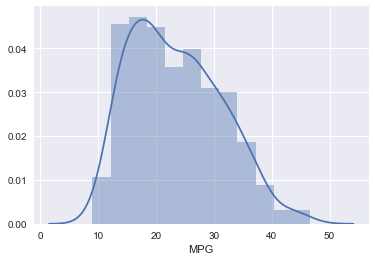

In [74]:
import matplotlib.dates as mdates

sns.distplot(all_clean_cars_df.Miles_per_Gallon, axlabel="MPG")

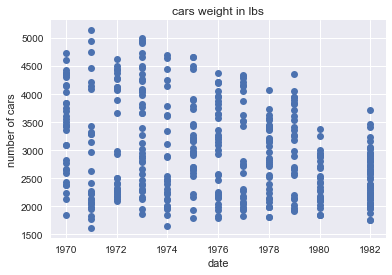

In [162]:
plt.title("cars weight in lbs")
plt.xlabel("date")
plt.ylabel("number of cars")
plt.plot_date(x=cars_df.Year, y= cars_df.Weight_in_lbs)

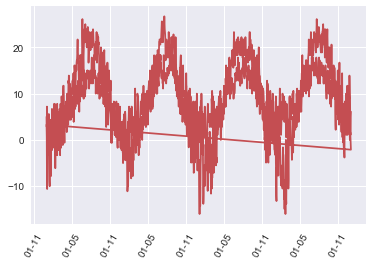

In [103]:
plt.xticks(rotation=60)
myfmt = mdates.DateFormatter("%d")
ax = plt.subplot()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
plt.plot_date(x=weather_df.date, y= weather_df.temp_min, fmt="r-")

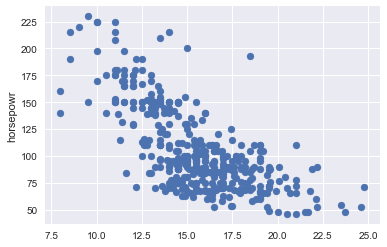

In [298]:
plt.scatter(x=cars_df.Acceleration, y=cars_df.Horsepower)
plt.xlabel=("Acceleration")
plt.ylabel("horsepowr")


In [109]:
 weather_df_2012 = weather_df[weather_df.date < "2013-01-01"]

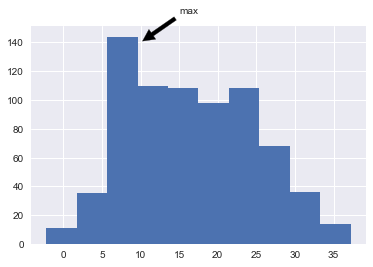

In [91]:
h = plt.hist(weather_df_2012.temp_max)
plt.annotate("max", xy=(10, 140), xytext= (15, 160), arrowprops=dict(facecolor='black', shrink=0.05))

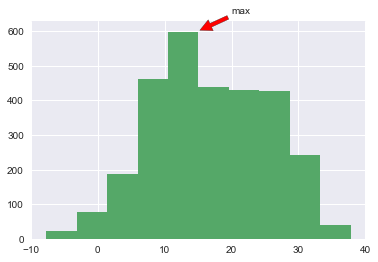

In [122]:
plt.hist(weather_df.temp_max, color="g")
        
plt.annotate("max", xy=(15, 600), xytext=(20, 650), arrowprops=dict(facecolor='red', shrink=0.05))